In [1]:
# !pip3 install squaternion

In [1]:
import os
import gym
import time
from ascento_gym import Ascento
# from balance_pend import InvertedPendulumEnv as Ascento
from stable_baselines3 import PPO, DDPG, SAC
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

In [2]:
# env = Ascento()
# env.reset_model()
# for i_episode in range(150):
#     observation = env.reset()
#     done = None
#     while not done:
#         env.render()
# #         print(env.yaw)
#         action = env.action_space.sample()
# #         action[2] = 1
# #         action[3] = 1

#         observation, reward, done, info = env.step(action)
        
# env.close()

In [3]:
env = Ascento()

/home/bmsit/.local/lib/python3.6/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


In [4]:
env.reset_model()

array([ 0.00630185, -0.00610593,  0.00697123, -0.0171266 , -0.01993565,
       -0.01507844,  0.00116767,  0.00616349, -0.00552244, -0.00734333,
        0.00606152,  0.00253454])

In [5]:
env.action_space

Box([-1. -1. -1. -1.], [1. 1. 1. 1.], (4,), float32)

In [6]:
env.action_space.sample()

array([-0.36021268, -0.8051224 ,  0.49500093,  0.2233509 ], dtype=float32)

In [7]:
env.observation_space

Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf inf], (12,), float64)

In [8]:
# [cart position, cart velocity, pole angle, pole angular velocity]
env.observation_space.sample()

array([ 0.51159374, -0.6171539 ,  0.39161395, -1.05690847,  0.08634642,
        0.07779644, -0.62138438, -1.15849097,  1.17287362,  0.47127434,
       -0.17946263, -0.31566511])

## Training

In [9]:
from stable_baselines3.common.env_util import make_vec_env

In [10]:
vec_env = make_vec_env(Ascento, n_envs=1)

In [11]:
env = Ascento()
env = DummyVecEnv([lambda: env])

In [12]:
save_path = os.path.join('Training', 'models_ascento')

In [13]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold = 20*1e5, verbose = 1)

eval_callback = EvalCallback(env, callback_on_new_best = stop_callback,
                            eval_freq = 5000, best_model_save_path = save_path, verbose = 1)

In [14]:
logs_dir = os.path.join('Training', 'logs_dir_ascento')
model = PPO('MlpPolicy', vec_env, verbose = 1, tensorboard_log = logs_dir, create_eval_env = True)

Using cpu device


In [15]:
# model.load('/home/bmsit/Ascento/jointed_limited/Training/models_ascento/best_model.zip')

In [16]:
model = PPO.load("/home/bmsit/Ascento/jointed_limited/Training/model_for_demo.zip", env = vec_env)

In [17]:
model.learn(total_timesteps = 5_000_000, callback = eval_callback)

Logging to Training/logs_dir_ascento/PPO_65
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.39e+03  |
|    ep_rew_mean     | -1.46e+05 |
| time/              |           |
|    fps             | 1605      |
|    iterations      | 1         |
|    time_elapsed    | 1         |
|    total_timesteps | 2048      |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.36e+03     |
|    ep_rew_mean          | -1.52e+05    |
| time/                   |              |
|    fps                  | 1253         |
|    iterations           | 2            |
|    time_elapsed         | 3            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0014324198 |
|    clip_fraction        | 0.00762      |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.73         |
|   

/home/bmsit/.local/lib/python3.6/site-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


Eval num_timesteps=5000, episode_reward=-185980.05 +/- 9127.81
Episode length: 1418.80 +/- 28.65
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1.42e+03     |
|    mean_reward          | -1.86e+05    |
| time/                   |              |
|    total_timesteps      | 5000         |
| train/                  |              |
|    approx_kl            | 0.0010429877 |
|    clip_fraction        | 0.00464      |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.73         |
|    explained_variance   | 0.351        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.45e+07     |
|    n_updates            | 15930        |
|    policy_gradient_loss | -0.00329     |
|    std                  | 0.257        |
|    value_loss           | 6.66e+07     |
------------------------------------------
New best mean reward!
----------------------------------
| rollout/           |       

/home/bmsit/.local/lib/python3.6/site-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


Eval num_timesteps=10000, episode_reward=-187861.48 +/- 7272.71
Episode length: 1402.20 +/- 20.09
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1.4e+03      |
|    mean_reward          | -1.88e+05    |
| time/                   |              |
|    total_timesteps      | 10000        |
| train/                  |              |
|    approx_kl            | 0.0013259506 |
|    clip_fraction        | 0.00767      |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.73         |
|    explained_variance   | 0.352        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.32e+07     |
|    n_updates            | 15950        |
|    policy_gradient_loss | -0.00333     |
|    std                  | 0.257        |
|    value_loss           | 6.99e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mea

Eval num_timesteps=25000, episode_reward=58434.32 +/- 85503.15
Episode length: 4015.00 +/- 1970.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 4.02e+03    |
|    mean_reward          | 5.84e+04    |
| time/                   |             |
|    total_timesteps      | 25000       |
| train/                  |             |
|    approx_kl            | 0.007530708 |
|    clip_fraction        | 0.0491      |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.73        |
|    explained_variance   | 0.909       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.69e+03    |
|    n_updates            | 16030       |
|    policy_gradient_loss | -0.00392    |
|    std                  | 0.256       |
|    value_loss           | 9.95e+03    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.69e+03  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.77e+03  |
|    ep_rew_mean     | -1.16e+05 |
| time/              |           |
|    fps             | 426       |
|    iterations      | 20        |
|    time_elapsed    | 96        |
|    total_timesteps | 40960     |
----------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1.77e+03  |
|    ep_rew_mean          | -1.16e+05 |
| time/                   |           |
|    fps                  | 439       |
|    iterations           | 21        |
|    time_elapsed         | 97        |
|    total_timesteps      | 43008     |
| train/                  |           |
|    approx_kl            | 0.0023173 |
|    clip_fraction        | 0.00645   |
|    clip_range           | 0.2       |
|    entropy_loss         | 1.73      |
|    explained_variance   | 0.478     |
|    learning_rate        | 0.0003    |
|    loss 

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.95e+03   |
|    ep_rew_mean          | -9.73e+04  |
| time/                   |            |
|    fps                  | 403        |
|    iterations           | 29         |
|    time_elapsed         | 147        |
|    total_timesteps      | 59392      |
| train/                  |            |
|    approx_kl            | 0.00686205 |
|    clip_fraction        | 0.0803     |
|    clip_range           | 0.2        |
|    entropy_loss         | 1.74       |
|    explained_variance   | 0.809      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.42e+03   |
|    n_updates            | 16190      |
|    policy_gradient_loss | -0.00169   |
|    std                  | 0.255      |
|    value_loss           | 6.51e+03   |
----------------------------------------
Eval num_timesteps=60000, episode_reward=-157830.35 +/- 59707.67
Episode length: 566.00 +/- 608.71

Eval num_timesteps=75000, episode_reward=-237186.95 +/- 65623.49
Episode length: 1139.80 +/- 541.37
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.14e+03    |
|    mean_reward          | -2.37e+05   |
| time/                   |             |
|    total_timesteps      | 75000       |
| train/                  |             |
|    approx_kl            | 0.004366169 |
|    clip_fraction        | 0.0236      |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.74        |
|    explained_variance   | 0.368       |
|    learning_rate        | 0.0003      |
|    loss                 | 6.33e+07    |
|    n_updates            | 16270       |
|    policy_gradient_loss | -0.00277    |
|    std                  | 0.255       |
|    value_loss           | 1.07e+08    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.7e+03  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.83e+03  |
|    ep_rew_mean     | -1.25e+05 |
| time/              |           |
|    fps             | 402       |
|    iterations      | 44        |
|    time_elapsed    | 224       |
|    total_timesteps | 90112     |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.83e+03    |
|    ep_rew_mean          | -1.25e+05   |
| time/                   |             |
|    fps                  | 407         |
|    iterations           | 45          |
|    time_elapsed         | 225         |
|    total_timesteps      | 92160       |
| train/                  |             |
|    approx_kl            | 0.014222599 |
|    clip_fraction        | 0.171       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.74        |
|    explained_variance   | 0.965       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.01e+03  |
|    ep_rew_mean     | -1.13e+05 |
| time/              |           |
|    fps             | 388       |
|    iterations      | 52        |
|    time_elapsed    | 274       |
|    total_timesteps | 106496    |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.01e+03    |
|    ep_rew_mean          | -1.13e+05   |
| time/                   |             |
|    fps                  | 392         |
|    iterations           | 53          |
|    time_elapsed         | 276         |
|    total_timesteps      | 108544      |
| train/                  |             |
|    approx_kl            | 0.034161076 |
|    clip_fraction        | 0.26        |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.77        |
|    explained_variance   | 0.77        |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.13e+03    |
|    ep_rew_mean          | -9.73e+04   |
| time/                   |             |
|    fps                  | 392         |
|    iterations           | 61          |
|    time_elapsed         | 318         |
|    total_timesteps      | 124928      |
| train/                  |             |
|    approx_kl            | 0.012034259 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.8         |
|    explained_variance   | 0.636       |
|    learning_rate        | 0.0003      |
|    loss                 | 701         |
|    n_updates            | 16510       |
|    policy_gradient_loss | 0.00271     |
|    std                  | 0.249       |
|    value_loss           | 1.41e+04    |
-----------------------------------------
Eval num_timesteps=125000, episode_reward=-49511.13 +/- 40211.28
Episode len

Eval num_timesteps=140000, episode_reward=18829.49 +/- 2604.77
Episode length: 940.80 +/- 14.40
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 941          |
|    mean_reward          | 1.88e+04     |
| time/                   |              |
|    total_timesteps      | 140000       |
| train/                  |              |
|    approx_kl            | 0.0069120172 |
|    clip_fraction        | 0.0896       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.84         |
|    explained_variance   | 0.947        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.34e+03     |
|    n_updates            | 16590        |
|    policy_gradient_loss | -0.00294     |
|    std                  | 0.247        |
|    value_loss           | 1.79e+04     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean 

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.99e+03  |
|    ep_rew_mean     | -7.67e+04 |
| time/              |           |
|    fps             | 421       |
|    iterations      | 76        |
|    time_elapsed    | 369       |
|    total_timesteps | 155648    |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.99e+03     |
|    ep_rew_mean          | -7.67e+04    |
| time/                   |              |
|    fps                  | 425          |
|    iterations           | 77           |
|    time_elapsed         | 371          |
|    total_timesteps      | 157696       |
| train/                  |              |
|    approx_kl            | 0.0040151794 |
|    clip_fraction        | 0.00894      |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.86         |
|    explained_variance   | 0.721        |
|    

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.06e+03  |
|    ep_rew_mean     | -8.23e+04 |
| time/              |           |
|    fps             | 426       |
|    iterations      | 84        |
|    time_elapsed    | 402       |
|    total_timesteps | 172032    |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.06e+03    |
|    ep_rew_mean          | -8.23e+04   |
| time/                   |             |
|    fps                  | 430         |
|    iterations           | 85          |
|    time_elapsed         | 404         |
|    total_timesteps      | 174080      |
| train/                  |             |
|    approx_kl            | 0.006168478 |
|    clip_fraction        | 0.0316      |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.84        |
|    explained_variance   | 0.944       |
|    learning_rate  

Eval num_timesteps=190000, episode_reward=-117753.23 +/- 16397.84
Episode length: 1141.20 +/- 21.31
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.14e+03    |
|    mean_reward          | -1.18e+05   |
| time/                   |             |
|    total_timesteps      | 190000      |
| train/                  |             |
|    approx_kl            | 0.002903125 |
|    clip_fraction        | 0.0146      |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.86        |
|    explained_variance   | 0.884       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.78e+04    |
|    n_updates            | 16830       |
|    policy_gradient_loss | -0.00304    |
|    std                  | 0.244       |
|    value_loss           | 9.36e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.16e+03 

Eval num_timesteps=205000, episode_reward=77902.78 +/- 43437.41
Episode length: 4267.00 +/- 1466.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 4.27e+03     |
|    mean_reward          | 7.79e+04     |
| time/                   |              |
|    total_timesteps      | 205000       |
| train/                  |              |
|    approx_kl            | 0.0055468166 |
|    clip_fraction        | 0.0895       |
|    clip_range           | 0.2          |
|    entropy_loss         | 1.86         |
|    explained_variance   | 0.817        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.82e+05     |
|    n_updates            | 16910        |
|    policy_gradient_loss | 0.00214      |
|    std                  | 0.242        |
|    value_loss           | 3.32e+04     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_m

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.31e+03  |
|    ep_rew_mean     | -6.69e+04 |
| time/              |           |
|    fps             | 430       |
|    iterations      | 108       |
|    time_elapsed    | 514       |
|    total_timesteps | 221184    |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.32e+03    |
|    ep_rew_mean          | -6.65e+04   |
| time/                   |             |
|    fps                  | 432         |
|    iterations           | 109         |
|    time_elapsed         | 516         |
|    total_timesteps      | 223232      |
| train/                  |             |
|    approx_kl            | 0.006427996 |
|    clip_fraction        | 0.0859      |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.94        |
|    explained_variance   | 0.715       |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.4e+03     |
|    ep_rew_mean          | -6.15e+04   |
| time/                   |             |
|    fps                  | 424         |
|    iterations           | 117         |
|    time_elapsed         | 564         |
|    total_timesteps      | 239616      |
| train/                  |             |
|    approx_kl            | 0.025195297 |
|    clip_fraction        | 0.323       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.99        |
|    explained_variance   | 0.855       |
|    learning_rate        | 0.0003      |
|    loss                 | 23.6        |
|    n_updates            | 17070       |
|    policy_gradient_loss | 0.00875     |
|    std                  | 0.232       |
|    value_loss           | 119         |
-----------------------------------------
Eval num_timesteps=240000, episode_reward=60786.89 +/- 80889.09
Episode leng

Eval num_timesteps=255000, episode_reward=-7782.01 +/- 5941.64
Episode length: 4446.20 +/- 23.61
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 4.45e+03   |
|    mean_reward          | -7.78e+03  |
| time/                   |            |
|    total_timesteps      | 255000     |
| train/                  |            |
|    approx_kl            | 0.12827985 |
|    clip_fraction        | 0.289      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.04       |
|    explained_variance   | 0.364      |
|    learning_rate        | 0.0003     |
|    loss                 | 2.55e+06   |
|    n_updates            | 17150      |
|    policy_gradient_loss | -0.00399   |
|    std                  | 0.228      |
|    value_loss           | 8.92e+06   |
----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.49e+03 |
|    ep_rew_mean     |

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.61e+03  |
|    ep_rew_mean     | -4.83e+04 |
| time/              |           |
|    fps             | 406       |
|    iterations      | 132       |
|    time_elapsed    | 665       |
|    total_timesteps | 270336    |
----------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.62e+03   |
|    ep_rew_mean          | -4.72e+04  |
| time/                   |            |
|    fps                  | 408        |
|    iterations           | 133        |
|    time_elapsed         | 667        |
|    total_timesteps      | 272384     |
| train/                  |            |
|    approx_kl            | 0.04321288 |
|    clip_fraction        | 0.204      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.03       |
|    explained_variance   | 0.801      |
|    learning_rate        | 0.0003 

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.7e+03   |
|    ep_rew_mean     | -4.32e+04 |
| time/              |           |
|    fps             | 407       |
|    iterations      | 140       |
|    time_elapsed    | 703       |
|    total_timesteps | 286720    |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.69e+03    |
|    ep_rew_mean          | -4.37e+04   |
| time/                   |             |
|    fps                  | 409         |
|    iterations           | 141         |
|    time_elapsed         | 705         |
|    total_timesteps      | 288768      |
| train/                  |             |
|    approx_kl            | 0.047650926 |
|    clip_fraction        | 0.332       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.02        |
|    explained_variance   | 0.997       |
|    learning_rate  

Eval num_timesteps=305000, episode_reward=-1776.46 +/- 56008.03
Episode length: 1602.60 +/- 764.42
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.6e+03     |
|    mean_reward          | -1.78e+03   |
| time/                   |             |
|    total_timesteps      | 305000      |
| train/                  |             |
|    approx_kl            | 0.011783734 |
|    clip_fraction        | 0.181       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.01        |
|    explained_variance   | 0.34        |
|    learning_rate        | 0.0003      |
|    loss                 | 1.35e+07    |
|    n_updates            | 17390       |
|    policy_gradient_loss | -0.000988   |
|    std                  | 0.233       |
|    value_loss           | 2.32e+07    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.64e+03  

Eval num_timesteps=320000, episode_reward=4392.53 +/- 54400.69
Episode length: 1813.60 +/- 874.07
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.81e+03    |
|    mean_reward          | 4.39e+03    |
| time/                   |             |
|    total_timesteps      | 320000      |
| train/                  |             |
|    approx_kl            | 0.034197215 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.99        |
|    explained_variance   | 0.945       |
|    learning_rate        | 0.0003      |
|    loss                 | 198         |
|    n_updates            | 17470       |
|    policy_gradient_loss | -0.00246    |
|    std                  | 0.237       |
|    value_loss           | 1.56e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.59e+03  |

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.61e+03  |
|    ep_rew_mean     | -4.52e+03 |
| time/              |           |
|    fps             | 425       |
|    iterations      | 164       |
|    time_elapsed    | 790       |
|    total_timesteps | 335872    |
----------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.62e+03   |
|    ep_rew_mean          | -1.59e+03  |
| time/                   |            |
|    fps                  | 426        |
|    iterations           | 165        |
|    time_elapsed         | 791        |
|    total_timesteps      | 337920     |
| train/                  |            |
|    approx_kl            | 0.01913767 |
|    clip_fraction        | 0.239      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2          |
|    explained_variance   | 0.992      |
|    learning_rate        | 0.0003 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.46e+03     |
|    ep_rew_mean          | -6.36e+03    |
| time/                   |              |
|    fps                  | 430          |
|    iterations           | 173          |
|    time_elapsed         | 822          |
|    total_timesteps      | 354304       |
| train/                  |              |
|    approx_kl            | 0.0023770658 |
|    clip_fraction        | 0.0107       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.02         |
|    explained_variance   | 0.918        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.04e+03     |
|    n_updates            | 17630        |
|    policy_gradient_loss | -0.0022      |
|    std                  | 0.234        |
|    value_loss           | 3.49e+04     |
------------------------------------------
Eval num_timesteps=355000, episode_reward=6314.29 +/- 

Eval num_timesteps=370000, episode_reward=24064.13 +/- 6386.19
Episode length: 2134.00 +/- 21.63
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2.13e+03    |
|    mean_reward          | 2.41e+04    |
| time/                   |             |
|    total_timesteps      | 370000      |
| train/                  |             |
|    approx_kl            | 0.011946393 |
|    clip_fraction        | 0.109       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.01        |
|    explained_variance   | 0.973       |
|    learning_rate        | 0.0003      |
|    loss                 | 190         |
|    n_updates            | 17710       |
|    policy_gradient_loss | 0.00222     |
|    std                  | 0.236       |
|    value_loss           | 1.69e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.4e+03   |


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.41e+03  |
|    ep_rew_mean     | -1.04e+04 |
| time/              |           |
|    fps             | 435       |
|    iterations      | 188       |
|    time_elapsed    | 883       |
|    total_timesteps | 385024    |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.42e+03     |
|    ep_rew_mean          | -1.03e+04    |
| time/                   |              |
|    fps                  | 437          |
|    iterations           | 189          |
|    time_elapsed         | 885          |
|    total_timesteps      | 387072       |
| train/                  |              |
|    approx_kl            | 0.0054269517 |
|    clip_fraction        | 0.0537       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.01         |
|    explained_variance   | 0.912        |
|    

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.27e+03  |
|    ep_rew_mean     | -6.75e+03 |
| time/              |           |
|    fps             | 440       |
|    iterations      | 196       |
|    time_elapsed    | 912       |
|    total_timesteps | 401408    |
----------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.23e+03   |
|    ep_rew_mean          | -8.66e+03  |
| time/                   |            |
|    fps                  | 441        |
|    iterations           | 197        |
|    time_elapsed         | 914        |
|    total_timesteps      | 403456     |
| train/                  |            |
|    approx_kl            | 0.00495119 |
|    clip_fraction        | 0.0217     |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.03       |
|    explained_variance   | 0.386      |
|    learning_rate        | 0.0003 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.99e+03    |
|    ep_rew_mean          | -1.15e+04   |
| time/                   |             |
|    fps                  | 446         |
|    iterations           | 205         |
|    time_elapsed         | 941         |
|    total_timesteps      | 419840      |
| train/                  |             |
|    approx_kl            | 0.022672148 |
|    clip_fraction        | 0.0892      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.04        |
|    explained_variance   | 0.773       |
|    learning_rate        | 0.0003      |
|    loss                 | 586         |
|    n_updates            | 17950       |
|    policy_gradient_loss | 0.0073      |
|    std                  | 0.235       |
|    value_loss           | 2.38e+05    |
-----------------------------------------
Eval num_timesteps=420000, episode_reward=16569.24 +/- 2817.72
Episode lengt

Eval num_timesteps=435000, episode_reward=-11582.85 +/- 70655.02
Episode length: 1332.40 +/- 620.25
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.33e+03    |
|    mean_reward          | -1.16e+04   |
| time/                   |             |
|    total_timesteps      | 435000      |
| train/                  |             |
|    approx_kl            | 0.044911154 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.06        |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.0003      |
|    loss                 | 1.49e+04    |
|    n_updates            | 18030       |
|    policy_gradient_loss | 0.012       |
|    std                  | 0.234       |
|    value_loss           | 3.67e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.69e+03 

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.6e+03   |
|    ep_rew_mean     | -1.82e+04 |
| time/              |           |
|    fps             | 449       |
|    iterations      | 220       |
|    time_elapsed    | 1002      |
|    total_timesteps | 450560    |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.59e+03    |
|    ep_rew_mean          | -1.98e+04   |
| time/                   |             |
|    fps                  | 450         |
|    iterations           | 221         |
|    time_elapsed         | 1004        |
|    total_timesteps      | 452608      |
| train/                  |             |
|    approx_kl            | 0.006117911 |
|    clip_fraction        | 0.0505      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.07        |
|    explained_variance   | 0.795       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.62e+03  |
|    ep_rew_mean     | -2.23e+04 |
| time/              |           |
|    fps             | 453       |
|    iterations      | 228       |
|    time_elapsed    | 1029      |
|    total_timesteps | 466944    |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.61e+03     |
|    ep_rew_mean          | -2.39e+04    |
| time/                   |              |
|    fps                  | 454          |
|    iterations           | 229          |
|    time_elapsed         | 1031         |
|    total_timesteps      | 468992       |
| train/                  |              |
|    approx_kl            | 0.0038104034 |
|    clip_fraction        | 0.047        |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.07         |
|    explained_variance   | 0.329        |
|    

Eval num_timesteps=485000, episode_reward=29773.40 +/- 4387.68
Episode length: 2207.00 +/- 21.84
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2.21e+03    |
|    mean_reward          | 2.98e+04    |
| time/                   |             |
|    total_timesteps      | 485000      |
| train/                  |             |
|    approx_kl            | 0.015628293 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.07        |
|    explained_variance   | 0.977       |
|    learning_rate        | 0.0003      |
|    loss                 | 891         |
|    n_updates            | 18270       |
|    policy_gradient_loss | 0.0014      |
|    std                  | 0.234       |
|    value_loss           | 1.93e+03    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.62e+03  |


Eval num_timesteps=500000, episode_reward=23075.93 +/- 3172.56
Episode length: 1621.80 +/- 11.55
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.62e+03    |
|    mean_reward          | 2.31e+04    |
| time/                   |             |
|    total_timesteps      | 500000      |
| train/                  |             |
|    approx_kl            | 0.037086252 |
|    clip_fraction        | 0.241       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.11        |
|    explained_variance   | 0.707       |
|    learning_rate        | 0.0003      |
|    loss                 | 335         |
|    n_updates            | 18350       |
|    policy_gradient_loss | 0.0118      |
|    std                  | 0.233       |
|    value_loss           | 1.73e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.68e+03  |


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.54e+03  |
|    ep_rew_mean     | -2.31e+04 |
| time/              |           |
|    fps             | 462       |
|    iterations      | 252       |
|    time_elapsed    | 1115      |
|    total_timesteps | 516096    |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.54e+03    |
|    ep_rew_mean          | -2.31e+04   |
| time/                   |             |
|    fps                  | 463         |
|    iterations           | 253         |
|    time_elapsed         | 1116        |
|    total_timesteps      | 518144      |
| train/                  |             |
|    approx_kl            | 0.011092761 |
|    clip_fraction        | 0.0939      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.13        |
|    explained_variance   | 0.97        |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.57e+03    |
|    ep_rew_mean          | -1.66e+04   |
| time/                   |             |
|    fps                  | 467         |
|    iterations           | 261         |
|    time_elapsed         | 1142        |
|    total_timesteps      | 534528      |
| train/                  |             |
|    approx_kl            | 0.037416637 |
|    clip_fraction        | 0.213       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.16        |
|    explained_variance   | 0.972       |
|    learning_rate        | 0.0003      |
|    loss                 | 31.6        |
|    n_updates            | 18510       |
|    policy_gradient_loss | 0.00319     |
|    std                  | 0.228       |
|    value_loss           | 2.15e+04    |
-----------------------------------------
Eval num_timesteps=535000, episode_reward=16077.58 +/- 2998.77
Episode lengt

Eval num_timesteps=550000, episode_reward=-15386.11 +/- 56783.81
Episode length: 1374.20 +/- 648.17
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.37e+03    |
|    mean_reward          | -1.54e+04   |
| time/                   |             |
|    total_timesteps      | 550000      |
| train/                  |             |
|    approx_kl            | 0.009923674 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.17        |
|    explained_variance   | 0.763       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.19e+05    |
|    n_updates            | 18590       |
|    policy_gradient_loss | 0.001       |
|    std                  | 0.229       |
|    value_loss           | 2.15e+05    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.51e+03 

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.54e+03  |
|    ep_rew_mean     | -1.76e+04 |
| time/              |           |
|    fps             | 472       |
|    iterations      | 276       |
|    time_elapsed    | 1195      |
|    total_timesteps | 565248    |
----------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.54e+03   |
|    ep_rew_mean          | -1.77e+04  |
| time/                   |            |
|    fps                  | 473        |
|    iterations           | 277        |
|    time_elapsed         | 1197       |
|    total_timesteps      | 567296     |
| train/                  |            |
|    approx_kl            | 0.01423918 |
|    clip_fraction        | 0.15       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.18       |
|    explained_variance   | 0.997      |
|    learning_rate        | 0.0003 

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.54e+03  |
|    ep_rew_mean     | -1.67e+04 |
| time/              |           |
|    fps             | 476       |
|    iterations      | 284       |
|    time_elapsed    | 1221      |
|    total_timesteps | 581632    |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.54e+03    |
|    ep_rew_mean          | -1.55e+04   |
| time/                   |             |
|    fps                  | 477         |
|    iterations           | 285         |
|    time_elapsed         | 1223        |
|    total_timesteps      | 583680      |
| train/                  |             |
|    approx_kl            | 0.012373797 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.19        |
|    explained_variance   | 0.979       |
|    learning_rate  

Eval num_timesteps=600000, episode_reward=-150804.06 +/- 5616.23
Episode length: 2642.40 +/- 36.72
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 2.64e+03     |
|    mean_reward          | -1.51e+05    |
| time/                   |              |
|    total_timesteps      | 600000       |
| train/                  |              |
|    approx_kl            | 0.0054010097 |
|    clip_fraction        | 0.0923       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.17         |
|    explained_variance   | 0.335        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.81e+04     |
|    n_updates            | 18830        |
|    policy_gradient_loss | -0.0024      |
|    std                  | 0.23         |
|    value_loss           | 1.51e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_me

Eval num_timesteps=615000, episode_reward=12534.69 +/- 4974.86
Episode length: 1733.40 +/- 6.62
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1.73e+03     |
|    mean_reward          | 1.25e+04     |
| time/                   |              |
|    total_timesteps      | 615000       |
| train/                  |              |
|    approx_kl            | 0.0064387973 |
|    clip_fraction        | 0.0324       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.17         |
|    explained_variance   | 0.346        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.1e+07      |
|    n_updates            | 18910        |
|    policy_gradient_loss | -0.0016      |
|    std                  | 0.229        |
|    value_loss           | 1.83e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean 

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.48e+03  |
|    ep_rew_mean     | -1.45e+04 |
| time/              |           |
|    fps             | 480       |
|    iterations      | 308       |
|    time_elapsed    | 1313      |
|    total_timesteps | 630784    |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.46e+03    |
|    ep_rew_mean          | -1.47e+04   |
| time/                   |             |
|    fps                  | 481         |
|    iterations           | 309         |
|    time_elapsed         | 1315        |
|    total_timesteps      | 632832      |
| train/                  |             |
|    approx_kl            | 0.017739113 |
|    clip_fraction        | 0.22        |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.19        |
|    explained_variance   | 0.955       |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.43e+03    |
|    ep_rew_mean          | -1.1e+04    |
| time/                   |             |
|    fps                  | 484         |
|    iterations           | 317         |
|    time_elapsed         | 1340        |
|    total_timesteps      | 649216      |
| train/                  |             |
|    approx_kl            | 0.015326584 |
|    clip_fraction        | 0.148       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.22        |
|    explained_variance   | 0.999       |
|    learning_rate        | 0.0003      |
|    loss                 | 20          |
|    n_updates            | 19070       |
|    policy_gradient_loss | 0.00227     |
|    std                  | 0.227       |
|    value_loss           | 90.5        |
-----------------------------------------
Eval num_timesteps=650000, episode_reward=15462.27 +/- 5655.17
Episode lengt

Eval num_timesteps=665000, episode_reward=17048.24 +/- 4482.14
Episode length: 1698.80 +/- 12.37
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.7e+03     |
|    mean_reward          | 1.7e+04     |
| time/                   |             |
|    total_timesteps      | 665000      |
| train/                  |             |
|    approx_kl            | 0.015172346 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.24        |
|    explained_variance   | 0.999       |
|    learning_rate        | 0.0003      |
|    loss                 | 50          |
|    n_updates            | 19150       |
|    policy_gradient_loss | -0.00595    |
|    std                  | 0.226       |
|    value_loss           | 151         |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.48e+03  |


Eval num_timesteps=680000, episode_reward=15783.65 +/- 8807.65
Episode length: 1912.40 +/- 31.38
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1.91e+03   |
|    mean_reward          | 1.58e+04   |
| time/                   |            |
|    total_timesteps      | 680000     |
| train/                  |            |
|    approx_kl            | 0.01506455 |
|    clip_fraction        | 0.105      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.29       |
|    explained_variance   | 0.931      |
|    learning_rate        | 0.0003     |
|    loss                 | 264        |
|    n_updates            | 19230      |
|    policy_gradient_loss | 0.000984   |
|    std                  | 0.221      |
|    value_loss           | 4.87e+04   |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.47e+03  |
|    ep_rew_mean   

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.51e+03 |
|    ep_rew_mean     | 424      |
| time/              |          |
|    fps             | 489      |
|    iterations      | 340      |
|    time_elapsed    | 1423     |
|    total_timesteps | 696320   |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.51e+03    |
|    ep_rew_mean          | 496         |
| time/                   |             |
|    fps                  | 489         |
|    iterations           | 341         |
|    time_elapsed         | 1425        |
|    total_timesteps      | 698368      |
| train/                  |             |
|    approx_kl            | 0.016376495 |
|    clip_fraction        | 0.172       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.32        |
|    explained_variance   | 0.976       |
|    learning_rate        | 0.

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.53e+03     |
|    ep_rew_mean          | 2.07e+03     |
| time/                   |              |
|    fps                  | 491          |
|    iterations           | 349          |
|    time_elapsed         | 1452         |
|    total_timesteps      | 714752       |
| train/                  |              |
|    approx_kl            | 0.0105545875 |
|    clip_fraction        | 0.0686       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.32         |
|    explained_variance   | 0.927        |
|    learning_rate        | 0.0003       |
|    loss                 | 429          |
|    n_updates            | 19390        |
|    policy_gradient_loss | -0.00559     |
|    std                  | 0.22         |
|    value_loss           | 2.53e+04     |
------------------------------------------
Eval num_timesteps=715000, episode_reward=-28146.66 +/

Eval num_timesteps=730000, episode_reward=21872.96 +/- 394.82
Episode length: 1793.20 +/- 14.77
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1.79e+03   |
|    mean_reward          | 2.19e+04   |
| time/                   |            |
|    total_timesteps      | 730000     |
| train/                  |            |
|    approx_kl            | 0.00823475 |
|    clip_fraction        | 0.106      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.33       |
|    explained_variance   | 0.993      |
|    learning_rate        | 0.0003     |
|    loss                 | 126        |
|    n_updates            | 19470      |
|    policy_gradient_loss | 0.00272    |
|    std                  | 0.219      |
|    value_loss           | 627        |
----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.53e+03 |
|    ep_rew_mean     | 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.54e+03 |
|    ep_rew_mean     | 4.17e+03 |
| time/              |          |
|    fps             | 494      |
|    iterations      | 364      |
|    time_elapsed    | 1508     |
|    total_timesteps | 745472   |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.52e+03    |
|    ep_rew_mean          | 6.06e+03    |
| time/                   |             |
|    fps                  | 494         |
|    iterations           | 365         |
|    time_elapsed         | 1510        |
|    total_timesteps      | 747520      |
| train/                  |             |
|    approx_kl            | 0.012098325 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.3         |
|    explained_variance   | 0.997       |
|    learning_rate        | 0.

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.5e+03  |
|    ep_rew_mean     | 7.71e+03 |
| time/              |          |
|    fps             | 496      |
|    iterations      | 372      |
|    time_elapsed    | 1535     |
|    total_timesteps | 761856   |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.5e+03    |
|    ep_rew_mean          | 7.73e+03   |
| time/                   |            |
|    fps                  | 496        |
|    iterations           | 373        |
|    time_elapsed         | 1537       |
|    total_timesteps      | 763904     |
| train/                  |            |
|    approx_kl            | 0.12371926 |
|    clip_fraction        | 0.24       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.3        |
|    explained_variance   | 0.37       |
|    learning_rate        | 0.0003     |
|   

Eval num_timesteps=780000, episode_reward=-10138.96 +/- 41805.51
Episode length: 1326.60 +/- 630.81
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.33e+03    |
|    mean_reward          | -1.01e+04   |
| time/                   |             |
|    total_timesteps      | 780000      |
| train/                  |             |
|    approx_kl            | 0.010788134 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.26        |
|    explained_variance   | 0.999       |
|    learning_rate        | 0.0003      |
|    loss                 | 15.1        |
|    n_updates            | 19710       |
|    policy_gradient_loss | -0.00297    |
|    std                  | 0.222       |
|    value_loss           | 99          |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.53e+03 |


Eval num_timesteps=795000, episode_reward=12617.00 +/- 5553.37
Episode length: 1863.60 +/- 26.97
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.86e+03    |
|    mean_reward          | 1.26e+04    |
| time/                   |             |
|    total_timesteps      | 795000      |
| train/                  |             |
|    approx_kl            | 0.008731142 |
|    clip_fraction        | 0.274       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.27        |
|    explained_variance   | 0.368       |
|    learning_rate        | 0.0003      |
|    loss                 | 3.96e+05    |
|    n_updates            | 19790       |
|    policy_gradient_loss | 0.00797     |
|    std                  | 0.222       |
|    value_loss           | 1.76e+06    |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.56e+03 |
|  

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.59e+03 |
|    ep_rew_mean     | 8.65e+03 |
| time/              |          |
|    fps             | 499      |
|    iterations      | 396      |
|    time_elapsed    | 1622     |
|    total_timesteps | 811008   |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.59e+03    |
|    ep_rew_mean          | 8.58e+03    |
| time/                   |             |
|    fps                  | 500         |
|    iterations           | 397         |
|    time_elapsed         | 1623        |
|    total_timesteps      | 813056      |
| train/                  |             |
|    approx_kl            | 0.023407353 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.28        |
|    explained_variance   | 0.972       |
|    learning_rate        | 0.

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.62e+03   |
|    ep_rew_mean          | 8.74e+03   |
| time/                   |            |
|    fps                  | 501        |
|    iterations           | 405        |
|    time_elapsed         | 1652       |
|    total_timesteps      | 829440     |
| train/                  |            |
|    approx_kl            | 0.02634482 |
|    clip_fraction        | 0.233      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.31       |
|    explained_variance   | 0.965      |
|    learning_rate        | 0.0003     |
|    loss                 | 29.3       |
|    n_updates            | 19950      |
|    policy_gradient_loss | 0.00732    |
|    std                  | 0.219      |
|    value_loss           | 1.71e+04   |
----------------------------------------
Eval num_timesteps=830000, episode_reward=13541.78 +/- 3038.37
Episode length: 2025.80 +/- 13.70
-

Eval num_timesteps=845000, episode_reward=14465.87 +/- 6487.88
Episode length: 2121.80 +/- 18.79
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 2.12e+03     |
|    mean_reward          | 1.45e+04     |
| time/                   |              |
|    total_timesteps      | 845000       |
| train/                  |              |
|    approx_kl            | 0.0091972165 |
|    clip_fraction        | 0.175        |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.3          |
|    explained_variance   | 0.313        |
|    learning_rate        | 0.0003       |
|    loss                 | 6.49e+06     |
|    n_updates            | 20030        |
|    policy_gradient_loss | 0.00105      |
|    std                  | 0.221        |
|    value_loss           | 2.08e+07     |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean  

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.58e+03 |
|    ep_rew_mean     | 6.72e+03 |
| time/              |          |
|    fps             | 501      |
|    iterations      | 420      |
|    time_elapsed    | 1713     |
|    total_timesteps | 860160   |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.58e+03    |
|    ep_rew_mean          | 6.72e+03    |
| time/                   |             |
|    fps                  | 502         |
|    iterations           | 421         |
|    time_elapsed         | 1715        |
|    total_timesteps      | 862208      |
| train/                  |             |
|    approx_kl            | 0.018510483 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.32        |
|    explained_variance   | 0.944       |
|    learning_rate        | 0.

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.6e+03  |
|    ep_rew_mean     | 9.09e+03 |
| time/              |          |
|    fps             | 502      |
|    iterations      | 428      |
|    time_elapsed    | 1744     |
|    total_timesteps | 876544   |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.6e+03     |
|    ep_rew_mean          | 9.09e+03    |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 429         |
|    time_elapsed         | 1746        |
|    total_timesteps      | 878592      |
| train/                  |             |
|    approx_kl            | 0.013748437 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.41        |
|    explained_variance   | 1           |
|    learning_rate        | 0.

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.65e+03    |
|    ep_rew_mean          | 9.51e+03    |
| time/                   |             |
|    fps                  | 502         |
|    iterations           | 437         |
|    time_elapsed         | 1780        |
|    total_timesteps      | 894976      |
| train/                  |             |
|    approx_kl            | 0.015782457 |
|    clip_fraction        | 0.146       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.47        |
|    explained_variance   | 0.924       |
|    learning_rate        | 0.0003      |
|    loss                 | 39          |
|    n_updates            | 20270       |
|    policy_gradient_loss | -0.0024     |
|    std                  | 0.211       |
|    value_loss           | 8.32e+04    |
-----------------------------------------
Eval num_timesteps=895000, episode_reward=34207.52 +/- 1373.66
Episode lengt

Eval num_timesteps=910000, episode_reward=42156.14 +/- 1167.97
Episode length: 2891.80 +/- 20.65
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2.89e+03    |
|    mean_reward          | 4.22e+04    |
| time/                   |             |
|    total_timesteps      | 910000      |
| train/                  |             |
|    approx_kl            | 0.026586939 |
|    clip_fraction        | 0.267       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.51        |
|    explained_variance   | 0.999       |
|    learning_rate        | 0.0003      |
|    loss                 | 18.2        |
|    n_updates            | 20350       |
|    policy_gradient_loss | 0.00123     |
|    std                  | 0.21        |
|    value_loss           | 79.5        |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.69e+03 |
|  

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.77e+03 |
|    ep_rew_mean     | 1.44e+04 |
| time/              |          |
|    fps             | 499      |
|    iterations      | 452      |
|    time_elapsed    | 1854     |
|    total_timesteps | 925696   |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.77e+03   |
|    ep_rew_mean          | 1.44e+04   |
| time/                   |            |
|    fps                  | 499        |
|    iterations           | 453        |
|    time_elapsed         | 1856       |
|    total_timesteps      | 927744     |
| train/                  |            |
|    approx_kl            | 0.07204473 |
|    clip_fraction        | 0.254      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.55       |
|    explained_variance   | 0.965      |
|    learning_rate        | 0.0003     |
|   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.87e+03    |
|    ep_rew_mean          | 1.34e+04    |
| time/                   |             |
|    fps                  | 495         |
|    iterations           | 461         |
|    time_elapsed         | 1906        |
|    total_timesteps      | 944128      |
| train/                  |             |
|    approx_kl            | 0.007496876 |
|    clip_fraction        | 0.144       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.51        |
|    explained_variance   | 0.968       |
|    learning_rate        | 0.0003      |
|    loss                 | 342         |
|    n_updates            | 20510       |
|    policy_gradient_loss | 0.00316     |
|    std                  | 0.209       |
|    value_loss           | 1.81e+04    |
-----------------------------------------
Eval num_timesteps=945000, episode_reward=26333.18 +/- 2734.47
Episode lengt

Eval num_timesteps=960000, episode_reward=37217.87 +/- 4508.35
Episode length: 4479.20 +/- 26.21
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 4.48e+03     |
|    mean_reward          | 3.72e+04     |
| time/                   |              |
|    total_timesteps      | 960000       |
| train/                  |              |
|    approx_kl            | 0.0062963087 |
|    clip_fraction        | 0.0379       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.53         |
|    explained_variance   | 0.975        |
|    learning_rate        | 0.0003       |
|    loss                 | 957          |
|    n_updates            | 20590        |
|    policy_gradient_loss | -0.00643     |
|    std                  | 0.208        |
|    value_loss           | 5.16e+03     |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean  

Eval num_timesteps=975000, episode_reward=42979.12 +/- 4810.29
Episode length: 3084.00 +/- 7.80
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 3.08e+03    |
|    mean_reward          | 4.3e+04     |
| time/                   |             |
|    total_timesteps      | 975000      |
| train/                  |             |
|    approx_kl            | 0.023679443 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.56        |
|    explained_variance   | 0.914       |
|    learning_rate        | 0.0003      |
|    loss                 | 16.3        |
|    n_updates            | 20670       |
|    policy_gradient_loss | 0.00365     |
|    std                  | 0.206       |
|    value_loss           | 8.21e+04    |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2e+03    |
|   

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.06e+03 |
|    ep_rew_mean     | 1.42e+04 |
| time/              |          |
|    fps             | 487      |
|    iterations      | 484      |
|    time_elapsed    | 2031     |
|    total_timesteps | 991232   |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.08e+03    |
|    ep_rew_mean          | 1.44e+04    |
| time/                   |             |
|    fps                  | 488         |
|    iterations           | 485         |
|    time_elapsed         | 2033        |
|    total_timesteps      | 993280      |
| train/                  |             |
|    approx_kl            | 0.014656123 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.54        |
|    explained_variance   | 0.998       |
|    learning_rate        | 0.

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.18e+03     |
|    ep_rew_mean          | 1.5e+04      |
| time/                   |              |
|    fps                  | 486          |
|    iterations           | 493          |
|    time_elapsed         | 2075         |
|    total_timesteps      | 1009664      |
| train/                  |              |
|    approx_kl            | 0.0015398429 |
|    clip_fraction        | 0.0928       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.49         |
|    explained_variance   | 0.693        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.41e+05     |
|    n_updates            | 20830        |
|    policy_gradient_loss | 0.00439      |
|    std                  | 0.209        |
|    value_loss           | 5.83e+05     |
------------------------------------------
Eval num_timesteps=1010000, episode_reward=-97050.93 +

Eval num_timesteps=1025000, episode_reward=14878.62 +/- 4212.35
Episode length: 5000.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5e+03      |
|    mean_reward          | 1.49e+04   |
| time/                   |            |
|    total_timesteps      | 1025000    |
| train/                  |            |
|    approx_kl            | 0.03178583 |
|    clip_fraction        | 0.223      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.51       |
|    explained_variance   | 0.997      |
|    learning_rate        | 0.0003     |
|    loss                 | 11.8       |
|    n_updates            | 20910      |
|    policy_gradient_loss | 0.00884    |
|    std                  | 0.207      |
|    value_loss           | 61.3       |
----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.27e+03 |
|    ep_rew_mean     |

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.36e+03 |
|    ep_rew_mean     | 1.24e+04 |
| time/              |          |
|    fps             | 475      |
|    iterations      | 508      |
|    time_elapsed    | 2186     |
|    total_timesteps | 1040384  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.39e+03    |
|    ep_rew_mean          | 1.29e+04    |
| time/                   |             |
|    fps                  | 476         |
|    iterations           | 509         |
|    time_elapsed         | 2188        |
|    total_timesteps      | 1042432     |
| train/                  |             |
|    approx_kl            | 0.022642609 |
|    clip_fraction        | 0.291       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.56        |
|    explained_variance   | 0.992       |
|    learning_rate        | 0.

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.48e+03   |
|    ep_rew_mean          | 1.46e+04   |
| time/                   |            |
|    fps                  | 473        |
|    iterations           | 517        |
|    time_elapsed         | 2234       |
|    total_timesteps      | 1058816    |
| train/                  |            |
|    approx_kl            | 0.00952596 |
|    clip_fraction        | 0.14       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.57       |
|    explained_variance   | 0.935      |
|    learning_rate        | 0.0003     |
|    loss                 | 74.9       |
|    n_updates            | 21070      |
|    policy_gradient_loss | 0.00243    |
|    std                  | 0.206      |
|    value_loss           | 1.78e+04   |
----------------------------------------
Eval num_timesteps=1060000, episode_reward=21649.08 +/- 68223.56
Episode length: 3169.00 +/- 1545.

Eval num_timesteps=1075000, episode_reward=26050.99 +/- 68408.44
Episode length: 3404.00 +/- 1665.20
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 3.4e+03      |
|    mean_reward          | 2.61e+04     |
| time/                   |              |
|    total_timesteps      | 1075000      |
| train/                  |              |
|    approx_kl            | 0.0030658287 |
|    clip_fraction        | 0.0104       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.58         |
|    explained_variance   | 0.927        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.15e+03     |
|    n_updates            | 21150        |
|    policy_gradient_loss | -0.00348     |
|    std                  | 0.205        |
|    value_loss           | 1.01e+05     |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_me

Eval num_timesteps=1090000, episode_reward=57333.61 +/- 3526.29
Episode length: 5000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5e+03       |
|    mean_reward          | 5.73e+04    |
| time/                   |             |
|    total_timesteps      | 1090000     |
| train/                  |             |
|    approx_kl            | 0.009913022 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.57        |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.01e+03    |
|    n_updates            | 21230       |
|    policy_gradient_loss | 0.00153     |
|    std                  | 0.205       |
|    value_loss           | 2.79e+04    |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.6e+03  |
|  

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.68e+03 |
|    ep_rew_mean     | 1.3e+04  |
| time/              |          |
|    fps             | 466      |
|    iterations      | 540      |
|    time_elapsed    | 2372     |
|    total_timesteps | 1105920  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.68e+03    |
|    ep_rew_mean          | 1.3e+04     |
| time/                   |             |
|    fps                  | 466         |
|    iterations           | 541         |
|    time_elapsed         | 2374        |
|    total_timesteps      | 1107968     |
| train/                  |             |
|    approx_kl            | 0.027105201 |
|    clip_fraction        | 0.0765      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.57        |
|    explained_variance   | 0.38        |
|    learning_rate        | 0.

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.73e+03    |
|    ep_rew_mean          | 1.15e+04    |
| time/                   |             |
|    fps                  | 467         |
|    iterations           | 549         |
|    time_elapsed         | 2407        |
|    total_timesteps      | 1124352     |
| train/                  |             |
|    approx_kl            | 0.006974886 |
|    clip_fraction        | 0.0658      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.59        |
|    explained_variance   | 0.973       |
|    learning_rate        | 0.0003      |
|    loss                 | 212         |
|    n_updates            | 21390       |
|    policy_gradient_loss | -0.00078    |
|    std                  | 0.205       |
|    value_loss           | 5.76e+03    |
-----------------------------------------
Eval num_timesteps=1125000, episode_reward=-55546.56 +/- 76326.83
Episode le

Eval num_timesteps=1140000, episode_reward=-30434.93 +/- 66160.52
Episode length: 1517.40 +/- 1179.95
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.52e+03    |
|    mean_reward          | -3.04e+04   |
| time/                   |             |
|    total_timesteps      | 1140000     |
| train/                  |             |
|    approx_kl            | 0.010852045 |
|    clip_fraction        | 0.14        |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.64        |
|    explained_variance   | 0.993       |
|    learning_rate        | 0.0003      |
|    loss                 | 95.8        |
|    n_updates            | 21470       |
|    policy_gradient_loss | 8.27e-05    |
|    std                  | 0.202       |
|    value_loss           | 532         |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.76e+03 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.78e+03 |
|    ep_rew_mean     | 1.33e+04 |
| time/              |          |
|    fps             | 467      |
|    iterations      | 564      |
|    time_elapsed    | 2471     |
|    total_timesteps | 1155072  |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.76e+03   |
|    ep_rew_mean          | 1.21e+04   |
| time/                   |            |
|    fps                  | 467        |
|    iterations           | 565        |
|    time_elapsed         | 2473       |
|    total_timesteps      | 1157120    |
| train/                  |            |
|    approx_kl            | 0.02691796 |
|    clip_fraction        | 0.15       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.69       |
|    explained_variance   | 0.998      |
|    learning_rate        | 0.0003     |
|   

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.76e+03 |
|    ep_rew_mean     | 1.13e+04 |
| time/              |          |
|    fps             | 467      |
|    iterations      | 572      |
|    time_elapsed    | 2504     |
|    total_timesteps | 1171456  |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.76e+03     |
|    ep_rew_mean          | 1.12e+04     |
| time/                   |              |
|    fps                  | 468          |
|    iterations           | 573          |
|    time_elapsed         | 2506         |
|    total_timesteps      | 1173504      |
| train/                  |              |
|    approx_kl            | 0.0060027586 |
|    clip_fraction        | 0.0201       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.69         |
|    explained_variance   | 0.391        |
|    learning_r

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.55e+03   |
|    ep_rew_mean          | 1.86e+03   |
| time/                   |            |
|    fps                  | 468        |
|    iterations           | 581        |
|    time_elapsed         | 2538       |
|    total_timesteps      | 1189888    |
| train/                  |            |
|    approx_kl            | 0.02505401 |
|    clip_fraction        | 0.105      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.7        |
|    explained_variance   | 0.373      |
|    learning_rate        | 0.0003     |
|    loss                 | 2.87e+06   |
|    n_updates            | 21710      |
|    policy_gradient_loss | -8.97e-05  |
|    std                  | 0.197      |
|    value_loss           | 1.57e+07   |
----------------------------------------
Eval num_timesteps=1190000, episode_reward=9681.20 +/- 57838.35
Episode length: 2610.40 +/- 1271.3

Eval num_timesteps=1205000, episode_reward=-1658.16 +/- 58098.09
Episode length: 2000.00 +/- 961.62
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2e+03       |
|    mean_reward          | -1.66e+03   |
| time/                   |             |
|    total_timesteps      | 1205000     |
| train/                  |             |
|    approx_kl            | 0.011954124 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.7         |
|    explained_variance   | 0.776       |
|    learning_rate        | 0.0003      |
|    loss                 | 112         |
|    n_updates            | 21790       |
|    policy_gradient_loss | -0.00282    |
|    std                  | 0.197       |
|    value_loss           | 1.25e+05    |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.44e+03 |


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.21e+03  |
|    ep_rew_mean     | -9.18e+03 |
| time/              |           |
|    fps             | 470       |
|    iterations      | 596       |
|    time_elapsed    | 2596      |
|    total_timesteps | 1220608   |
----------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 2.15e+03  |
|    ep_rew_mean          | -9.23e+03 |
| time/                   |           |
|    fps                  | 470       |
|    iterations           | 597       |
|    time_elapsed         | 2598      |
|    total_timesteps      | 1222656   |
| train/                  |           |
|    approx_kl            | 0.0661422 |
|    clip_fraction        | 0.0927    |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.71      |
|    explained_variance   | 0.39      |
|    learning_rate        | 0.0003    |
|    loss 

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.91e+03  |
|    ep_rew_mean     | -7.61e+03 |
| time/              |           |
|    fps             | 471       |
|    iterations      | 604       |
|    time_elapsed    | 2625      |
|    total_timesteps | 1236992   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.9e+03     |
|    ep_rew_mean          | -8.19e+03   |
| time/                   |             |
|    fps                  | 471         |
|    iterations           | 605         |
|    time_elapsed         | 2627        |
|    total_timesteps      | 1239040     |
| train/                  |             |
|    approx_kl            | 0.008263123 |
|    clip_fraction        | 0.46        |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.75        |
|    explained_variance   | 0.408       |
|    learning_rate  

Eval num_timesteps=1255000, episode_reward=12872.28 +/- 5530.06
Episode length: 2046.00 +/- 22.77
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2.05e+03    |
|    mean_reward          | 1.29e+04    |
| time/                   |             |
|    total_timesteps      | 1255000     |
| train/                  |             |
|    approx_kl            | 0.005646145 |
|    clip_fraction        | 0.0385      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.75        |
|    explained_variance   | 0.974       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.35e+03    |
|    n_updates            | 22030       |
|    policy_gradient_loss | -0.00466    |
|    std                  | 0.194       |
|    value_loss           | 6.71e+03    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.71e+03  |

Eval num_timesteps=1270000, episode_reward=21478.30 +/- 4228.20
Episode length: 2066.20 +/- 17.20
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2.07e+03    |
|    mean_reward          | 2.15e+04    |
| time/                   |             |
|    total_timesteps      | 1270000     |
| train/                  |             |
|    approx_kl            | 0.007135237 |
|    clip_fraction        | 0.0782      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.75        |
|    explained_variance   | 0.949       |
|    learning_rate        | 0.0003      |
|    loss                 | 587         |
|    n_updates            | 22110       |
|    policy_gradient_loss | -0.00145    |
|    std                  | 0.194       |
|    value_loss           | 2.09e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.63e+03  |

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.67e+03  |
|    ep_rew_mean     | -1.13e+04 |
| time/              |           |
|    fps             | 473       |
|    iterations      | 628       |
|    time_elapsed    | 2716      |
|    total_timesteps | 1286144   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.66e+03    |
|    ep_rew_mean          | -1.18e+04   |
| time/                   |             |
|    fps                  | 473         |
|    iterations           | 629         |
|    time_elapsed         | 2717        |
|    total_timesteps      | 1288192     |
| train/                  |             |
|    approx_kl            | 0.023648739 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.76        |
|    explained_variance   | 0.974       |
|    learning_rate  

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.66e+03   |
|    ep_rew_mean          | -1.31e+04  |
| time/                   |            |
|    fps                  | 473        |
|    iterations           | 637        |
|    time_elapsed         | 2754       |
|    total_timesteps      | 1304576    |
| train/                  |            |
|    approx_kl            | 0.02839771 |
|    clip_fraction        | 0.251      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.77       |
|    explained_variance   | 0.977      |
|    learning_rate        | 0.0003     |
|    loss                 | 55.1       |
|    n_updates            | 22270      |
|    policy_gradient_loss | 0.0116     |
|    std                  | 0.194      |
|    value_loss           | 1.86e+04   |
----------------------------------------
Eval num_timesteps=1305000, episode_reward=12180.70 +/- 3470.85
Episode length: 2334.60 +/- 18.97


Eval num_timesteps=1320000, episode_reward=-21382.61 +/- 50540.45
Episode length: 1889.20 +/- 903.86
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.89e+03    |
|    mean_reward          | -2.14e+04   |
| time/                   |             |
|    total_timesteps      | 1320000     |
| train/                  |             |
|    approx_kl            | 0.017754719 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.76        |
|    explained_variance   | 0.97        |
|    learning_rate        | 0.0003      |
|    loss                 | 2.07e+05    |
|    n_updates            | 22350       |
|    policy_gradient_loss | -0.00445    |
|    std                  | 0.194       |
|    value_loss           | 3.33e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.63e+03

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.62e+03  |
|    ep_rew_mean     | -1.42e+04 |
| time/              |           |
|    fps             | 474       |
|    iterations      | 652       |
|    time_elapsed    | 2815      |
|    total_timesteps | 1335296   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.61e+03    |
|    ep_rew_mean          | -1.44e+04   |
| time/                   |             |
|    fps                  | 474         |
|    iterations           | 653         |
|    time_elapsed         | 2816        |
|    total_timesteps      | 1337344     |
| train/                  |             |
|    approx_kl            | 0.013907659 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.76        |
|    explained_variance   | 0.974       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.64e+03  |
|    ep_rew_mean     | -9.36e+03 |
| time/              |           |
|    fps             | 475       |
|    iterations      | 660       |
|    time_elapsed    | 2842      |
|    total_timesteps | 1351680   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.64e+03    |
|    ep_rew_mean          | -8.57e+03   |
| time/                   |             |
|    fps                  | 475         |
|    iterations           | 661         |
|    time_elapsed         | 2844        |
|    total_timesteps      | 1353728     |
| train/                  |             |
|    approx_kl            | 0.027936384 |
|    clip_fraction        | 0.248       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.8         |
|    explained_variance   | 0.997       |
|    learning_rate  

Eval num_timesteps=1370000, episode_reward=12487.47 +/- 4092.55
Episode length: 1270.20 +/- 22.03
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.27e+03    |
|    mean_reward          | 1.25e+04    |
| time/                   |             |
|    total_timesteps      | 1370000     |
| train/                  |             |
|    approx_kl            | 0.010746557 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.86        |
|    explained_variance   | 0.966       |
|    learning_rate        | 0.0003      |
|    loss                 | 47          |
|    n_updates            | 22590       |
|    policy_gradient_loss | 0.00547     |
|    std                  | 0.188       |
|    value_loss           | 3.8e+04     |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.64e+03  |

Eval num_timesteps=1385000, episode_reward=16916.25 +/- 4374.62
Episode length: 2203.80 +/- 14.16
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2.2e+03     |
|    mean_reward          | 1.69e+04    |
| time/                   |             |
|    total_timesteps      | 1385000     |
| train/                  |             |
|    approx_kl            | 0.020844787 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.88        |
|    explained_variance   | 0.989       |
|    learning_rate        | 0.0003      |
|    loss                 | 62.2        |
|    n_updates            | 22670       |
|    policy_gradient_loss | -0.000568   |
|    std                  | 0.186       |
|    value_loss           | 509         |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.67e+03 |
| 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.74e+03 |
|    ep_rew_mean     | 2.58e+03 |
| time/              |          |
|    fps             | 476      |
|    iterations      | 684      |
|    time_elapsed    | 2937     |
|    total_timesteps | 1400832  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.74e+03    |
|    ep_rew_mean          | 2.58e+03    |
| time/                   |             |
|    fps                  | 477         |
|    iterations           | 685         |
|    time_elapsed         | 2939        |
|    total_timesteps      | 1402880     |
| train/                  |             |
|    approx_kl            | 0.008548923 |
|    clip_fraction        | 0.0887      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.89        |
|    explained_variance   | 0.95        |
|    learning_rate        | 0.

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.74e+03    |
|    ep_rew_mean          | 3.11e+03    |
| time/                   |             |
|    fps                  | 476         |
|    iterations           | 693         |
|    time_elapsed         | 2978        |
|    total_timesteps      | 1419264     |
| train/                  |             |
|    approx_kl            | 0.008333432 |
|    clip_fraction        | 0.0552      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.92        |
|    explained_variance   | 0.98        |
|    learning_rate        | 0.0003      |
|    loss                 | 148         |
|    n_updates            | 22830       |
|    policy_gradient_loss | -0.000814   |
|    std                  | 0.185       |
|    value_loss           | 2.19e+03    |
-----------------------------------------
Eval num_timesteps=1420000, episode_reward=20902.71 +/- 6955.05
Episode leng

Eval num_timesteps=1435000, episode_reward=-3803.23 +/- 50993.34
Episode length: 2727.80 +/- 1331.01
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 2.73e+03   |
|    mean_reward          | -3.8e+03   |
| time/                   |            |
|    total_timesteps      | 1435000    |
| train/                  |            |
|    approx_kl            | 0.19751373 |
|    clip_fraction        | 0.192      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.93       |
|    explained_variance   | 0.373      |
|    learning_rate        | 0.0003     |
|    loss                 | 7.98e+06   |
|    n_updates            | 22910      |
|    policy_gradient_loss | 0.00765    |
|    std                  | 0.185      |
|    value_loss           | 1.41e+07   |
----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.73e+03 |
|    ep_rew_mean  

Eval num_timesteps=1450000, episode_reward=-56656.14 +/- 56530.43
Episode length: 1221.20 +/- 853.21
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.22e+03    |
|    mean_reward          | -5.67e+04   |
| time/                   |             |
|    total_timesteps      | 1450000     |
| train/                  |             |
|    approx_kl            | 0.005284461 |
|    clip_fraction        | 0.0258      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.93        |
|    explained_variance   | 0.376       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.69e+04    |
|    n_updates            | 22990       |
|    policy_gradient_loss | -0.00907    |
|    std                  | 0.185       |
|    value_loss           | 1.68e+07    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.67e+03

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.46e+03  |
|    ep_rew_mean     | -1.21e+04 |
| time/              |           |
|    fps             | 476       |
|    iterations      | 716       |
|    time_elapsed    | 3077      |
|    total_timesteps | 1466368   |
----------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.46e+03   |
|    ep_rew_mean          | -1.21e+04  |
| time/                   |            |
|    fps                  | 476        |
|    iterations           | 717        |
|    time_elapsed         | 3079       |
|    total_timesteps      | 1468416    |
| train/                  |            |
|    approx_kl            | 0.16363084 |
|    clip_fraction        | 0.187      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.93       |
|    explained_variance   | 0.348      |
|    learning_rate        | 0.0003 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.49e+03    |
|    ep_rew_mean          | -1.43e+04   |
| time/                   |             |
|    fps                  | 476         |
|    iterations           | 725         |
|    time_elapsed         | 3118        |
|    total_timesteps      | 1484800     |
| train/                  |             |
|    approx_kl            | 0.013089428 |
|    clip_fraction        | 0.126       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.94        |
|    explained_variance   | 0.972       |
|    learning_rate        | 0.0003      |
|    loss                 | 225         |
|    n_updates            | 23150       |
|    policy_gradient_loss | -0.00469    |
|    std                  | 0.185       |
|    value_loss           | 1.9e+04     |
-----------------------------------------
Eval num_timesteps=1485000, episode_reward=18935.91 +/- 682.40
Episode lengt

Eval num_timesteps=1500000, episode_reward=-5119.12 +/- 51530.86
Episode length: 1670.60 +/- 802.37
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.67e+03    |
|    mean_reward          | -5.12e+03   |
| time/                   |             |
|    total_timesteps      | 1500000     |
| train/                  |             |
|    approx_kl            | 0.034586966 |
|    clip_fraction        | 0.251       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.94        |
|    explained_variance   | 0.998       |
|    learning_rate        | 0.0003      |
|    loss                 | 96          |
|    n_updates            | 23230       |
|    policy_gradient_loss | 0.00808     |
|    std                  | 0.185       |
|    value_loss           | 310         |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.52e+03 

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.52e+03  |
|    ep_rew_mean     | -1.59e+04 |
| time/              |           |
|    fps             | 476       |
|    iterations      | 740       |
|    time_elapsed    | 3182      |
|    total_timesteps | 1515520   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.53e+03    |
|    ep_rew_mean          | -1.59e+04   |
| time/                   |             |
|    fps                  | 476         |
|    iterations           | 741         |
|    time_elapsed         | 3184        |
|    total_timesteps      | 1517568     |
| train/                  |             |
|    approx_kl            | 0.026909176 |
|    clip_fraction        | 0.105       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.94        |
|    explained_variance   | 0.365       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.5e+03   |
|    ep_rew_mean     | -2.91e+04 |
| time/              |           |
|    fps             | 477       |
|    iterations      | 748       |
|    time_elapsed    | 3209      |
|    total_timesteps | 1531904   |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.5e+03      |
|    ep_rew_mean          | -2.92e+04    |
| time/                   |              |
|    fps                  | 477          |
|    iterations           | 749          |
|    time_elapsed         | 3211         |
|    total_timesteps      | 1533952      |
| train/                  |              |
|    approx_kl            | 0.0036476096 |
|    clip_fraction        | 0.0206       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.94         |
|    explained_variance   | 0.434        |
|    

Eval num_timesteps=1550000, episode_reward=-9193.86 +/- 50228.15
Episode length: 1493.00 +/- 712.26
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.49e+03    |
|    mean_reward          | -9.19e+03   |
| time/                   |             |
|    total_timesteps      | 1550000     |
| train/                  |             |
|    approx_kl            | 0.013769509 |
|    clip_fraction        | 0.0767      |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.93        |
|    explained_variance   | 0.361       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.13e+07    |
|    n_updates            | 23470       |
|    policy_gradient_loss | 0.00311     |
|    std                  | 0.185       |
|    value_loss           | 1.62e+07    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.43e+03 

Eval num_timesteps=1565000, episode_reward=14484.45 +/- 3156.63
Episode length: 1641.20 +/- 5.88
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1.64e+03     |
|    mean_reward          | 1.45e+04     |
| time/                   |              |
|    total_timesteps      | 1565000      |
| train/                  |              |
|    approx_kl            | 0.0035082693 |
|    clip_fraction        | 0.0132       |
|    clip_range           | 0.2          |
|    entropy_loss         | 2.92         |
|    explained_variance   | 0.323        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.39e+07     |
|    n_updates            | 23550        |
|    policy_gradient_loss | -0.00649     |
|    std                  | 0.185        |
|    value_loss           | 2.33e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.34e+03 |
|    ep_rew_mean     | -3.6e+04 |
| time/              |          |
|    fps             | 479      |
|    iterations      | 772      |
|    time_elapsed    | 3294     |
|    total_timesteps | 1581056  |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.35e+03   |
|    ep_rew_mean          | -3.38e+04  |
| time/                   |            |
|    fps                  | 480        |
|    iterations           | 773        |
|    time_elapsed         | 3296       |
|    total_timesteps      | 1583104    |
| train/                  |            |
|    approx_kl            | 0.01752776 |
|    clip_fraction        | 0.172      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.93       |
|    explained_variance   | 0.827      |
|    learning_rate        | 0.0003     |
|   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.38e+03    |
|    ep_rew_mean          | -2.81e+04   |
| time/                   |             |
|    fps                  | 481         |
|    iterations           | 781         |
|    time_elapsed         | 3322        |
|    total_timesteps      | 1599488     |
| train/                  |             |
|    approx_kl            | 0.017273262 |
|    clip_fraction        | 0.216       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.96        |
|    explained_variance   | 0.999       |
|    learning_rate        | 0.0003      |
|    loss                 | 60.3        |
|    n_updates            | 23710       |
|    policy_gradient_loss | 0.00579     |
|    std                  | 0.183       |
|    value_loss           | 99          |
-----------------------------------------
Eval num_timesteps=1600000, episode_reward=21676.48 +/- 887.68
Episode lengt

Eval num_timesteps=1615000, episode_reward=20861.65 +/- 2107.81
Episode length: 1810.20 +/- 16.82
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1.81e+03   |
|    mean_reward          | 2.09e+04   |
| time/                   |            |
|    total_timesteps      | 1615000    |
| train/                  |            |
|    approx_kl            | 0.00625801 |
|    clip_fraction        | 0.0618     |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.97       |
|    explained_variance   | 0.353      |
|    learning_rate        | 0.0003     |
|    loss                 | 2.01e+07   |
|    n_updates            | 23790      |
|    policy_gradient_loss | -0.00457   |
|    std                  | 0.183      |
|    value_loss           | 6.77e+07   |
----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.23e+03 |
|    ep_rew_mean     

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.23e+03  |
|    ep_rew_mean     | -5.01e+04 |
| time/              |           |
|    fps             | 482       |
|    iterations      | 796       |
|    time_elapsed    | 3376      |
|    total_timesteps | 1630208   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.21e+03    |
|    ep_rew_mean          | -5.2e+04    |
| time/                   |             |
|    fps                  | 483         |
|    iterations           | 797         |
|    time_elapsed         | 3378        |
|    total_timesteps      | 1632256     |
| train/                  |             |
|    approx_kl            | 0.014752816 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.97        |
|    explained_variance   | 0.987       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.23e+03  |
|    ep_rew_mean     | -4.39e+04 |
| time/              |           |
|    fps             | 483       |
|    iterations      | 804       |
|    time_elapsed    | 3403      |
|    total_timesteps | 1646592   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.25e+03    |
|    ep_rew_mean          | -4.25e+04   |
| time/                   |             |
|    fps                  | 484         |
|    iterations           | 805         |
|    time_elapsed         | 3405        |
|    total_timesteps      | 1648640     |
| train/                  |             |
|    approx_kl            | 0.021131864 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.03        |
|    explained_variance   | 0.98        |
|    learning_rate  

Eval num_timesteps=1665000, episode_reward=-19465.10 +/- 62528.87
Episode length: 1173.60 +/- 541.37
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.17e+03    |
|    mean_reward          | -1.95e+04   |
| time/                   |             |
|    total_timesteps      | 1665000     |
| train/                  |             |
|    approx_kl            | 0.040534057 |
|    clip_fraction        | 0.231       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.04        |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0003      |
|    loss                 | 137         |
|    n_updates            | 24030       |
|    policy_gradient_loss | 0.00594     |
|    std                  | 0.18        |
|    value_loss           | 5.53e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.25e+03

Eval num_timesteps=1680000, episode_reward=-16605.47 +/- 61644.88
Episode length: 1118.40 +/- 513.70
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.12e+03    |
|    mean_reward          | -1.66e+04   |
| time/                   |             |
|    total_timesteps      | 1680000     |
| train/                  |             |
|    approx_kl            | 0.014178026 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.05        |
|    explained_variance   | 0.995       |
|    learning_rate        | 0.0003      |
|    loss                 | 688         |
|    n_updates            | 24110       |
|    policy_gradient_loss | 0.0047      |
|    std                  | 0.18        |
|    value_loss           | 965         |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.24e+03 |

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.15e+03  |
|    ep_rew_mean     | -5.73e+04 |
| time/              |           |
|    fps             | 487       |
|    iterations      | 828       |
|    time_elapsed    | 3476      |
|    total_timesteps | 1695744   |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.16e+03     |
|    ep_rew_mean          | -5.6e+04     |
| time/                   |              |
|    fps                  | 488          |
|    iterations           | 829          |
|    time_elapsed         | 3478         |
|    total_timesteps      | 1697792      |
| train/                  |              |
|    approx_kl            | 0.0034497548 |
|    clip_fraction        | 0.00933      |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.05         |
|    explained_variance   | 0.338        |
|    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.12e+03    |
|    ep_rew_mean          | -5.59e+04   |
| time/                   |             |
|    fps                  | 489         |
|    iterations           | 837         |
|    time_elapsed         | 3501        |
|    total_timesteps      | 1714176     |
| train/                  |             |
|    approx_kl            | 0.015118385 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.06        |
|    explained_variance   | 0.981       |
|    learning_rate        | 0.0003      |
|    loss                 | 178         |
|    n_updates            | 24270       |
|    policy_gradient_loss | 0.00436     |
|    std                  | 0.18        |
|    value_loss           | 1.5e+04     |
-----------------------------------------
Eval num_timesteps=1715000, episode_reward=13632.78 +/- 1442.68
Episode leng

Eval num_timesteps=1730000, episode_reward=-17417.67 +/- 54856.25
Episode length: 960.80 +/- 439.58
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 961          |
|    mean_reward          | -1.74e+04    |
| time/                   |              |
|    total_timesteps      | 1730000      |
| train/                  |              |
|    approx_kl            | 0.0052313404 |
|    clip_fraction        | 0.0162       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.07         |
|    explained_variance   | 0.381        |
|    learning_rate        | 0.0003       |
|    loss                 | 6.75e+06     |
|    n_updates            | 24350        |
|    policy_gradient_loss | -0.0048      |
|    std                  | 0.179        |
|    value_loss           | 2.08e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_m

Eval num_timesteps=1745000, episode_reward=11740.12 +/- 4380.32
Episode length: 1176.80 +/- 8.73
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1.18e+03     |
|    mean_reward          | 1.17e+04     |
| time/                   |              |
|    total_timesteps      | 1745000      |
| train/                  |              |
|    approx_kl            | 0.0060184104 |
|    clip_fraction        | 0.0582       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.07         |
|    explained_variance   | 0.844        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.95e+03     |
|    n_updates            | 24430        |
|    policy_gradient_loss | -0.00369     |
|    std                  | 0.18         |
|    value_loss           | 2.62e+04     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 948       |
|    ep_rew_mean     | -4.88e+04 |
| time/              |           |
|    fps             | 493       |
|    iterations      | 860       |
|    time_elapsed    | 3572      |
|    total_timesteps | 1761280   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 951         |
|    ep_rew_mean          | -4.71e+04   |
| time/                   |             |
|    fps                  | 493         |
|    iterations           | 861         |
|    time_elapsed         | 3573        |
|    total_timesteps      | 1763328     |
| train/                  |             |
|    approx_kl            | 0.005546108 |
|    clip_fraction        | 0.019       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.07        |
|    explained_variance   | 0.379       |
|    learning_rate  

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 942       |
|    ep_rew_mean          | -4.06e+04 |
| time/                   |           |
|    fps                  | 494       |
|    iterations           | 869       |
|    time_elapsed         | 3597      |
|    total_timesteps      | 1779712   |
| train/                  |           |
|    approx_kl            | 0.5274676 |
|    clip_fraction        | 0.118     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.08      |
|    explained_variance   | 0.344     |
|    learning_rate        | 0.0003    |
|    loss                 | 3.5e+06   |
|    n_updates            | 24590     |
|    policy_gradient_loss | 0.00541   |
|    std                  | 0.179     |
|    value_loss           | 2.68e+07  |
---------------------------------------
Eval num_timesteps=1780000, episode_reward=18157.12 +/- 3099.07
Episode length: 1299.60 +/- 13.28
----------------------

Eval num_timesteps=1795000, episode_reward=-110229.49 +/- 4594.80
Episode length: 819.00 +/- 13.65
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 819          |
|    mean_reward          | -1.1e+05     |
| time/                   |              |
|    total_timesteps      | 1795000      |
| train/                  |              |
|    approx_kl            | 0.0038926464 |
|    clip_fraction        | 0.0115       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.08         |
|    explained_variance   | 0.382        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.21e+07     |
|    n_updates            | 24670        |
|    policy_gradient_loss | -0.00507     |
|    std                  | 0.18         |
|    value_loss           | 4.28e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_me

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 954       |
|    ep_rew_mean     | -3.55e+04 |
| time/              |           |
|    fps             | 496       |
|    iterations      | 884       |
|    time_elapsed    | 3643      |
|    total_timesteps | 1810432   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 953         |
|    ep_rew_mean          | -3.54e+04   |
| time/                   |             |
|    fps                  | 497         |
|    iterations           | 885         |
|    time_elapsed         | 3645        |
|    total_timesteps      | 1812480     |
| train/                  |             |
|    approx_kl            | 0.018540345 |
|    clip_fraction        | 0.194       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.09        |
|    explained_variance   | 0.93        |
|    learning_rate  

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 964      |
|    ep_rew_mean     | -3.5e+04 |
| time/              |          |
|    fps             | 498      |
|    iterations      | 892      |
|    time_elapsed    | 3667     |
|    total_timesteps | 1826816  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 966         |
|    ep_rew_mean          | -3.5e+04    |
| time/                   |             |
|    fps                  | 498         |
|    iterations           | 893         |
|    time_elapsed         | 3669        |
|    total_timesteps      | 1828864     |
| train/                  |             |
|    approx_kl            | 0.017923985 |
|    clip_fraction        | 0.0883      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.11        |
|    explained_variance   | 0.879       |
|    learning_rate        | 0.

Eval num_timesteps=1845000, episode_reward=14264.15 +/- 3510.99
Episode length: 1310.00 +/- 10.43
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.31e+03    |
|    mean_reward          | 1.43e+04    |
| time/                   |             |
|    total_timesteps      | 1845000     |
| train/                  |             |
|    approx_kl            | 0.016796947 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.11        |
|    explained_variance   | 0.932       |
|    learning_rate        | 0.0003      |
|    loss                 | 500         |
|    n_updates            | 24910       |
|    policy_gradient_loss | -0.00371    |
|    std                  | 0.178       |
|    value_loss           | 2.01e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.01e+03  |

Eval num_timesteps=1860000, episode_reward=8424.30 +/- 6013.93
Episode length: 1268.60 +/- 16.28
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.27e+03    |
|    mean_reward          | 8.42e+03    |
| time/                   |             |
|    total_timesteps      | 1860000     |
| train/                  |             |
|    approx_kl            | 0.027013697 |
|    clip_fraction        | 0.312       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.11        |
|    explained_variance   | 0.997       |
|    learning_rate        | 0.0003      |
|    loss                 | 54          |
|    n_updates            | 24990       |
|    policy_gradient_loss | 0.0207      |
|    std                  | 0.179       |
|    value_loss           | 238         |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.05e+03  |


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.08e+03  |
|    ep_rew_mean     | -2.22e+04 |
| time/              |           |
|    fps             | 501       |
|    iterations      | 916       |
|    time_elapsed    | 3740      |
|    total_timesteps | 1875968   |
----------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.08e+03   |
|    ep_rew_mean          | -2.09e+04  |
| time/                   |            |
|    fps                  | 501        |
|    iterations           | 917        |
|    time_elapsed         | 3742       |
|    total_timesteps      | 1878016    |
| train/                  |            |
|    approx_kl            | 0.01128074 |
|    clip_fraction        | 0.192      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.08       |
|    explained_variance   | 0.98       |
|    learning_rate        | 0.0003 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.08e+03    |
|    ep_rew_mean          | -1.67e+04   |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 925         |
|    time_elapsed         | 3764        |
|    total_timesteps      | 1894400     |
| train/                  |             |
|    approx_kl            | 0.020799426 |
|    clip_fraction        | 0.211       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.13        |
|    explained_variance   | 0.981       |
|    learning_rate        | 0.0003      |
|    loss                 | 92.4        |
|    n_updates            | 25150       |
|    policy_gradient_loss | 0.0026      |
|    std                  | 0.178       |
|    value_loss           | 7.33e+03    |
-----------------------------------------
Eval num_timesteps=1895000, episode_reward=13790.06 +/- 157.43
Episode lengt

Eval num_timesteps=1910000, episode_reward=8646.57 +/- 5252.61
Episode length: 1187.00 +/- 4.15
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.19e+03    |
|    mean_reward          | 8.65e+03    |
| time/                   |             |
|    total_timesteps      | 1910000     |
| train/                  |             |
|    approx_kl            | 0.018995097 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.12        |
|    explained_variance   | 0.975       |
|    learning_rate        | 0.0003      |
|    loss                 | 65          |
|    n_updates            | 25230       |
|    policy_gradient_loss | 0.00965     |
|    std                  | 0.178       |
|    value_loss           | 4.15e+03    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.13e+03  |
|

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.14e+03  |
|    ep_rew_mean     | -3.88e+03 |
| time/              |           |
|    fps             | 504       |
|    iterations      | 940       |
|    time_elapsed    | 3812      |
|    total_timesteps | 1925120   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.14e+03    |
|    ep_rew_mean          | -3.91e+03   |
| time/                   |             |
|    fps                  | 505         |
|    iterations           | 941         |
|    time_elapsed         | 3814        |
|    total_timesteps      | 1927168     |
| train/                  |             |
|    approx_kl            | 0.007815287 |
|    clip_fraction        | 0.0771      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.17        |
|    explained_variance   | 0.962       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.14e+03  |
|    ep_rew_mean     | -3.79e+03 |
| time/              |           |
|    fps             | 506       |
|    iterations      | 948       |
|    time_elapsed    | 3836      |
|    total_timesteps | 1941504   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.15e+03    |
|    ep_rew_mean          | -2.56e+03   |
| time/                   |             |
|    fps                  | 506         |
|    iterations           | 949         |
|    time_elapsed         | 3838        |
|    total_timesteps      | 1943552     |
| train/                  |             |
|    approx_kl            | 0.013753479 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.19        |
|    explained_variance   | 0.95        |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.18e+03    |
|    ep_rew_mean          | 1.03e+03    |
| time/                   |             |
|    fps                  | 507         |
|    iterations           | 957         |
|    time_elapsed         | 3865        |
|    total_timesteps      | 1959936     |
| train/                  |             |
|    approx_kl            | 0.026515434 |
|    clip_fraction        | 0.264       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.23        |
|    explained_variance   | 0.999       |
|    learning_rate        | 0.0003      |
|    loss                 | 11.7        |
|    n_updates            | 25470       |
|    policy_gradient_loss | 0.00343     |
|    std                  | 0.172       |
|    value_loss           | 75.8        |
-----------------------------------------
Eval num_timesteps=1960000, episode_reward=16097.75 +/- 2214.45
Episode leng

Eval num_timesteps=1975000, episode_reward=19642.81 +/- 978.69
Episode length: 1576.00 +/- 8.34
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.58e+03    |
|    mean_reward          | 1.96e+04    |
| time/                   |             |
|    total_timesteps      | 1975000     |
| train/                  |             |
|    approx_kl            | 0.032209598 |
|    clip_fraction        | 0.166       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.2         |
|    explained_variance   | 0.982       |
|    learning_rate        | 0.0003      |
|    loss                 | 94.8        |
|    n_updates            | 25550       |
|    policy_gradient_loss | 0.00254     |
|    std                  | 0.173       |
|    value_loss           | 1.96e+03    |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.21e+03 |
|   

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.24e+03 |
|    ep_rew_mean     | 952      |
| time/              |          |
|    fps             | 507      |
|    iterations      | 972      |
|    time_elapsed    | 3921     |
|    total_timesteps | 1990656  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.26e+03    |
|    ep_rew_mean          | -75.9       |
| time/                   |             |
|    fps                  | 507         |
|    iterations           | 973         |
|    time_elapsed         | 3922        |
|    total_timesteps      | 1992704     |
| train/                  |             |
|    approx_kl            | 0.004219189 |
|    clip_fraction        | 0.121       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.22        |
|    explained_variance   | 0.958       |
|    learning_rate        | 0.

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.31e+03  |
|    ep_rew_mean     | -5.05e+03 |
| time/              |           |
|    fps             | 507       |
|    iterations      | 980       |
|    time_elapsed    | 3951      |
|    total_timesteps | 2007040   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.32e+03    |
|    ep_rew_mean          | -5.01e+03   |
| time/                   |             |
|    fps                  | 508         |
|    iterations           | 981         |
|    time_elapsed         | 3953        |
|    total_timesteps      | 2009088     |
| train/                  |             |
|    approx_kl            | 0.010105398 |
|    clip_fraction        | 0.0927      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.22        |
|    explained_variance   | 0.99        |
|    learning_rate  

Eval num_timesteps=2025000, episode_reward=14450.12 +/- 5996.20
Episode length: 2061.20 +/- 9.02
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 2.06e+03     |
|    mean_reward          | 1.45e+04     |
| time/                   |              |
|    total_timesteps      | 2025000      |
| train/                  |              |
|    approx_kl            | 0.0041992087 |
|    clip_fraction        | 0.0272       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.22         |
|    explained_variance   | 0.302        |
|    learning_rate        | 0.0003       |
|    loss                 | 8.72e+06     |
|    n_updates            | 25790        |
|    policy_gradient_loss | -0.00244     |
|    std                  | 0.172        |
|    value_loss           | 3.27e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean

Eval num_timesteps=2040000, episode_reward=-13518.05 +/- 3781.16
Episode length: 2477.80 +/- 12.83
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 2.48e+03     |
|    mean_reward          | -1.35e+04    |
| time/                   |              |
|    total_timesteps      | 2040000      |
| train/                  |              |
|    approx_kl            | 0.0067273267 |
|    clip_fraction        | 0.0751       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.23         |
|    explained_variance   | 0.974        |
|    learning_rate        | 0.0003       |
|    loss                 | 496          |
|    n_updates            | 25870        |
|    policy_gradient_loss | -0.0028      |
|    std                  | 0.172        |
|    value_loss           | 1.31e+04     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_me

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.47e+03  |
|    ep_rew_mean     | -2.79e+04 |
| time/              |           |
|    fps             | 508       |
|    iterations      | 1004      |
|    time_elapsed    | 4046      |
|    total_timesteps | 2056192   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.49e+03    |
|    ep_rew_mean          | -3.28e+04   |
| time/                   |             |
|    fps                  | 508         |
|    iterations           | 1005        |
|    time_elapsed         | 4048        |
|    total_timesteps      | 2058240     |
| train/                  |             |
|    approx_kl            | 0.006701838 |
|    clip_fraction        | 0.0608      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.24        |
|    explained_variance   | 0.692       |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.56e+03    |
|    ep_rew_mean          | -3.67e+04   |
| time/                   |             |
|    fps                  | 508         |
|    iterations           | 1013        |
|    time_elapsed         | 4081        |
|    total_timesteps      | 2074624     |
| train/                  |             |
|    approx_kl            | 0.010232899 |
|    clip_fraction        | 0.0611      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.24        |
|    explained_variance   | 0.383       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.93e+06    |
|    n_updates            | 26030       |
|    policy_gradient_loss | -0.0055     |
|    std                  | 0.171       |
|    value_loss           | 2.17e+07    |
-----------------------------------------
Eval num_timesteps=2075000, episode_reward=28743.21 +/- 789.92
Episode lengt

Eval num_timesteps=2090000, episode_reward=29352.35 +/- 2258.19
Episode length: 2510.60 +/- 11.53
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2.51e+03    |
|    mean_reward          | 2.94e+04    |
| time/                   |             |
|    total_timesteps      | 2090000     |
| train/                  |             |
|    approx_kl            | 0.007066055 |
|    clip_fraction        | 0.0554      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.22        |
|    explained_variance   | 0.737       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.18e+04    |
|    n_updates            | 26110       |
|    policy_gradient_loss | -0.00218    |
|    std                  | 0.172       |
|    value_loss           | 6.63e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.64e+03  |

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.69e+03  |
|    ep_rew_mean     | -3.51e+04 |
| time/              |           |
|    fps             | 507       |
|    iterations      | 1028      |
|    time_elapsed    | 4150      |
|    total_timesteps | 2105344   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.7e+03     |
|    ep_rew_mean          | -3.5e+04    |
| time/                   |             |
|    fps                  | 507         |
|    iterations           | 1029        |
|    time_elapsed         | 4152        |
|    total_timesteps      | 2107392     |
| train/                  |             |
|    approx_kl            | 0.003099951 |
|    clip_fraction        | 0.0226      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.21        |
|    explained_variance   | 0.367       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.77e+03  |
|    ep_rew_mean     | -3.36e+04 |
| time/              |           |
|    fps             | 507       |
|    iterations      | 1036      |
|    time_elapsed    | 4182      |
|    total_timesteps | 2121728   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.77e+03    |
|    ep_rew_mean          | -3.36e+04   |
| time/                   |             |
|    fps                  | 507         |
|    iterations           | 1037        |
|    time_elapsed         | 4184        |
|    total_timesteps      | 2123776     |
| train/                  |             |
|    approx_kl            | 0.011322304 |
|    clip_fraction        | 0.18        |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.23        |
|    explained_variance   | 0.964       |
|    learning_rate  

Eval num_timesteps=2140000, episode_reward=30672.59 +/- 2778.16
Episode length: 2491.00 +/- 14.27
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 2.49e+03   |
|    mean_reward          | 3.07e+04   |
| time/                   |            |
|    total_timesteps      | 2140000    |
| train/                  |            |
|    approx_kl            | 0.00766939 |
|    clip_fraction        | 0.0445     |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.24       |
|    explained_variance   | 0.798      |
|    learning_rate        | 0.0003     |
|    loss                 | 871        |
|    n_updates            | 26350      |
|    policy_gradient_loss | 0.000968   |
|    std                  | 0.171      |
|    value_loss           | 4.76e+04   |
----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.8e+03  |
|    ep_rew_mean     

Eval num_timesteps=2155000, episode_reward=36203.77 +/- 1510.93
Episode length: 2681.60 +/- 4.45
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2.68e+03    |
|    mean_reward          | 3.62e+04    |
| time/                   |             |
|    total_timesteps      | 2155000     |
| train/                  |             |
|    approx_kl            | 0.004164219 |
|    clip_fraction        | 0.0463      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.26        |
|    explained_variance   | 0.335       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.83e+05    |
|    n_updates            | 26430       |
|    policy_gradient_loss | -0.00374    |
|    std                  | 0.17        |
|    value_loss           | 1.81e+07    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.86e+03  |


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.89e+03  |
|    ep_rew_mean     | -3.76e+04 |
| time/              |           |
|    fps             | 506       |
|    iterations      | 1060      |
|    time_elapsed    | 4288      |
|    total_timesteps | 2170880   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.9e+03     |
|    ep_rew_mean          | -3.75e+04   |
| time/                   |             |
|    fps                  | 506         |
|    iterations           | 1061        |
|    time_elapsed         | 4290        |
|    total_timesteps      | 2172928     |
| train/                  |             |
|    approx_kl            | 0.027611922 |
|    clip_fraction        | 0.319       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.27        |
|    explained_variance   | 0.996       |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.93e+03    |
|    ep_rew_mean          | -3.26e+04   |
| time/                   |             |
|    fps                  | 506         |
|    iterations           | 1069        |
|    time_elapsed         | 4322        |
|    total_timesteps      | 2189312     |
| train/                  |             |
|    approx_kl            | 0.016313687 |
|    clip_fraction        | 0.263       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.33        |
|    explained_variance   | 0.985       |
|    learning_rate        | 0.0003      |
|    loss                 | 37          |
|    n_updates            | 26590       |
|    policy_gradient_loss | 0.00981     |
|    std                  | 0.168       |
|    value_loss           | 1.42e+03    |
-----------------------------------------
Eval num_timesteps=2190000, episode_reward=31324.35 +/- 3170.34
Episode leng

Eval num_timesteps=2205000, episode_reward=17464.22 +/- 5043.53
Episode length: 1975.00 +/- 18.01
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.98e+03    |
|    mean_reward          | 1.75e+04    |
| time/                   |             |
|    total_timesteps      | 2205000     |
| train/                  |             |
|    approx_kl            | 0.029835975 |
|    clip_fraction        | 0.259       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.33        |
|    explained_variance   | 0.932       |
|    learning_rate        | 0.0003      |
|    loss                 | 144         |
|    n_updates            | 26670       |
|    policy_gradient_loss | 0.00664     |
|    std                  | 0.168       |
|    value_loss           | 1.3e+04     |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.95e+03  |

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.99e+03  |
|    ep_rew_mean     | -2.06e+04 |
| time/              |           |
|    fps             | 505       |
|    iterations      | 1084      |
|    time_elapsed    | 4387      |
|    total_timesteps | 2220032   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.99e+03    |
|    ep_rew_mean          | -1.86e+04   |
| time/                   |             |
|    fps                  | 506         |
|    iterations           | 1085        |
|    time_elapsed         | 4389        |
|    total_timesteps      | 2222080     |
| train/                  |             |
|    approx_kl            | 0.018001271 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.34        |
|    explained_variance   | 0.999       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.02e+03  |
|    ep_rew_mean     | -1.09e+04 |
| time/              |           |
|    fps             | 506       |
|    iterations      | 1092      |
|    time_elapsed    | 4418      |
|    total_timesteps | 2236416   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.99e+03    |
|    ep_rew_mean          | -1.24e+04   |
| time/                   |             |
|    fps                  | 506         |
|    iterations           | 1093        |
|    time_elapsed         | 4419        |
|    total_timesteps      | 2238464     |
| train/                  |             |
|    approx_kl            | 0.005500645 |
|    clip_fraction        | 0.0179      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.36        |
|    explained_variance   | 0.254       |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.04e+03    |
|    ep_rew_mean          | -1.02e+04   |
| time/                   |             |
|    fps                  | 506         |
|    iterations           | 1101        |
|    time_elapsed         | 4455        |
|    total_timesteps      | 2254848     |
| train/                  |             |
|    approx_kl            | 0.016945783 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.34        |
|    explained_variance   | 0.993       |
|    learning_rate        | 0.0003      |
|    loss                 | 68          |
|    n_updates            | 26910       |
|    policy_gradient_loss | 0.00308     |
|    std                  | 0.166       |
|    value_loss           | 385         |
-----------------------------------------
Eval num_timesteps=2255000, episode_reward=-15646.18 +/- 60237.22
Episode le

Eval num_timesteps=2270000, episode_reward=12609.38 +/- 3794.87
Episode length: 2321.40 +/- 11.13
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 2.32e+03     |
|    mean_reward          | 1.26e+04     |
| time/                   |              |
|    total_timesteps      | 2270000      |
| train/                  |              |
|    approx_kl            | 0.0039610127 |
|    clip_fraction        | 0.345        |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.29         |
|    explained_variance   | 0.354        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.89e+07     |
|    n_updates            | 26990        |
|    policy_gradient_loss | 0.0191       |
|    std                  | 0.168        |
|    value_loss           | 3.4e+07      |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mea

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.97e+03  |
|    ep_rew_mean     | -4.47e+03 |
| time/              |           |
|    fps             | 505       |
|    iterations      | 1116      |
|    time_elapsed    | 4522      |
|    total_timesteps | 2285568   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.97e+03    |
|    ep_rew_mean          | -4.52e+03   |
| time/                   |             |
|    fps                  | 505         |
|    iterations           | 1117        |
|    time_elapsed         | 4524        |
|    total_timesteps      | 2287616     |
| train/                  |             |
|    approx_kl            | 0.014273519 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.3         |
|    explained_variance   | 0.792       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2e+03     |
|    ep_rew_mean     | -5.75e+03 |
| time/              |           |
|    fps             | 505       |
|    iterations      | 1124      |
|    time_elapsed    | 4554      |
|    total_timesteps | 2301952   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2e+03       |
|    ep_rew_mean          | -5.12e+03   |
| time/                   |             |
|    fps                  | 505         |
|    iterations           | 1125        |
|    time_elapsed         | 4556        |
|    total_timesteps      | 2304000     |
| train/                  |             |
|    approx_kl            | 0.015556639 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.33        |
|    explained_variance   | 0.45        |
|    learning_rate  

Eval num_timesteps=2320000, episode_reward=7812.21 +/- 1711.17
Episode length: 2686.40 +/- 9.18
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2.69e+03    |
|    mean_reward          | 7.81e+03    |
| time/                   |             |
|    total_timesteps      | 2320000     |
| train/                  |             |
|    approx_kl            | 0.006419971 |
|    clip_fraction        | 0.0784      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.34        |
|    explained_variance   | 0.978       |
|    learning_rate        | 0.0003      |
|    loss                 | 358         |
|    n_updates            | 27230       |
|    policy_gradient_loss | 0.00114     |
|    std                  | 0.166       |
|    value_loss           | 5.78e+03    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.03e+03  |
|

Eval num_timesteps=2335000, episode_reward=13788.58 +/- 2300.77
Episode length: 2437.20 +/- 11.70
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2.44e+03    |
|    mean_reward          | 1.38e+04    |
| time/                   |             |
|    total_timesteps      | 2335000     |
| train/                  |             |
|    approx_kl            | 0.007904335 |
|    clip_fraction        | 0.225       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.34        |
|    explained_variance   | 0.519       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.11e+03    |
|    n_updates            | 27310       |
|    policy_gradient_loss | -0.00315    |
|    std                  | 0.167       |
|    value_loss           | 3.71e+06    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.02e+03  |

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.02e+03  |
|    ep_rew_mean     | -2.57e+03 |
| time/              |           |
|    fps             | 505       |
|    iterations      | 1148      |
|    time_elapsed    | 4652      |
|    total_timesteps | 2351104   |
----------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2e+03      |
|    ep_rew_mean          | -2.64e+03  |
| time/                   |            |
|    fps                  | 505        |
|    iterations           | 1149       |
|    time_elapsed         | 4654       |
|    total_timesteps      | 2353152    |
| train/                  |            |
|    approx_kl            | 0.01045008 |
|    clip_fraction        | 0.192      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.36       |
|    explained_variance   | 0.997      |
|    learning_rate        | 0.0003 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.98e+03    |
|    ep_rew_mean          | -2.4e+03    |
| time/                   |             |
|    fps                  | 505         |
|    iterations           | 1157        |
|    time_elapsed         | 4683        |
|    total_timesteps      | 2369536     |
| train/                  |             |
|    approx_kl            | 0.026073202 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.36        |
|    explained_variance   | 0.994       |
|    learning_rate        | 0.0003      |
|    loss                 | 101         |
|    n_updates            | 27470       |
|    policy_gradient_loss | -0.00234    |
|    std                  | 0.165       |
|    value_loss           | 506         |
-----------------------------------------
Eval num_timesteps=2370000, episode_reward=23298.34 +/- 811.04
Episode lengt

Eval num_timesteps=2385000, episode_reward=20922.16 +/- 2225.93
Episode length: 2293.00 +/- 13.81
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 2.29e+03     |
|    mean_reward          | 2.09e+04     |
| time/                   |              |
|    total_timesteps      | 2385000      |
| train/                  |              |
|    approx_kl            | 0.0060207406 |
|    clip_fraction        | 0.0574       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.36         |
|    explained_variance   | 0.857        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.38e+03     |
|    n_updates            | 27550        |
|    policy_gradient_loss | -0.00258     |
|    std                  | 0.165        |
|    value_loss           | 2.91e+04     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mea

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.87e+03  |
|    ep_rew_mean     | -8.43e+03 |
| time/              |           |
|    fps             | 506       |
|    iterations      | 1172      |
|    time_elapsed    | 4743      |
|    total_timesteps | 2400256   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.88e+03    |
|    ep_rew_mean          | -8.43e+03   |
| time/                   |             |
|    fps                  | 506         |
|    iterations           | 1173        |
|    time_elapsed         | 4745        |
|    total_timesteps      | 2402304     |
| train/                  |             |
|    approx_kl            | 0.010229537 |
|    clip_fraction        | 0.0882      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.36        |
|    explained_variance   | 0.778       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.82e+03  |
|    ep_rew_mean     | -1.39e+04 |
| time/              |           |
|    fps             | 506       |
|    iterations      | 1180      |
|    time_elapsed    | 4770      |
|    total_timesteps | 2416640   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.81e+03    |
|    ep_rew_mean          | -1.39e+04   |
| time/                   |             |
|    fps                  | 506         |
|    iterations           | 1181        |
|    time_elapsed         | 4772        |
|    total_timesteps      | 2418688     |
| train/                  |             |
|    approx_kl            | 0.030070323 |
|    clip_fraction        | 0.313       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.38        |
|    explained_variance   | 0.418       |
|    learning_rate  

Eval num_timesteps=2435000, episode_reward=20054.13 +/- 3818.98
Episode length: 1696.80 +/- 12.42
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1.7e+03      |
|    mean_reward          | 2.01e+04     |
| time/                   |              |
|    total_timesteps      | 2435000      |
| train/                  |              |
|    approx_kl            | 0.0035089243 |
|    clip_fraction        | 0.0739       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.38         |
|    explained_variance   | 0.376        |
|    learning_rate        | 0.0003       |
|    loss                 | 7.55e+06     |
|    n_updates            | 27790        |
|    policy_gradient_loss | -0.00173     |
|    std                  | 0.165        |
|    value_loss           | 1.21e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mea

Eval num_timesteps=2450000, episode_reward=-12916.97 +/- 67395.75
Episode length: 1261.40 +/- 586.31
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1.26e+03   |
|    mean_reward          | -1.29e+04  |
| time/                   |            |
|    total_timesteps      | 2450000    |
| train/                  |            |
|    approx_kl            | 0.15238267 |
|    clip_fraction        | 0.214      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.41       |
|    explained_variance   | 0.39       |
|    learning_rate        | 0.0003     |
|    loss                 | 9.77e+06   |
|    n_updates            | 27870      |
|    policy_gradient_loss | 0.0248     |
|    std                  | 0.162      |
|    value_loss           | 2.32e+07   |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.65e+03  |
|    ep_rew_mea

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.54e+03  |
|    ep_rew_mean     | -1.46e+04 |
| time/              |           |
|    fps             | 507       |
|    iterations      | 1204      |
|    time_elapsed    | 4855      |
|    total_timesteps | 2465792   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.5e+03     |
|    ep_rew_mean          | -1.6e+04    |
| time/                   |             |
|    fps                  | 508         |
|    iterations           | 1205        |
|    time_elapsed         | 4857        |
|    total_timesteps      | 2467840     |
| train/                  |             |
|    approx_kl            | 0.006416297 |
|    clip_fraction        | 0.0397      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.42        |
|    explained_variance   | 0.415       |
|    learning_rate  

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.45e+03   |
|    ep_rew_mean          | -1.93e+04  |
| time/                   |            |
|    fps                  | 508        |
|    iterations           | 1213       |
|    time_elapsed         | 4884       |
|    total_timesteps      | 2484224    |
| train/                  |            |
|    approx_kl            | 0.02266836 |
|    clip_fraction        | 0.153      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.42       |
|    explained_variance   | 0.923      |
|    learning_rate        | 0.0003     |
|    loss                 | 740        |
|    n_updates            | 28030      |
|    policy_gradient_loss | -0.00619   |
|    std                  | 0.162      |
|    value_loss           | 4.54e+03   |
----------------------------------------
Eval num_timesteps=2485000, episode_reward=20822.31 +/- 3191.10
Episode length: 2426.20 +/- 27.02


Eval num_timesteps=2500000, episode_reward=22516.79 +/- 2493.27
Episode length: 2302.80 +/- 6.14
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2.3e+03     |
|    mean_reward          | 2.25e+04    |
| time/                   |             |
|    total_timesteps      | 2500000     |
| train/                  |             |
|    approx_kl            | 0.051726937 |
|    clip_fraction        | 0.363       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.42        |
|    explained_variance   | 0.99        |
|    learning_rate        | 0.0003      |
|    loss                 | 97.1        |
|    n_updates            | 28110       |
|    policy_gradient_loss | 0.0158      |
|    std                  | 0.162       |
|    value_loss           | 488         |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.37e+03  |


Eval num_timesteps=2515000, episode_reward=-19206.76 +/- 72046.23
Episode length: 1502.00 +/- 700.03
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.5e+03     |
|    mean_reward          | -1.92e+04   |
| time/                   |             |
|    total_timesteps      | 2515000     |
| train/                  |             |
|    approx_kl            | 0.011016661 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.41        |
|    explained_variance   | 0.92        |
|    learning_rate        | 0.0003      |
|    loss                 | 154         |
|    n_updates            | 28190       |
|    policy_gradient_loss | 0.000117    |
|    std                  | 0.162       |
|    value_loss           | 2.62e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.37e+03

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.38e+03  |
|    ep_rew_mean     | -3.02e+04 |
| time/              |           |
|    fps             | 509       |
|    iterations      | 1236      |
|    time_elapsed    | 4969      |
|    total_timesteps | 2531328   |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.38e+03     |
|    ep_rew_mean          | -2.99e+04    |
| time/                   |              |
|    fps                  | 509          |
|    iterations           | 1237         |
|    time_elapsed         | 4971         |
|    total_timesteps      | 2533376      |
| train/                  |              |
|    approx_kl            | 0.0127387475 |
|    clip_fraction        | 0.0716       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.4          |
|    explained_variance   | 0.394        |
|    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.43e+03    |
|    ep_rew_mean          | -2.82e+04   |
| time/                   |             |
|    fps                  | 510         |
|    iterations           | 1245        |
|    time_elapsed         | 4998        |
|    total_timesteps      | 2549760     |
| train/                  |             |
|    approx_kl            | 0.020036325 |
|    clip_fraction        | 0.236       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.41        |
|    explained_variance   | 0.991       |
|    learning_rate        | 0.0003      |
|    loss                 | 58.5        |
|    n_updates            | 28350       |
|    policy_gradient_loss | 0.00561     |
|    std                  | 0.162       |
|    value_loss           | 392         |
-----------------------------------------
Eval num_timesteps=2550000, episode_reward=-15249.20 +/- 71620.65
Episode le

Eval num_timesteps=2565000, episode_reward=-19932.77 +/- 70199.14
Episode length: 1249.60 +/- 576.35
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.25e+03    |
|    mean_reward          | -1.99e+04   |
| time/                   |             |
|    total_timesteps      | 2565000     |
| train/                  |             |
|    approx_kl            | 0.079776324 |
|    clip_fraction        | 0.296       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.36        |
|    explained_variance   | 0.993       |
|    learning_rate        | 0.0003      |
|    loss                 | 117         |
|    n_updates            | 28430       |
|    policy_gradient_loss | 0.0118      |
|    std                  | 0.165       |
|    value_loss           | 1.01e+03    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.45e+03

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.43e+03  |
|    ep_rew_mean     | -3.25e+04 |
| time/              |           |
|    fps             | 511       |
|    iterations      | 1260      |
|    time_elapsed    | 5049      |
|    total_timesteps | 2580480   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.44e+03    |
|    ep_rew_mean          | -3.26e+04   |
| time/                   |             |
|    fps                  | 511         |
|    iterations           | 1261        |
|    time_elapsed         | 5050        |
|    total_timesteps      | 2582528     |
| train/                  |             |
|    approx_kl            | 0.004092722 |
|    clip_fraction        | 0.0287      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.34        |
|    explained_variance   | 0.959       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.43e+03  |
|    ep_rew_mean     | -3.67e+04 |
| time/              |           |
|    fps             | 511       |
|    iterations      | 1268      |
|    time_elapsed    | 5072      |
|    total_timesteps | 2596864   |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.44e+03     |
|    ep_rew_mean          | -3.7e+04     |
| time/                   |              |
|    fps                  | 512          |
|    iterations           | 1269         |
|    time_elapsed         | 5074         |
|    total_timesteps      | 2598912      |
| train/                  |              |
|    approx_kl            | 0.0155964475 |
|    clip_fraction        | 0.0493       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.34         |
|    explained_variance   | 0.456        |
|    

Eval num_timesteps=2615000, episode_reward=-41855.00 +/- 70787.36
Episode length: 818.40 +/- 588.01
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 818          |
|    mean_reward          | -4.19e+04    |
| time/                   |              |
|    total_timesteps      | 2615000      |
| train/                  |              |
|    approx_kl            | 0.0045408113 |
|    clip_fraction        | 0.0711       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.34         |
|    explained_variance   | 0.387        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.17e+07     |
|    n_updates            | 28670        |
|    policy_gradient_loss | 0.00496      |
|    std                  | 0.166        |
|    value_loss           | 1.81e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_m

Eval num_timesteps=2630000, episode_reward=-12692.69 +/- 61742.92
Episode length: 1264.40 +/- 332.79
---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 1.26e+03  |
|    mean_reward          | -1.27e+04 |
| time/                   |           |
|    total_timesteps      | 2630000   |
| train/                  |           |
|    approx_kl            | 0.3501703 |
|    clip_fraction        | 0.153     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.34      |
|    explained_variance   | 0.372     |
|    learning_rate        | 0.0003    |
|    loss                 | 1.52e+07  |
|    n_updates            | 28750     |
|    policy_gradient_loss | -0.00527  |
|    std                  | 0.165     |
|    value_loss           | 2.52e+07  |
---------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.36e+03  |
|    ep_rew_mean     | -2.87e+04 |

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.34e+03  |
|    ep_rew_mean     | -2.39e+04 |
| time/              |           |
|    fps             | 514       |
|    iterations      | 1292      |
|    time_elapsed    | 5138      |
|    total_timesteps | 2646016   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.32e+03    |
|    ep_rew_mean          | -2.4e+04    |
| time/                   |             |
|    fps                  | 515         |
|    iterations           | 1293        |
|    time_elapsed         | 5139        |
|    total_timesteps      | 2648064     |
| train/                  |             |
|    approx_kl            | 0.037667755 |
|    clip_fraction        | 0.273       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.33        |
|    explained_variance   | 0.953       |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.15e+03    |
|    ep_rew_mean          | -2.59e+04   |
| time/                   |             |
|    fps                  | 516         |
|    iterations           | 1301        |
|    time_elapsed         | 5162        |
|    total_timesteps      | 2664448     |
| train/                  |             |
|    approx_kl            | 0.019308766 |
|    clip_fraction        | 0.226       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.34        |
|    explained_variance   | 0.998       |
|    learning_rate        | 0.0003      |
|    loss                 | 113         |
|    n_updates            | 28910       |
|    policy_gradient_loss | 0.00252     |
|    std                  | 0.163       |
|    value_loss           | 247         |
-----------------------------------------
Eval num_timesteps=2665000, episode_reward=-60177.92 +/- 89056.30
Episode le

Eval num_timesteps=2680000, episode_reward=-68564.74 +/- 74172.91
Episode length: 524.40 +/- 322.12
-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 524           |
|    mean_reward          | -6.86e+04     |
| time/                   |               |
|    total_timesteps      | 2680000       |
| train/                  |               |
|    approx_kl            | 0.00087870826 |
|    clip_fraction        | 0.000488      |
|    clip_range           | 0.2           |
|    entropy_loss         | 3.35          |
|    explained_variance   | 0.369         |
|    learning_rate        | 0.0003        |
|    loss                 | 2.65e+07      |
|    n_updates            | 28990         |
|    policy_gradient_loss | -0.001        |
|    std                  | 0.162         |
|    value_loss           | 3.72e+07      |
-------------------------------------------
----------------------------------
| rollout/           |       

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 745       |
|    ep_rew_mean     | -5.12e+04 |
| time/              |           |
|    fps             | 518       |
|    iterations      | 1316      |
|    time_elapsed    | 5201      |
|    total_timesteps | 2695168   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 716         |
|    ep_rew_mean          | -5.44e+04   |
| time/                   |             |
|    fps                  | 518         |
|    iterations           | 1317        |
|    time_elapsed         | 5203        |
|    total_timesteps      | 2697216     |
| train/                  |             |
|    approx_kl            | 0.006122854 |
|    clip_fraction        | 0.0366      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.35        |
|    explained_variance   | 0.451       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 650       |
|    ep_rew_mean     | -6.48e+04 |
| time/              |           |
|    fps             | 519       |
|    iterations      | 1324      |
|    time_elapsed    | 5220      |
|    total_timesteps | 2711552   |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 633          |
|    ep_rew_mean          | -6.67e+04    |
| time/                   |              |
|    fps                  | 519          |
|    iterations           | 1325         |
|    time_elapsed         | 5222         |
|    total_timesteps      | 2713600      |
| train/                  |              |
|    approx_kl            | 0.0048595862 |
|    clip_fraction        | 0.0215       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.35         |
|    explained_variance   | 0.363        |
|    

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 574          |
|    ep_rew_mean          | -7.47e+04    |
| time/                   |              |
|    fps                  | 520          |
|    iterations           | 1333         |
|    time_elapsed         | 5242         |
|    total_timesteps      | 2729984      |
| train/                  |              |
|    approx_kl            | 0.0043409895 |
|    clip_fraction        | 0.021        |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.35         |
|    explained_variance   | 0.381        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.07e+07     |
|    n_updates            | 29230        |
|    policy_gradient_loss | -0.00393     |
|    std                  | 0.162        |
|    value_loss           | 4.06e+07     |
------------------------------------------
Eval num_timesteps=2730000, episode_reward=-49230.11 +

Eval num_timesteps=2745000, episode_reward=-18700.12 +/- 60993.20
Episode length: 652.60 +/- 316.35
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 653          |
|    mean_reward          | -1.87e+04    |
| time/                   |              |
|    total_timesteps      | 2745000      |
| train/                  |              |
|    approx_kl            | 0.0094169155 |
|    clip_fraction        | 0.118        |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.33         |
|    explained_variance   | 0.609        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.8e+03      |
|    n_updates            | 29310        |
|    policy_gradient_loss | 2.97e-05     |
|    std                  | 0.162        |
|    value_loss           | 2.8e+04      |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_m

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 644       |
|    ep_rew_mean     | -5.83e+04 |
| time/              |           |
|    fps             | 522       |
|    iterations      | 1348      |
|    time_elapsed    | 5280      |
|    total_timesteps | 2760704   |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 651          |
|    ep_rew_mean          | -5.47e+04    |
| time/                   |              |
|    fps                  | 523          |
|    iterations           | 1349         |
|    time_elapsed         | 5282         |
|    total_timesteps      | 2762752      |
| train/                  |              |
|    approx_kl            | 0.0064040786 |
|    clip_fraction        | 0.0365       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.33         |
|    explained_variance   | 0.437        |
|    

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 669        |
|    ep_rew_mean          | -4.66e+04  |
| time/                   |            |
|    fps                  | 524        |
|    iterations           | 1357       |
|    time_elapsed         | 5302       |
|    total_timesteps      | 2779136    |
| train/                  |            |
|    approx_kl            | 0.01054647 |
|    clip_fraction        | 0.0985     |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.32       |
|    explained_variance   | 0.476      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.32e+07   |
|    n_updates            | 29470      |
|    policy_gradient_loss | 0.00845    |
|    std                  | 0.162      |
|    value_loss           | 8.37e+06   |
----------------------------------------
Eval num_timesteps=2780000, episode_reward=11631.69 +/- 4442.72
Episode length: 827.60 +/- 141.82


Eval num_timesteps=2795000, episode_reward=-67510.73 +/- 49498.89
Episode length: 858.00 +/- 389.73
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 858        |
|    mean_reward          | -6.75e+04  |
| time/                   |            |
|    total_timesteps      | 2795000    |
| train/                  |            |
|    approx_kl            | 0.30239746 |
|    clip_fraction        | 0.205      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.33       |
|    explained_variance   | 0.397      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.59e+07   |
|    n_updates            | 29550      |
|    policy_gradient_loss | -0.0129    |
|    std                  | 0.162      |
|    value_loss           | 2.28e+07   |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 698       |
|    ep_rew_mean

Eval num_timesteps=2810000, episode_reward=-19764.38 +/- 69760.86
Episode length: 965.40 +/- 431.78
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 965         |
|    mean_reward          | -1.98e+04   |
| time/                   |             |
|    total_timesteps      | 2810000     |
| train/                  |             |
|    approx_kl            | 0.055661388 |
|    clip_fraction        | 0.26        |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.33        |
|    explained_variance   | 0.469       |
|    learning_rate        | 0.0003      |
|    loss                 | 3.35e+06    |
|    n_updates            | 29630       |
|    policy_gradient_loss | 0.000566    |
|    std                  | 0.161       |
|    value_loss           | 6.14e+06    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 754      

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 823      |
|    ep_rew_mean     | -2.7e+04 |
| time/              |          |
|    fps             | 527      |
|    iterations      | 1380     |
|    time_elapsed    | 5362     |
|    total_timesteps | 2826240  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 828         |
|    ep_rew_mean          | -2.69e+04   |
| time/                   |             |
|    fps                  | 527         |
|    iterations           | 1381        |
|    time_elapsed         | 5364        |
|    total_timesteps      | 2828288     |
| train/                  |             |
|    approx_kl            | 0.012490418 |
|    clip_fraction        | 0.113       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.35        |
|    explained_variance   | 0.967       |
|    learning_rate        | 0.

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 810        |
|    ep_rew_mean          | -2.37e+04  |
| time/                   |            |
|    fps                  | 528        |
|    iterations           | 1389       |
|    time_elapsed         | 5384       |
|    total_timesteps      | 2844672    |
| train/                  |            |
|    approx_kl            | 0.86304545 |
|    clip_fraction        | 0.176      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.37       |
|    explained_variance   | 0.403      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.32e+07   |
|    n_updates            | 29790      |
|    policy_gradient_loss | 0.0059     |
|    std                  | 0.16       |
|    value_loss           | 2.48e+07   |
----------------------------------------
Eval num_timesteps=2845000, episode_reward=13564.84 +/- 2911.52
Episode length: 881.00 +/- 150.23


Eval num_timesteps=2860000, episode_reward=13581.64 +/- 2974.76
Episode length: 927.20 +/- 138.75
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 927        |
|    mean_reward          | 1.36e+04   |
| time/                   |            |
|    total_timesteps      | 2860000    |
| train/                  |            |
|    approx_kl            | 0.22437379 |
|    clip_fraction        | 0.396      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.33       |
|    explained_variance   | 0.992      |
|    learning_rate        | 0.0003     |
|    loss                 | 85.2       |
|    n_updates            | 29870      |
|    policy_gradient_loss | 0.015      |
|    std                  | 0.162      |
|    value_loss           | 373        |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 812       |
|    ep_rew_mean  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 792       |
|    ep_rew_mean     | -2.09e+04 |
| time/              |           |
|    fps             | 530       |
|    iterations      | 1404      |
|    time_elapsed    | 5423      |
|    total_timesteps | 2875392   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 768         |
|    ep_rew_mean          | -2.29e+04   |
| time/                   |             |
|    fps                  | 530         |
|    iterations           | 1405        |
|    time_elapsed         | 5425        |
|    total_timesteps      | 2877440     |
| train/                  |             |
|    approx_kl            | 0.033311132 |
|    clip_fraction        | 0.337       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.31        |
|    explained_variance   | 0.642       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 781       |
|    ep_rew_mean     | -1.45e+04 |
| time/              |           |
|    fps             | 530       |
|    iterations      | 1412      |
|    time_elapsed    | 5448      |
|    total_timesteps | 2891776   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 781         |
|    ep_rew_mean          | -1.45e+04   |
| time/                   |             |
|    fps                  | 530         |
|    iterations           | 1413        |
|    time_elapsed         | 5450        |
|    total_timesteps      | 2893824     |
| train/                  |             |
|    approx_kl            | 0.020709373 |
|    clip_fraction        | 0.192       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.31        |
|    explained_variance   | 0.913       |
|    learning_rate  

Eval num_timesteps=2910000, episode_reward=35810.31 +/- 3916.36
Episode length: 2563.00 +/- 9.23
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 2.56e+03   |
|    mean_reward          | 3.58e+04   |
| time/                   |            |
|    total_timesteps      | 2910000    |
| train/                  |            |
|    approx_kl            | 0.05161505 |
|    clip_fraction        | 0.171      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.27       |
|    explained_variance   | 0.953      |
|    learning_rate        | 0.0003     |
|    loss                 | 429        |
|    n_updates            | 30110      |
|    policy_gradient_loss | 0.00734    |
|    std                  | 0.163      |
|    value_loss           | 2.08e+03   |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 817       |
|    ep_rew_mean   

Eval num_timesteps=2925000, episode_reward=35078.33 +/- 1352.90
Episode length: 2396.20 +/- 8.08
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 2.4e+03      |
|    mean_reward          | 3.51e+04     |
| time/                   |              |
|    total_timesteps      | 2925000      |
| train/                  |              |
|    approx_kl            | 0.0066417833 |
|    clip_fraction        | 0.16         |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.28         |
|    explained_variance   | 0.327        |
|    learning_rate        | 0.0003       |
|    loss                 | 1e+07        |
|    n_updates            | 30190        |
|    policy_gradient_loss | 0.000933     |
|    std                  | 0.163        |
|    value_loss           | 1.62e+07     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 993       |
|    ep_rew_mean     | -1.07e+04 |
| time/              |           |
|    fps             | 529       |
|    iterations      | 1436      |
|    time_elapsed    | 5552      |
|    total_timesteps | 2940928   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.01e+03    |
|    ep_rew_mean          | -1.06e+04   |
| time/                   |             |
|    fps                  | 529         |
|    iterations           | 1437        |
|    time_elapsed         | 5554        |
|    total_timesteps      | 2942976     |
| train/                  |             |
|    approx_kl            | 0.024952305 |
|    clip_fraction        | 0.274       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.28        |
|    explained_variance   | 0.993       |
|    learning_rate  

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 1.09e+03      |
|    ep_rew_mean          | -1.14e+04     |
| time/                   |               |
|    fps                  | 530           |
|    iterations           | 1445          |
|    time_elapsed         | 5582          |
|    total_timesteps      | 2959360       |
| train/                  |               |
|    approx_kl            | 0.00072230375 |
|    clip_fraction        | 0.00137       |
|    clip_range           | 0.2           |
|    entropy_loss         | 3.27          |
|    explained_variance   | 0.403         |
|    learning_rate        | 0.0003        |
|    loss                 | 2.48e+04      |
|    n_updates            | 30350         |
|    policy_gradient_loss | -0.000556     |
|    std                  | 0.162         |
|    value_loss           | 1.26e+07      |
-------------------------------------------
Eval num_timesteps=2960000, epis

Eval num_timesteps=2975000, episode_reward=-2140.50 +/- 44904.58
Episode length: 1655.80 +/- 233.73
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.66e+03    |
|    mean_reward          | -2.14e+03   |
| time/                   |             |
|    total_timesteps      | 2975000     |
| train/                  |             |
|    approx_kl            | 0.009660639 |
|    clip_fraction        | 0.0652      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.27        |
|    explained_variance   | 0.96        |
|    learning_rate        | 0.0003      |
|    loss                 | 771         |
|    n_updates            | 30430       |
|    policy_gradient_loss | -0.00156    |
|    std                  | 0.162       |
|    value_loss           | 4.41e+03    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.17e+03 

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.25e+03  |
|    ep_rew_mean     | -1.07e+04 |
| time/              |           |
|    fps             | 530       |
|    iterations      | 1460      |
|    time_elapsed    | 5640      |
|    total_timesteps | 2990080   |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.27e+03     |
|    ep_rew_mean          | -1.07e+04    |
| time/                   |              |
|    fps                  | 530          |
|    iterations           | 1461         |
|    time_elapsed         | 5642         |
|    total_timesteps      | 2992128      |
| train/                  |              |
|    approx_kl            | 0.0074973414 |
|    clip_fraction        | 0.0682       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.29         |
|    explained_variance   | 0.904        |
|    

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.36e+03 |
|    ep_rew_mean     | -9.7e+03 |
| time/              |          |
|    fps             | 529      |
|    iterations      | 1468     |
|    time_elapsed    | 5674     |
|    total_timesteps | 3006464  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.37e+03    |
|    ep_rew_mean          | -9.46e+03   |
| time/                   |             |
|    fps                  | 530         |
|    iterations           | 1469        |
|    time_elapsed         | 5675        |
|    total_timesteps      | 3008512     |
| train/                  |             |
|    approx_kl            | 0.007445515 |
|    clip_fraction        | 0.144       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.29        |
|    explained_variance   | 0.971       |
|    learning_rate        | 0.

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.49e+03    |
|    ep_rew_mean          | -6.67e+03   |
| time/                   |             |
|    fps                  | 529         |
|    iterations           | 1477        |
|    time_elapsed         | 5710        |
|    total_timesteps      | 3024896     |
| train/                  |             |
|    approx_kl            | 0.006846961 |
|    clip_fraction        | 0.0847      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.29        |
|    explained_variance   | 0.683       |
|    learning_rate        | 0.0003      |
|    loss                 | 3.84e+05    |
|    n_updates            | 30670       |
|    policy_gradient_loss | -0.00481    |
|    std                  | 0.161       |
|    value_loss           | 1.95e+05    |
-----------------------------------------
Eval num_timesteps=3025000, episode_reward=28386.78 +/- 2590.01
Episode leng

Eval num_timesteps=3040000, episode_reward=27378.33 +/- 3801.82
Episode length: 2891.80 +/- 12.11
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2.89e+03    |
|    mean_reward          | 2.74e+04    |
| time/                   |             |
|    total_timesteps      | 3040000     |
| train/                  |             |
|    approx_kl            | 0.004054037 |
|    clip_fraction        | 0.00913     |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.3         |
|    explained_variance   | 0.443       |
|    learning_rate        | 0.0003      |
|    loss                 | 9.89e+06    |
|    n_updates            | 30750       |
|    policy_gradient_loss | -0.00231    |
|    std                  | 0.161       |
|    value_loss           | 2.18e+07    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.56e+03  |

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.61e+03  |
|    ep_rew_mean     | -8.68e+03 |
| time/              |           |
|    fps             | 528       |
|    iterations      | 1492      |
|    time_elapsed    | 5783      |
|    total_timesteps | 3055616   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.61e+03    |
|    ep_rew_mean          | -8.68e+03   |
| time/                   |             |
|    fps                  | 528         |
|    iterations           | 1493        |
|    time_elapsed         | 5785        |
|    total_timesteps      | 3057664     |
| train/                  |             |
|    approx_kl            | 0.019697964 |
|    clip_fraction        | 0.17        |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.3         |
|    explained_variance   | 0.99        |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.73e+03  |
|    ep_rew_mean     | -7.73e+03 |
| time/              |           |
|    fps             | 526       |
|    iterations      | 1500      |
|    time_elapsed    | 5833      |
|    total_timesteps | 3072000   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.73e+03    |
|    ep_rew_mean          | -7.73e+03   |
| time/                   |             |
|    fps                  | 526         |
|    iterations           | 1501        |
|    time_elapsed         | 5835        |
|    total_timesteps      | 3074048     |
| train/                  |             |
|    approx_kl            | 0.037394688 |
|    clip_fraction        | 0.236       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.3         |
|    explained_variance   | 0.996       |
|    learning_rate  

Eval num_timesteps=3090000, episode_reward=47259.98 +/- 4628.97
Episode length: 4116.40 +/- 5.28
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 4.12e+03    |
|    mean_reward          | 4.73e+04    |
| time/                   |             |
|    total_timesteps      | 3090000     |
| train/                  |             |
|    approx_kl            | 0.006805511 |
|    clip_fraction        | 0.0814      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.3         |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.0003      |
|    loss                 | 850         |
|    n_updates            | 30990       |
|    policy_gradient_loss | 0.00372     |
|    std                  | 0.16        |
|    value_loss           | 3.01e+03    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.84e+03  |


Eval num_timesteps=3105000, episode_reward=51918.27 +/- 2968.06
Episode length: 4394.20 +/- 7.36
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 4.39e+03    |
|    mean_reward          | 5.19e+04    |
| time/                   |             |
|    total_timesteps      | 3105000     |
| train/                  |             |
|    approx_kl            | 0.010701792 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.31        |
|    explained_variance   | 0.646       |
|    learning_rate        | 0.0003      |
|    loss                 | 158         |
|    n_updates            | 31070       |
|    policy_gradient_loss | 0.00187     |
|    std                  | 0.16        |
|    value_loss           | 1.27e+05    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.85e+03  |


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.93e+03  |
|    ep_rew_mean     | -7.83e+03 |
| time/              |           |
|    fps             | 521       |
|    iterations      | 1524      |
|    time_elapsed    | 5980      |
|    total_timesteps | 3121152   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.93e+03    |
|    ep_rew_mean          | -7.83e+03   |
| time/                   |             |
|    fps                  | 522         |
|    iterations           | 1525        |
|    time_elapsed         | 5982        |
|    total_timesteps      | 3123200     |
| train/                  |             |
|    approx_kl            | 0.019197019 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.31        |
|    explained_variance   | 0.984       |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2e+03       |
|    ep_rew_mean          | -6.94e+03   |
| time/                   |             |
|    fps                  | 520         |
|    iterations           | 1533        |
|    time_elapsed         | 6030        |
|    total_timesteps      | 3139584     |
| train/                  |             |
|    approx_kl            | 0.026997868 |
|    clip_fraction        | 0.202       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.34        |
|    explained_variance   | 0.975       |
|    learning_rate        | 0.0003      |
|    loss                 | 64.2        |
|    n_updates            | 31230       |
|    policy_gradient_loss | 0.00427     |
|    std                  | 0.159       |
|    value_loss           | 644         |
-----------------------------------------
Eval num_timesteps=3140000, episode_reward=16718.40 +/- 3559.04
Episode leng

Eval num_timesteps=3155000, episode_reward=-314920.96 +/- 172343.15
Episode length: 2499.00 +/- 133.85
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 2.5e+03      |
|    mean_reward          | -3.15e+05    |
| time/                   |              |
|    total_timesteps      | 3155000      |
| train/                  |              |
|    approx_kl            | 0.0029575052 |
|    clip_fraction        | 0.00937      |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.36         |
|    explained_variance   | 0.774        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.45e+04     |
|    n_updates            | 31310        |
|    policy_gradient_loss | -0.00308     |
|    std                  | 0.158        |
|    value_loss           | 1.48e+05     |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_le

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2e+03     |
|    ep_rew_mean     | -6.95e+03 |
| time/              |           |
|    fps             | 520       |
|    iterations      | 1548      |
|    time_elapsed    | 6093      |
|    total_timesteps | 3170304   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.99e+03    |
|    ep_rew_mean          | -7.15e+03   |
| time/                   |             |
|    fps                  | 520         |
|    iterations           | 1549        |
|    time_elapsed         | 6095        |
|    total_timesteps      | 3172352     |
| train/                  |             |
|    approx_kl            | 0.012469309 |
|    clip_fraction        | 0.223       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.32        |
|    explained_variance   | 0.998       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.91e+03  |
|    ep_rew_mean     | -8.67e+03 |
| time/              |           |
|    fps             | 521       |
|    iterations      | 1556      |
|    time_elapsed    | 6116      |
|    total_timesteps | 3186688   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.89e+03    |
|    ep_rew_mean          | -8.54e+03   |
| time/                   |             |
|    fps                  | 521         |
|    iterations           | 1557        |
|    time_elapsed         | 6118        |
|    total_timesteps      | 3188736     |
| train/                  |             |
|    approx_kl            | 0.016971726 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.31        |
|    explained_variance   | 0.999       |
|    learning_rate  

Eval num_timesteps=3205000, episode_reward=-88559.43 +/- 4723.21
Episode length: 4031.40 +/- 59.72
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 4.03e+03   |
|    mean_reward          | -8.86e+04  |
| time/                   |            |
|    total_timesteps      | 3205000    |
| train/                  |            |
|    approx_kl            | 0.02075633 |
|    clip_fraction        | 0.155      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.34       |
|    explained_variance   | 0.863      |
|    learning_rate        | 0.0003     |
|    loss                 | 408        |
|    n_updates            | 31550      |
|    policy_gradient_loss | -0.00138   |
|    std                  | 0.157      |
|    value_loss           | 3.1e+04    |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.85e+03  |
|    ep_rew_mean 

Eval num_timesteps=3220000, episode_reward=78943.35 +/- 4967.80
Episode length: 5000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5e+03       |
|    mean_reward          | 7.89e+04    |
| time/                   |             |
|    total_timesteps      | 3220000     |
| train/                  |             |
|    approx_kl            | 0.013143208 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.34        |
|    explained_variance   | 0.977       |
|    learning_rate        | 0.0003      |
|    loss                 | 126         |
|    n_updates            | 31630       |
|    policy_gradient_loss | 0.00166     |
|    std                  | 0.157       |
|    value_loss           | 716         |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.92e+03  |


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.01e+03  |
|    ep_rew_mean     | -2.77e+03 |
| time/              |           |
|    fps             | 518       |
|    iterations      | 1580      |
|    time_elapsed    | 6245      |
|    total_timesteps | 3235840   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.01e+03    |
|    ep_rew_mean          | -2.77e+03   |
| time/                   |             |
|    fps                  | 518         |
|    iterations           | 1581        |
|    time_elapsed         | 6247        |
|    total_timesteps      | 3237888     |
| train/                  |             |
|    approx_kl            | 0.025373379 |
|    clip_fraction        | 0.122       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.31        |
|    explained_variance   | 0.868       |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.14e+03    |
|    ep_rew_mean          | 2.09e+03    |
| time/                   |             |
|    fps                  | 516         |
|    iterations           | 1589        |
|    time_elapsed         | 6297        |
|    total_timesteps      | 3254272     |
| train/                  |             |
|    approx_kl            | 0.059361365 |
|    clip_fraction        | 0.275       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.33        |
|    explained_variance   | 0.982       |
|    learning_rate        | 0.0003      |
|    loss                 | 17.1        |
|    n_updates            | 31790       |
|    policy_gradient_loss | 0.0102      |
|    std                  | 0.156       |
|    value_loss           | 68.2        |
-----------------------------------------
Eval num_timesteps=3255000, episode_reward=72933.08 +/- 4019.04
Episode leng

Eval num_timesteps=3270000, episode_reward=74955.82 +/- 4612.26
Episode length: 5000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5e+03       |
|    mean_reward          | 7.5e+04     |
| time/                   |             |
|    total_timesteps      | 3270000     |
| train/                  |             |
|    approx_kl            | 0.017015085 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.36        |
|    explained_variance   | 0.923       |
|    learning_rate        | 0.0003      |
|    loss                 | 23.4        |
|    n_updates            | 31870       |
|    policy_gradient_loss | 0.00265     |
|    std                  | 0.156       |
|    value_loss           | 160         |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.21e+03 |
|  

Eval num_timesteps=3285000, episode_reward=31821.73 +/- 2775.44
Episode length: 3211.20 +/- 9.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 3.21e+03    |
|    mean_reward          | 3.18e+04    |
| time/                   |             |
|    total_timesteps      | 3285000     |
| train/                  |             |
|    approx_kl            | 0.006090247 |
|    clip_fraction        | 0.116       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.37        |
|    explained_variance   | 0.509       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.7e+06     |
|    n_updates            | 31950       |
|    policy_gradient_loss | -0.000987   |
|    std                  | 0.156       |
|    value_loss           | 1e+07       |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.27e+03 |
|  

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.22e+03 |
|    ep_rew_mean     | 2.36e+03 |
| time/              |          |
|    fps             | 512      |
|    iterations      | 1612     |
|    time_elapsed    | 6440     |
|    total_timesteps | 3301376  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.22e+03    |
|    ep_rew_mean          | 2.36e+03    |
| time/                   |             |
|    fps                  | 512         |
|    iterations           | 1613        |
|    time_elapsed         | 6442        |
|    total_timesteps      | 3303424     |
| train/                  |             |
|    approx_kl            | 0.005801347 |
|    clip_fraction        | 0.0398      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.38        |
|    explained_variance   | 0.883       |
|    learning_rate        | 0.

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.28e+03    |
|    ep_rew_mean          | 3.98e+03    |
| time/                   |             |
|    fps                  | 511         |
|    iterations           | 1621        |
|    time_elapsed         | 6489        |
|    total_timesteps      | 3319808     |
| train/                  |             |
|    approx_kl            | 0.015889328 |
|    clip_fraction        | 0.264       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.39        |
|    explained_variance   | 0.998       |
|    learning_rate        | 0.0003      |
|    loss                 | 153         |
|    n_updates            | 32110       |
|    policy_gradient_loss | -0.00947    |
|    std                  | 0.155       |
|    value_loss           | 267         |
-----------------------------------------
Eval num_timesteps=3320000, episode_reward=29884.99 +/- 3690.42
Episode leng

Eval num_timesteps=3335000, episode_reward=21889.40 +/- 3453.11
Episode length: 2833.00 +/- 13.80
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2.83e+03    |
|    mean_reward          | 2.19e+04    |
| time/                   |             |
|    total_timesteps      | 3335000     |
| train/                  |             |
|    approx_kl            | 0.020827346 |
|    clip_fraction        | 0.23        |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.39        |
|    explained_variance   | 0.939       |
|    learning_rate        | 0.0003      |
|    loss                 | 31.8        |
|    n_updates            | 32190       |
|    policy_gradient_loss | 0.0126      |
|    std                  | 0.156       |
|    value_loss           | 3.12e+04    |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.36e+03 |
| 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.37e+03 |
|    ep_rew_mean     | 8.03e+03 |
| time/              |          |
|    fps             | 509      |
|    iterations      | 1636     |
|    time_elapsed    | 6570     |
|    total_timesteps | 3350528  |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.36e+03   |
|    ep_rew_mean          | 7.36e+03   |
| time/                   |            |
|    fps                  | 510        |
|    iterations           | 1637       |
|    time_elapsed         | 6572       |
|    total_timesteps      | 3352576    |
| train/                  |            |
|    approx_kl            | 0.01445341 |
|    clip_fraction        | 0.216      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.4        |
|    explained_variance   | 1          |
|    learning_rate        | 0.0003     |
|   

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.29e+03 |
|    ep_rew_mean     | 6.11e+03 |
| time/              |          |
|    fps             | 509      |
|    iterations      | 1644     |
|    time_elapsed    | 6605     |
|    total_timesteps | 3366912  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.3e+03     |
|    ep_rew_mean          | 6.08e+03    |
| time/                   |             |
|    fps                  | 509         |
|    iterations           | 1645        |
|    time_elapsed         | 6606        |
|    total_timesteps      | 3368960     |
| train/                  |             |
|    approx_kl            | 0.012631356 |
|    clip_fraction        | 0.0888      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.4         |
|    explained_variance   | 0.992       |
|    learning_rate        | 0.

Eval num_timesteps=3385000, episode_reward=21072.50 +/- 5940.16
Episode length: 3393.00 +/- 46.45
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 3.39e+03     |
|    mean_reward          | 2.11e+04     |
| time/                   |              |
|    total_timesteps      | 3385000      |
| train/                  |              |
|    approx_kl            | 0.0046668677 |
|    clip_fraction        | 0.0455       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.41         |
|    explained_variance   | 0.946        |
|    learning_rate        | 0.0003       |
|    loss                 | 172          |
|    n_updates            | 32430        |
|    policy_gradient_loss | -0.00113     |
|    std                  | 0.155        |
|    value_loss           | 2.55e+04     |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean 

Eval num_timesteps=3400000, episode_reward=19393.26 +/- 3160.34
Episode length: 2917.40 +/- 9.31
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 2.92e+03     |
|    mean_reward          | 1.94e+04     |
| time/                   |              |
|    total_timesteps      | 3400000      |
| train/                  |              |
|    approx_kl            | 0.0051051565 |
|    clip_fraction        | 0.0398       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.41         |
|    explained_variance   | 0.991        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.26e+03     |
|    n_updates            | 32510        |
|    policy_gradient_loss | -0.00246     |
|    std                  | 0.155        |
|    value_loss           | 2.72e+03     |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean  

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.48e+03 |
|    ep_rew_mean     | 1.13e+04 |
| time/              |          |
|    fps             | 508      |
|    iterations      | 1668     |
|    time_elapsed    | 6717     |
|    total_timesteps | 3416064  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.48e+03    |
|    ep_rew_mean          | 1.15e+04    |
| time/                   |             |
|    fps                  | 508         |
|    iterations           | 1669        |
|    time_elapsed         | 6719        |
|    total_timesteps      | 3418112     |
| train/                  |             |
|    approx_kl            | 0.011198133 |
|    clip_fraction        | 0.214       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.39        |
|    explained_variance   | 0.956       |
|    learning_rate        | 0.

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.58e+03    |
|    ep_rew_mean          | 1.34e+04    |
| time/                   |             |
|    fps                  | 508         |
|    iterations           | 1677        |
|    time_elapsed         | 6752        |
|    total_timesteps      | 3434496     |
| train/                  |             |
|    approx_kl            | 0.020376213 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.4         |
|    explained_variance   | 0.998       |
|    learning_rate        | 0.0003      |
|    loss                 | 72.9        |
|    n_updates            | 32670       |
|    policy_gradient_loss | 0.000738    |
|    std                  | 0.155       |
|    value_loss           | 454         |
-----------------------------------------
Eval num_timesteps=3435000, episode_reward=22501.81 +/- 5967.45
Episode leng

Eval num_timesteps=3450000, episode_reward=21664.71 +/- 2341.76
Episode length: 2952.40 +/- 14.69
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 2.95e+03     |
|    mean_reward          | 2.17e+04     |
| time/                   |              |
|    total_timesteps      | 3450000      |
| train/                  |              |
|    approx_kl            | 0.0030288296 |
|    clip_fraction        | 0.0349       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.4          |
|    explained_variance   | 0.608        |
|    learning_rate        | 0.0003       |
|    loss                 | 217          |
|    n_updates            | 32750        |
|    policy_gradient_loss | -0.00366     |
|    std                  | 0.155        |
|    value_loss           | 1.31e+06     |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.76e+03 |
|    ep_rew_mean     | 1.44e+04 |
| time/              |          |
|    fps             | 507      |
|    iterations      | 1692     |
|    time_elapsed    | 6833     |
|    total_timesteps | 3465216  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.78e+03    |
|    ep_rew_mean          | 1.45e+04    |
| time/                   |             |
|    fps                  | 507         |
|    iterations           | 1693        |
|    time_elapsed         | 6835        |
|    total_timesteps      | 3467264     |
| train/                  |             |
|    approx_kl            | 0.020262375 |
|    clip_fraction        | 0.251       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.41        |
|    explained_variance   | 1           |
|    learning_rate        | 0.

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.87e+03 |
|    ep_rew_mean     | 1.54e+04 |
| time/              |          |
|    fps             | 506      |
|    iterations      | 1700     |
|    time_elapsed    | 6879     |
|    total_timesteps | 3481600  |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.88e+03     |
|    ep_rew_mean          | 1.55e+04     |
| time/                   |              |
|    fps                  | 506          |
|    iterations           | 1701         |
|    time_elapsed         | 6881         |
|    total_timesteps      | 3483648      |
| train/                  |              |
|    approx_kl            | 0.0072538005 |
|    clip_fraction        | 0.104        |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.43         |
|    explained_variance   | 0.829        |
|    learning_r

Eval num_timesteps=3500000, episode_reward=33784.35 +/- 2922.56
Episode length: 3604.60 +/- 8.89
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 3.6e+03      |
|    mean_reward          | 3.38e+04     |
| time/                   |              |
|    total_timesteps      | 3500000      |
| train/                  |              |
|    approx_kl            | 0.0083164945 |
|    clip_fraction        | 0.257        |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.46         |
|    explained_variance   | 0.999        |
|    learning_rate        | 0.0003       |
|    loss                 | 32           |
|    n_updates            | 32990        |
|    policy_gradient_loss | 0.017        |
|    std                  | 0.152        |
|    value_loss           | 65.7         |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean  

Eval num_timesteps=3515000, episode_reward=23416.55 +/- 3764.19
Episode length: 2416.40 +/- 6.62
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 2.42e+03     |
|    mean_reward          | 2.34e+04     |
| time/                   |              |
|    total_timesteps      | 3515000      |
| train/                  |              |
|    approx_kl            | 0.0110848015 |
|    clip_fraction        | 0.12         |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.44         |
|    explained_variance   | 0.975        |
|    learning_rate        | 0.0003       |
|    loss                 | 75.3         |
|    n_updates            | 33070        |
|    policy_gradient_loss | 0.000604     |
|    std                  | 0.153        |
|    value_loss           | 2.68e+04     |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean  

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.83e+03 |
|    ep_rew_mean     | 1.45e+04 |
| time/              |          |
|    fps             | 504      |
|    iterations      | 1724     |
|    time_elapsed    | 7002     |
|    total_timesteps | 3530752  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.82e+03    |
|    ep_rew_mean          | 1.43e+04    |
| time/                   |             |
|    fps                  | 504         |
|    iterations           | 1725        |
|    time_elapsed         | 7003        |
|    total_timesteps      | 3532800     |
| train/                  |             |
|    approx_kl            | 0.017949643 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.41        |
|    explained_variance   | 0.978       |
|    learning_rate        | 0.

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.69e+03    |
|    ep_rew_mean          | 1.31e+04    |
| time/                   |             |
|    fps                  | 504         |
|    iterations           | 1733        |
|    time_elapsed         | 7034        |
|    total_timesteps      | 3549184     |
| train/                  |             |
|    approx_kl            | 0.049037285 |
|    clip_fraction        | 0.324       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.43        |
|    explained_variance   | 0.997       |
|    learning_rate        | 0.0003      |
|    loss                 | 19.5        |
|    n_updates            | 33230       |
|    policy_gradient_loss | 0.0353      |
|    std                  | 0.153       |
|    value_loss           | 84.3        |
-----------------------------------------
Eval num_timesteps=3550000, episode_reward=32043.65 +/- 5276.91
Episode leng

Eval num_timesteps=3565000, episode_reward=33558.42 +/- 3635.84
Episode length: 2275.00 +/- 17.33
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 2.28e+03     |
|    mean_reward          | 3.36e+04     |
| time/                   |              |
|    total_timesteps      | 3565000      |
| train/                  |              |
|    approx_kl            | 0.0013461547 |
|    clip_fraction        | 0.00503      |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.45         |
|    explained_variance   | 0.442        |
|    learning_rate        | 0.0003       |
|    loss                 | 8.98e+06     |
|    n_updates            | 33310        |
|    policy_gradient_loss | -0.00408     |
|    std                  | 0.153        |
|    value_loss           | 2.65e+07     |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean 

Eval num_timesteps=3580000, episode_reward=33965.58 +/- 3049.50
Episode length: 2157.60 +/- 11.29
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 2.16e+03     |
|    mean_reward          | 3.4e+04      |
| time/                   |              |
|    total_timesteps      | 3580000      |
| train/                  |              |
|    approx_kl            | 0.0068018725 |
|    clip_fraction        | 0.0608       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.45         |
|    explained_variance   | 0.958        |
|    learning_rate        | 0.0003       |
|    loss                 | 4.79e+03     |
|    n_updates            | 33390        |
|    policy_gradient_loss | -0.00693     |
|    std                  | 0.153        |
|    value_loss           | 2.16e+04     |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean 

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.44e+03  |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    fps             | 504       |
|    iterations      | 1756      |
|    time_elapsed    | 7130      |
|    total_timesteps | 3596288   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.44e+03    |
|    ep_rew_mean          | -948        |
| time/                   |             |
|    fps                  | 504         |
|    iterations           | 1757        |
|    time_elapsed         | 7131        |
|    total_timesteps      | 3598336     |
| train/                  |             |
|    approx_kl            | 0.010216966 |
|    clip_fraction        | 0.0784      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.45        |
|    explained_variance   | 0.458       |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.38e+03    |
|    ep_rew_mean          | 132         |
| time/                   |             |
|    fps                  | 504         |
|    iterations           | 1765        |
|    time_elapsed         | 7159        |
|    total_timesteps      | 3614720     |
| train/                  |             |
|    approx_kl            | 0.022845697 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.49        |
|    explained_variance   | 0.994       |
|    learning_rate        | 0.0003      |
|    loss                 | 44.4        |
|    n_updates            | 33550       |
|    policy_gradient_loss | 0.00275     |
|    std                  | 0.15        |
|    value_loss           | 423         |
-----------------------------------------
Eval num_timesteps=3615000, episode_reward=35352.30 +/- 328.75
Episode lengt

Eval num_timesteps=3630000, episode_reward=30147.57 +/- 4723.06
Episode length: 2160.20 +/- 13.03
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2.16e+03    |
|    mean_reward          | 3.01e+04    |
| time/                   |             |
|    total_timesteps      | 3630000     |
| train/                  |             |
|    approx_kl            | 0.021227973 |
|    clip_fraction        | 0.157       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.57        |
|    explained_variance   | 0.998       |
|    learning_rate        | 0.0003      |
|    loss                 | 21.5        |
|    n_updates            | 33630       |
|    policy_gradient_loss | 0.00297     |
|    std                  | 0.147       |
|    value_loss           | 200         |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.35e+03 |
| 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.35e+03 |
|    ep_rew_mean     | 4.63e+03 |
| time/              |          |
|    fps             | 504      |
|    iterations      | 1780     |
|    time_elapsed    | 7229     |
|    total_timesteps | 3645440  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.35e+03    |
|    ep_rew_mean          | 4.63e+03    |
| time/                   |             |
|    fps                  | 504         |
|    iterations           | 1781        |
|    time_elapsed         | 7231        |
|    total_timesteps      | 3647488     |
| train/                  |             |
|    approx_kl            | 0.003788939 |
|    clip_fraction        | 0.0955      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.57        |
|    explained_variance   | 0.459       |
|    learning_rate        | 0.

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.41e+03 |
|    ep_rew_mean     | 5.14e+03 |
| time/              |          |
|    fps             | 503      |
|    iterations      | 1788     |
|    time_elapsed    | 7270     |
|    total_timesteps | 3661824  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.41e+03    |
|    ep_rew_mean          | 5.14e+03    |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 1789        |
|    time_elapsed         | 7272        |
|    total_timesteps      | 3663872     |
| train/                  |             |
|    approx_kl            | 0.011921806 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.57        |
|    explained_variance   | 0.987       |
|    learning_rate        | 0.

Eval num_timesteps=3680000, episode_reward=-95734.41 +/- 100866.61
Episode length: 1867.60 +/- 1272.14
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.87e+03    |
|    mean_reward          | -9.57e+04   |
| time/                   |             |
|    total_timesteps      | 3680000     |
| train/                  |             |
|    approx_kl            | 0.015221559 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.6         |
|    explained_variance   | 0.984       |
|    learning_rate        | 0.0003      |
|    loss                 | 91          |
|    n_updates            | 33870       |
|    policy_gradient_loss | 0.00213     |
|    std                  | 0.144       |
|    value_loss           | 1.31e+03    |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.47e+03

Eval num_timesteps=3695000, episode_reward=-46401.36 +/- 86267.87
Episode length: 1599.60 +/- 648.77
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1.6e+03      |
|    mean_reward          | -4.64e+04    |
| time/                   |              |
|    total_timesteps      | 3695000      |
| train/                  |              |
|    approx_kl            | 0.0039808173 |
|    clip_fraction        | 0.012        |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.6          |
|    explained_variance   | 0.942        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.15e+04     |
|    n_updates            | 33950        |
|    policy_gradient_loss | -0.00331     |
|    std                  | 0.143        |
|    value_loss           | 4.51e+04     |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_me

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.23e+03  |
|    ep_rew_mean     | -6.28e+03 |
| time/              |           |
|    fps             | 503       |
|    iterations      | 1812      |
|    time_elapsed    | 7367      |
|    total_timesteps | 3710976   |
----------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 2.22e+03   |
|    ep_rew_mean          | -6.4e+03   |
| time/                   |            |
|    fps                  | 503        |
|    iterations           | 1813       |
|    time_elapsed         | 7369       |
|    total_timesteps      | 3713024    |
| train/                  |            |
|    approx_kl            | 0.00801453 |
|    clip_fraction        | 0.0707     |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.6        |
|    explained_variance   | 0.926      |
|    learning_rate        | 0.0003 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.1e+03     |
|    ep_rew_mean          | -1.08e+04   |
| time/                   |             |
|    fps                  | 504         |
|    iterations           | 1821        |
|    time_elapsed         | 7399        |
|    total_timesteps      | 3729408     |
| train/                  |             |
|    approx_kl            | 0.018393718 |
|    clip_fraction        | 0.172       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.63        |
|    explained_variance   | 0.942       |
|    learning_rate        | 0.0003      |
|    loss                 | 3.29e+05    |
|    n_updates            | 34110       |
|    policy_gradient_loss | -0.00072    |
|    std                  | 0.142       |
|    value_loss           | 2.21e+04    |
-----------------------------------------
Eval num_timesteps=3730000, episode_reward=26242.06 +/- 2135.56
Episode leng

Eval num_timesteps=3745000, episode_reward=17597.15 +/- 5043.97
Episode length: 2423.40 +/- 12.31
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2.42e+03    |
|    mean_reward          | 1.76e+04    |
| time/                   |             |
|    total_timesteps      | 3745000     |
| train/                  |             |
|    approx_kl            | 0.017213352 |
|    clip_fraction        | 0.2         |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.58        |
|    explained_variance   | 0.997       |
|    learning_rate        | 0.0003      |
|    loss                 | 49.4        |
|    n_updates            | 34190       |
|    policy_gradient_loss | 0.00364     |
|    std                  | 0.143       |
|    value_loss           | 973         |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.09e+03  |

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.1e+03   |
|    ep_rew_mean     | -1.15e+04 |
| time/              |           |
|    fps             | 503       |
|    iterations      | 1836      |
|    time_elapsed    | 7471      |
|    total_timesteps | 3760128   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.11e+03    |
|    ep_rew_mean          | -1.14e+04   |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 1837        |
|    time_elapsed         | 7473        |
|    total_timesteps      | 3762176     |
| train/                  |             |
|    approx_kl            | 0.037491392 |
|    clip_fraction        | 0.328       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.6         |
|    explained_variance   | 0.999       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.11e+03  |
|    ep_rew_mean     | -6.37e+03 |
| time/              |           |
|    fps             | 503       |
|    iterations      | 1844      |
|    time_elapsed    | 7499      |
|    total_timesteps | 3776512   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.11e+03    |
|    ep_rew_mean          | -6.52e+03   |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 1845        |
|    time_elapsed         | 7501        |
|    total_timesteps      | 3778560     |
| train/                  |             |
|    approx_kl            | 0.017232925 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.62        |
|    explained_variance   | 0.997       |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.14e+03    |
|    ep_rew_mean          | -4.59e+03   |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 1853        |
|    time_elapsed         | 7538        |
|    total_timesteps      | 3794944     |
| train/                  |             |
|    approx_kl            | 0.014423278 |
|    clip_fraction        | 0.202       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.62        |
|    explained_variance   | 1           |
|    learning_rate        | 0.0003      |
|    loss                 | 23.5        |
|    n_updates            | 34430       |
|    policy_gradient_loss | 0.00275     |
|    std                  | 0.143       |
|    value_loss           | 74.9        |
-----------------------------------------
Eval num_timesteps=3795000, episode_reward=11536.16 +/- 3173.85
Episode leng

Eval num_timesteps=3810000, episode_reward=14833.84 +/- 3035.71
Episode length: 2524.80 +/- 12.75
-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 2.52e+03      |
|    mean_reward          | 1.48e+04      |
| time/                   |               |
|    total_timesteps      | 3810000       |
| train/                  |               |
|    approx_kl            | 0.00062543276 |
|    clip_fraction        | 0.000537      |
|    clip_range           | 0.2           |
|    entropy_loss         | 3.62          |
|    explained_variance   | 0.355         |
|    learning_rate        | 0.0003        |
|    loss                 | 9.9e+05       |
|    n_updates            | 34510         |
|    policy_gradient_loss | -0.000613     |
|    std                  | 0.143         |
|    value_loss           | 1.09e+07      |
-------------------------------------------
----------------------------------
| rollout/           |         

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.2e+03   |
|    ep_rew_mean     | -4.19e+03 |
| time/              |           |
|    fps             | 502       |
|    iterations      | 1868      |
|    time_elapsed    | 7606      |
|    total_timesteps | 3825664   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.2e+03     |
|    ep_rew_mean          | -4.32e+03   |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 1869        |
|    time_elapsed         | 7608        |
|    total_timesteps      | 3827712     |
| train/                  |             |
|    approx_kl            | 0.011017095 |
|    clip_fraction        | 0.0611      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.62        |
|    explained_variance   | 0.978       |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.14e+03    |
|    ep_rew_mean          | -8.62e+03   |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 1877        |
|    time_elapsed         | 7635        |
|    total_timesteps      | 3844096     |
| train/                  |             |
|    approx_kl            | 0.016398698 |
|    clip_fraction        | 0.196       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.64        |
|    explained_variance   | 0.999       |
|    learning_rate        | 0.0003      |
|    loss                 | 27.8        |
|    n_updates            | 34670       |
|    policy_gradient_loss | 0.00305     |
|    std                  | 0.142       |
|    value_loss           | 105         |
-----------------------------------------
Eval num_timesteps=3845000, episode_reward=16702.13 +/- 2474.56
Episode leng

Eval num_timesteps=3860000, episode_reward=15629.87 +/- 3547.89
Episode length: 1572.60 +/- 13.94
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.57e+03    |
|    mean_reward          | 1.56e+04    |
| time/                   |             |
|    total_timesteps      | 3860000     |
| train/                  |             |
|    approx_kl            | 0.009673367 |
|    clip_fraction        | 0.104       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.65        |
|    explained_variance   | 0.988       |
|    learning_rate        | 0.0003      |
|    loss                 | 208         |
|    n_updates            | 34750       |
|    policy_gradient_loss | -0.00183    |
|    std                  | 0.142       |
|    value_loss           | 1.25e+03    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.92e+03  |

Eval num_timesteps=3875000, episode_reward=13597.63 +/- 4393.54
Episode length: 1293.80 +/- 15.42
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.29e+03    |
|    mean_reward          | 1.36e+04    |
| time/                   |             |
|    total_timesteps      | 3875000     |
| train/                  |             |
|    approx_kl            | 0.014441144 |
|    clip_fraction        | 0.127       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.66        |
|    explained_variance   | 0.852       |
|    learning_rate        | 0.0003      |
|    loss                 | 183         |
|    n_updates            | 34830       |
|    policy_gradient_loss | 0.00205     |
|    std                  | 0.141       |
|    value_loss           | 1.53e+05    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.82e+03  |

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.77e+03 |
|    ep_rew_mean     | -4.5e+03 |
| time/              |          |
|    fps             | 504      |
|    iterations      | 1900     |
|    time_elapsed    | 7709     |
|    total_timesteps | 3891200  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.75e+03    |
|    ep_rew_mean          | -4.77e+03   |
| time/                   |             |
|    fps                  | 504         |
|    iterations           | 1901        |
|    time_elapsed         | 7711        |
|    total_timesteps      | 3893248     |
| train/                  |             |
|    approx_kl            | 0.021395557 |
|    clip_fraction        | 0.211       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.75        |
|    explained_variance   | 0.936       |
|    learning_rate        | 0.

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.67e+03    |
|    ep_rew_mean          | -3.54e+03   |
| time/                   |             |
|    fps                  | 505         |
|    iterations           | 1909        |
|    time_elapsed         | 7734        |
|    total_timesteps      | 3909632     |
| train/                  |             |
|    approx_kl            | 0.022417285 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.82        |
|    explained_variance   | 0.862       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.25e+03    |
|    n_updates            | 34990       |
|    policy_gradient_loss | -0.0024     |
|    std                  | 0.134       |
|    value_loss           | 5.01e+04    |
-----------------------------------------
Eval num_timesteps=3910000, episode_reward=18175.42 +/- 2905.57
Episode leng

Eval num_timesteps=3925000, episode_reward=24916.82 +/- 3877.39
Episode length: 2489.80 +/- 7.19
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 2.49e+03   |
|    mean_reward          | 2.49e+04   |
| time/                   |            |
|    total_timesteps      | 3925000    |
| train/                  |            |
|    approx_kl            | 0.15750417 |
|    clip_fraction        | 0.362      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.88       |
|    explained_variance   | 0.998      |
|    learning_rate        | 0.0003     |
|    loss                 | 25.4       |
|    n_updates            | 35070      |
|    policy_gradient_loss | 0.0188     |
|    std                  | 0.131      |
|    value_loss           | 113        |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.57e+03  |
|    ep_rew_mean   

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.6e+03   |
|    ep_rew_mean     | -5.77e+03 |
| time/              |           |
|    fps             | 505       |
|    iterations      | 1924      |
|    time_elapsed    | 7798      |
|    total_timesteps | 3940352   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.59e+03    |
|    ep_rew_mean          | -5.78e+03   |
| time/                   |             |
|    fps                  | 505         |
|    iterations           | 1925        |
|    time_elapsed         | 7799        |
|    total_timesteps      | 3942400     |
| train/                  |             |
|    approx_kl            | 0.031992078 |
|    clip_fraction        | 0.2         |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.88        |
|    explained_variance   | 0.997       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.56e+03  |
|    ep_rew_mean     | -5.74e+03 |
| time/              |           |
|    fps             | 505       |
|    iterations      | 1932      |
|    time_elapsed    | 7832      |
|    total_timesteps | 3956736   |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.56e+03     |
|    ep_rew_mean          | -5.74e+03    |
| time/                   |              |
|    fps                  | 505          |
|    iterations           | 1933         |
|    time_elapsed         | 7833         |
|    total_timesteps      | 3958784      |
| train/                  |              |
|    approx_kl            | 0.0007221245 |
|    clip_fraction        | 0.000928     |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.88         |
|    explained_variance   | 0.383        |
|    

Eval num_timesteps=3975000, episode_reward=16868.50 +/- 3417.78
Episode length: 1480.00 +/- 18.94
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1.48e+03   |
|    mean_reward          | 1.69e+04   |
| time/                   |            |
|    total_timesteps      | 3975000    |
| train/                  |            |
|    approx_kl            | 0.34187084 |
|    clip_fraction        | 0.165      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.87       |
|    explained_variance   | 0.354      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.06e+07   |
|    n_updates            | 35310      |
|    policy_gradient_loss | -0.0151    |
|    std                  | 0.132      |
|    value_loss           | 2.24e+07   |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.53e+03  |
|    ep_rew_mean  

Eval num_timesteps=3990000, episode_reward=17245.96 +/- 5213.94
Episode length: 1851.00 +/- 9.32
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1.85e+03   |
|    mean_reward          | 1.72e+04   |
| time/                   |            |
|    total_timesteps      | 3990000    |
| train/                  |            |
|    approx_kl            | 0.01935198 |
|    clip_fraction        | 0.27       |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.92       |
|    explained_variance   | 0.937      |
|    learning_rate        | 0.0003     |
|    loss                 | 19.4       |
|    n_updates            | 35390      |
|    policy_gradient_loss | 0.000562   |
|    std                  | 0.129      |
|    value_loss           | 2.52e+04   |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.52e+03  |
|    ep_rew_mean   

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.56e+03  |
|    ep_rew_mean     | -1.61e+03 |
| time/              |           |
|    fps             | 505       |
|    iterations      | 1956      |
|    time_elapsed    | 7926      |
|    total_timesteps | 4005888   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.56e+03    |
|    ep_rew_mean          | -1.49e+03   |
| time/                   |             |
|    fps                  | 505         |
|    iterations           | 1957        |
|    time_elapsed         | 7928        |
|    total_timesteps      | 4007936     |
| train/                  |             |
|    approx_kl            | 0.015609847 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.92        |
|    explained_variance   | 0.753       |
|    learning_rate  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.63e+03    |
|    ep_rew_mean          | 14.7        |
| time/                   |             |
|    fps                  | 505         |
|    iterations           | 1965        |
|    time_elapsed         | 7961        |
|    total_timesteps      | 4024320     |
| train/                  |             |
|    approx_kl            | 0.010060702 |
|    clip_fraction        | 0.122       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.92        |
|    explained_variance   | 0.986       |
|    learning_rate        | 0.0003      |
|    loss                 | 962         |
|    n_updates            | 35550       |
|    policy_gradient_loss | -0.0035     |
|    std                  | 0.13        |
|    value_loss           | 2.51e+03    |
-----------------------------------------
Eval num_timesteps=4025000, episode_reward=33704.04 +/- 872.16
Episode lengt

Eval num_timesteps=4040000, episode_reward=-29624.48 +/- 2579.97
Episode length: 3730.00 +/- 12.63
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 3.73e+03    |
|    mean_reward          | -2.96e+04   |
| time/                   |             |
|    total_timesteps      | 4040000     |
| train/                  |             |
|    approx_kl            | 0.006477411 |
|    clip_fraction        | 0.0922      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.93        |
|    explained_variance   | 0.752       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.31e+06    |
|    n_updates            | 35630       |
|    policy_gradient_loss | -0.00076    |
|    std                  | 0.129       |
|    value_loss           | 1.58e+06    |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.73e+03 |
|

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.8e+03  |
|    ep_rew_mean     | 2.17e+03 |
| time/              |          |
|    fps             | 503      |
|    iterations      | 1980     |
|    time_elapsed    | 8050     |
|    total_timesteps | 4055040  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.82e+03    |
|    ep_rew_mean          | 2.29e+03    |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 1981        |
|    time_elapsed         | 8051        |
|    total_timesteps      | 4057088     |
| train/                  |             |
|    approx_kl            | 0.016146757 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.93        |
|    explained_variance   | 0.849       |
|    learning_rate        | 0.

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.87e+03 |
|    ep_rew_mean     | 1.86e+03 |
| time/              |          |
|    fps             | 503      |
|    iterations      | 1988     |
|    time_elapsed    | 8083     |
|    total_timesteps | 4071424  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.89e+03    |
|    ep_rew_mean          | 1.92e+03    |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 1989        |
|    time_elapsed         | 8085        |
|    total_timesteps      | 4073472     |
| train/                  |             |
|    approx_kl            | 0.008323767 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.93        |
|    explained_variance   | 0.995       |
|    learning_rate        | 0.

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2e+03       |
|    ep_rew_mean          | 3.27e+03    |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 1997        |
|    time_elapsed         | 8124        |
|    total_timesteps      | 4089856     |
| train/                  |             |
|    approx_kl            | 0.002593561 |
|    clip_fraction        | 0.039       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.94        |
|    explained_variance   | 0.964       |
|    learning_rate        | 0.0003      |
|    loss                 | 8.27e+03    |
|    n_updates            | 35870       |
|    policy_gradient_loss | -0.00407    |
|    std                  | 0.129       |
|    value_loss           | 8.49e+04    |
-----------------------------------------
Eval num_timesteps=4090000, episode_reward=44930.35 +/- 2777.12
Episode leng

Eval num_timesteps=4105000, episode_reward=29371.20 +/- 1685.54
Episode length: 3285.80 +/- 1.94
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 3.29e+03    |
|    mean_reward          | 2.94e+04    |
| time/                   |             |
|    total_timesteps      | 4105000     |
| train/                  |             |
|    approx_kl            | 0.005182766 |
|    clip_fraction        | 0.0438      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.94        |
|    explained_variance   | 0.739       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.24e+06    |
|    n_updates            | 35950       |
|    policy_gradient_loss | -0.00167    |
|    std                  | 0.129       |
|    value_loss           | 1.4e+06     |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.1e+03  |
|  

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.19e+03 |
|    ep_rew_mean     | 4.01e+03 |
| time/              |          |
|    fps             | 501      |
|    iterations      | 2012     |
|    time_elapsed    | 8216     |
|    total_timesteps | 4120576  |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.21e+03    |
|    ep_rew_mean          | 4.11e+03    |
| time/                   |             |
|    fps                  | 501         |
|    iterations           | 2013        |
|    time_elapsed         | 8218        |
|    total_timesteps      | 4122624     |
| train/                  |             |
|    approx_kl            | 0.002090617 |
|    clip_fraction        | 0.027       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.94        |
|    explained_variance   | 0.914       |
|    learning_rate        | 0.

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.28e+03 |
|    ep_rew_mean     | 4.2e+03  |
| time/              |          |
|    fps             | 501      |
|    iterations      | 2020     |
|    time_elapsed    | 8254     |
|    total_timesteps | 4136960  |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.3e+03      |
|    ep_rew_mean          | 3.39e+03     |
| time/                   |              |
|    fps                  | 501          |
|    iterations           | 2021         |
|    time_elapsed         | 8256         |
|    total_timesteps      | 4139008      |
| train/                  |              |
|    approx_kl            | 0.0131855225 |
|    clip_fraction        | 0.113        |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.94         |
|    explained_variance   | 0.985        |
|    learning_r

Eval num_timesteps=4155000, episode_reward=-29966.06 +/- 2833.26
Episode length: 1953.80 +/- 10.51
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.95e+03    |
|    mean_reward          | -3e+04      |
| time/                   |             |
|    total_timesteps      | 4155000     |
| train/                  |             |
|    approx_kl            | 0.008579992 |
|    clip_fraction        | 0.0908      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.95        |
|    explained_variance   | 0.845       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.05e+04    |
|    n_updates            | 36190       |
|    policy_gradient_loss | -0.00301    |
|    std                  | 0.129       |
|    value_loss           | 9.71e+05    |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.35e+03 |
|

Eval num_timesteps=4170000, episode_reward=-38009.08 +/- 2617.02
Episode length: 3134.60 +/- 4.08
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 3.13e+03    |
|    mean_reward          | -3.8e+04    |
| time/                   |             |
|    total_timesteps      | 4170000     |
| train/                  |             |
|    approx_kl            | 0.016151395 |
|    clip_fraction        | 0.166       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.95        |
|    explained_variance   | 0.975       |
|    learning_rate        | 0.0003      |
|    loss                 | 126         |
|    n_updates            | 36270       |
|    policy_gradient_loss | 0.00498     |
|    std                  | 0.129       |
|    value_loss           | 1.29e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.38e+03  |

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.36e+03  |
|    ep_rew_mean     | -9.39e+03 |
| time/              |           |
|    fps             | 500       |
|    iterations      | 2044      |
|    time_elapsed    | 8366      |
|    total_timesteps | 4186112   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.36e+03    |
|    ep_rew_mean          | -9.14e+03   |
| time/                   |             |
|    fps                  | 500         |
|    iterations           | 2045        |
|    time_elapsed         | 8368        |
|    total_timesteps      | 4188160     |
| train/                  |             |
|    approx_kl            | 0.003823678 |
|    clip_fraction        | 0.0313      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.95        |
|    explained_variance   | 0.886       |
|    learning_rate  

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.42e+03     |
|    ep_rew_mean          | -6.78e+03    |
| time/                   |              |
|    fps                  | 499          |
|    iterations           | 2053         |
|    time_elapsed         | 8415         |
|    total_timesteps      | 4204544      |
| train/                  |              |
|    approx_kl            | 0.0066373274 |
|    clip_fraction        | 0.201        |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.95         |
|    explained_variance   | 0.96         |
|    learning_rate        | 0.0003       |
|    loss                 | 5.14e+03     |
|    n_updates            | 36430        |
|    policy_gradient_loss | 0.0134       |
|    std                  | 0.129        |
|    value_loss           | 8.5e+03      |
------------------------------------------
Eval num_timesteps=4205000, episode_reward=32913.65 +/

Eval num_timesteps=4220000, episode_reward=13353.01 +/- 73068.59
Episode length: 3819.60 +/- 1869.81
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 3.82e+03   |
|    mean_reward          | 1.34e+04   |
| time/                   |            |
|    total_timesteps      | 4220000    |
| train/                  |            |
|    approx_kl            | 0.00767952 |
|    clip_fraction        | 0.0691     |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.95       |
|    explained_variance   | 0.97       |
|    learning_rate        | 0.0003     |
|    loss                 | 291        |
|    n_updates            | 36510      |
|    policy_gradient_loss | -0.000182  |
|    std                  | 0.129      |
|    value_loss           | 1.84e+03   |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.47e+03  |
|    ep_rew_mea

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.57e+03  |
|    ep_rew_mean     | -8.76e+03 |
| time/              |           |
|    fps             | 498       |
|    iterations      | 2068      |
|    time_elapsed    | 8500      |
|    total_timesteps | 4235264   |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.57e+03     |
|    ep_rew_mean          | -9.43e+03    |
| time/                   |              |
|    fps                  | 498          |
|    iterations           | 2069         |
|    time_elapsed         | 8502         |
|    total_timesteps      | 4237312      |
| train/                  |              |
|    approx_kl            | 0.0027721203 |
|    clip_fraction        | 0.0408       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.94         |
|    explained_variance   | 0.366        |
|    

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.62e+03  |
|    ep_rew_mean     | -1.76e+04 |
| time/              |           |
|    fps             | 498       |
|    iterations      | 2076      |
|    time_elapsed    | 8536      |
|    total_timesteps | 4251648   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.63e+03    |
|    ep_rew_mean          | -1.74e+04   |
| time/                   |             |
|    fps                  | 498         |
|    iterations           | 2077        |
|    time_elapsed         | 8538        |
|    total_timesteps      | 4253696     |
| train/                  |             |
|    approx_kl            | 0.027306847 |
|    clip_fraction        | 0.0799      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.94        |
|    explained_variance   | 0.829       |
|    learning_rate  

Eval num_timesteps=4270000, episode_reward=36044.33 +/- 3658.10
Episode length: 3214.00 +/- 14.03
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 3.21e+03   |
|    mean_reward          | 3.6e+04    |
| time/                   |            |
|    total_timesteps      | 4270000    |
| train/                  |            |
|    approx_kl            | 0.08694211 |
|    clip_fraction        | 0.2        |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.94       |
|    explained_variance   | 0.763      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.19e+04   |
|    n_updates            | 36750      |
|    policy_gradient_loss | 0.0126     |
|    std                  | 0.13       |
|    value_loss           | 1.56e+06   |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.68e+03  |
|    ep_rew_mean  

Eval num_timesteps=4285000, episode_reward=51562.77 +/- 3018.03
Episode length: 4212.80 +/- 8.70
---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 4.21e+03  |
|    mean_reward          | 5.16e+04  |
| time/                   |           |
|    total_timesteps      | 4285000   |
| train/                  |           |
|    approx_kl            | 0.0249989 |
|    clip_fraction        | 0.295     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.94      |
|    explained_variance   | 0.999     |
|    learning_rate        | 0.0003    |
|    loss                 | 28.7      |
|    n_updates            | 36830     |
|    policy_gradient_loss | 0.0148    |
|    std                  | 0.13      |
|    value_loss           | 93.4      |
---------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.74e+03 |
|    ep_rew_mean     | -2.1e+04 |
| time/

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.81e+03  |
|    ep_rew_mean     | -2.04e+04 |
| time/              |           |
|    fps             | 495       |
|    iterations      | 2100      |
|    time_elapsed    | 8673      |
|    total_timesteps | 4300800   |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.81e+03     |
|    ep_rew_mean          | -2.04e+04    |
| time/                   |              |
|    fps                  | 495          |
|    iterations           | 2101         |
|    time_elapsed         | 8675         |
|    total_timesteps      | 4302848      |
| train/                  |              |
|    approx_kl            | 0.0036232832 |
|    clip_fraction        | 0.0526       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.95         |
|    explained_variance   | 0.973        |
|    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.78e+03    |
|    ep_rew_mean          | -2.08e+04   |
| time/                   |             |
|    fps                  | 495         |
|    iterations           | 2109        |
|    time_elapsed         | 8722        |
|    total_timesteps      | 4319232     |
| train/                  |             |
|    approx_kl            | 0.012000655 |
|    clip_fraction        | 0.219       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.98        |
|    explained_variance   | 0.975       |
|    learning_rate        | 0.0003      |
|    loss                 | 219         |
|    n_updates            | 36990       |
|    policy_gradient_loss | 0.0034      |
|    std                  | 0.129       |
|    value_loss           | 1.06e+04    |
-----------------------------------------
Eval num_timesteps=4320000, episode_reward=33390.43 +/- 3290.71
Episode leng

Eval num_timesteps=4335000, episode_reward=20445.15 +/- 3788.24
Episode length: 3145.00 +/- 15.28
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 3.14e+03    |
|    mean_reward          | 2.04e+04    |
| time/                   |             |
|    total_timesteps      | 4335000     |
| train/                  |             |
|    approx_kl            | 0.011385032 |
|    clip_fraction        | 0.099       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.98        |
|    explained_variance   | 0.994       |
|    learning_rate        | 0.0003      |
|    loss                 | 75.6        |
|    n_updates            | 37070       |
|    policy_gradient_loss | -0.000288   |
|    std                  | 0.128       |
|    value_loss           | 1.7e+03     |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.79e+03  |

Eval num_timesteps=4350000, episode_reward=4484.31 +/- 4241.78
Episode length: 2799.00 +/- 20.48
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2.8e+03     |
|    mean_reward          | 4.48e+03    |
| time/                   |             |
|    total_timesteps      | 4350000     |
| train/                  |             |
|    approx_kl            | 0.009416074 |
|    clip_fraction        | 0.279       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.99        |
|    explained_variance   | 0.683       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.88e+05    |
|    n_updates            | 37150       |
|    policy_gradient_loss | 0.00232     |
|    std                  | 0.129       |
|    value_loss           | 1.53e+06    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.82e+03  |


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.81e+03  |
|    ep_rew_mean     | -2.04e+04 |
| time/              |           |
|    fps             | 493       |
|    iterations      | 2132      |
|    time_elapsed    | 8840      |
|    total_timesteps | 4366336   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.81e+03    |
|    ep_rew_mean          | -2.02e+04   |
| time/                   |             |
|    fps                  | 494         |
|    iterations           | 2133        |
|    time_elapsed         | 8842        |
|    total_timesteps      | 4368384     |
| train/                  |             |
|    approx_kl            | 0.033901937 |
|    clip_fraction        | 0.33        |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.99        |
|    explained_variance   | 0.999       |
|    learning_rate  

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.78e+03     |
|    ep_rew_mean          | -1.99e+04    |
| time/                   |              |
|    fps                  | 493          |
|    iterations           | 2141         |
|    time_elapsed         | 8880         |
|    total_timesteps      | 4384768      |
| train/                  |              |
|    approx_kl            | 0.0070615364 |
|    clip_fraction        | 0.0356       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.98         |
|    explained_variance   | 0.669        |
|    learning_rate        | 0.0003       |
|    loss                 | 7.92e+05     |
|    n_updates            | 37310        |
|    policy_gradient_loss | -0.00685     |
|    std                  | 0.129        |
|    value_loss           | 8.26e+05     |
------------------------------------------
Eval num_timesteps=4385000, episode_reward=24430.17 +/

Eval num_timesteps=4400000, episode_reward=23415.18 +/- 2501.42
Episode length: 2706.00 +/- 8.99
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2.71e+03    |
|    mean_reward          | 2.34e+04    |
| time/                   |             |
|    total_timesteps      | 4400000     |
| train/                  |             |
|    approx_kl            | 0.029759409 |
|    clip_fraction        | 0.103       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.98        |
|    explained_variance   | 0.319       |
|    learning_rate        | 0.0003      |
|    loss                 | 6.86e+06    |
|    n_updates            | 37390       |
|    policy_gradient_loss | 0.0113      |
|    std                  | 0.129       |
|    value_loss           | 1.95e+07    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.7e+03   |


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.61e+03  |
|    ep_rew_mean     | -1.03e+04 |
| time/              |           |
|    fps             | 493       |
|    iterations      | 2156      |
|    time_elapsed    | 8951      |
|    total_timesteps | 4415488   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.62e+03    |
|    ep_rew_mean          | -1e+04      |
| time/                   |             |
|    fps                  | 493         |
|    iterations           | 2157        |
|    time_elapsed         | 8953        |
|    total_timesteps      | 4417536     |
| train/                  |             |
|    approx_kl            | 0.027268589 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.98        |
|    explained_variance   | 0.996       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.46e+03  |
|    ep_rew_mean     | -1.98e+04 |
| time/              |           |
|    fps             | 493       |
|    iterations      | 2164      |
|    time_elapsed    | 8975      |
|    total_timesteps | 4431872   |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.4e+03      |
|    ep_rew_mean          | -2.23e+04    |
| time/                   |              |
|    fps                  | 493          |
|    iterations           | 2165         |
|    time_elapsed         | 8977         |
|    total_timesteps      | 4433920      |
| train/                  |              |
|    approx_kl            | 0.0025638475 |
|    clip_fraction        | 0.0253       |
|    clip_range           | 0.2          |
|    entropy_loss         | 3.99         |
|    explained_variance   | 0.472        |
|    

Eval num_timesteps=4450000, episode_reward=-220726.06 +/- 2805.55
Episode length: 1526.40 +/- 5.12
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.53e+03    |
|    mean_reward          | -2.21e+05   |
| time/                   |             |
|    total_timesteps      | 4450000     |
| train/                  |             |
|    approx_kl            | 0.006420162 |
|    clip_fraction        | 0.0862      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.98        |
|    explained_variance   | 0.443       |
|    learning_rate        | 0.0003      |
|    loss                 | 6.86e+06    |
|    n_updates            | 37630       |
|    policy_gradient_loss | 0.00246     |
|    std                  | 0.129       |
|    value_loss           | 2.58e+07    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.15e+03  

Eval num_timesteps=4465000, episode_reward=10368.44 +/- 4282.06
Episode length: 1578.60 +/- 11.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.58e+03    |
|    mean_reward          | 1.04e+04    |
| time/                   |             |
|    total_timesteps      | 4465000     |
| train/                  |             |
|    approx_kl            | 0.015874319 |
|    clip_fraction        | 0.0893      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.98        |
|    explained_variance   | 0.487       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.69e+07    |
|    n_updates            | 37710       |
|    policy_gradient_loss | -0.00186    |
|    std                  | 0.129       |
|    value_loss           | 2.67e+07    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 2.03e+03  |

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.93e+03  |
|    ep_rew_mean     | -3.35e+04 |
| time/              |           |
|    fps             | 494       |
|    iterations      | 2188      |
|    time_elapsed    | 9056      |
|    total_timesteps | 4481024   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.91e+03    |
|    ep_rew_mean          | -3.37e+04   |
| time/                   |             |
|    fps                  | 494         |
|    iterations           | 2189        |
|    time_elapsed         | 9058        |
|    total_timesteps      | 4483072     |
| train/                  |             |
|    approx_kl            | 0.008293903 |
|    clip_fraction        | 0.0665      |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.99        |
|    explained_variance   | 0.987       |
|    learning_rate  

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.69e+03   |
|    ep_rew_mean          | -3.32e+04  |
| time/                   |            |
|    fps                  | 495        |
|    iterations           | 2197       |
|    time_elapsed         | 9083       |
|    total_timesteps      | 4499456    |
| train/                  |            |
|    approx_kl            | 0.01404541 |
|    clip_fraction        | 0.259      |
|    clip_range           | 0.2        |
|    entropy_loss         | 4.02       |
|    explained_variance   | 0.998      |
|    learning_rate        | 0.0003     |
|    loss                 | 33.6       |
|    n_updates            | 37870      |
|    policy_gradient_loss | 0.00291    |
|    std                  | 0.127      |
|    value_loss           | 163        |
----------------------------------------
Eval num_timesteps=4500000, episode_reward=14918.53 +/- 3886.18
Episode length: 1405.00 +/- 10.68


Eval num_timesteps=4515000, episode_reward=21588.59 +/- 2762.51
Episode length: 1659.40 +/- 12.32
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.66e+03    |
|    mean_reward          | 2.16e+04    |
| time/                   |             |
|    total_timesteps      | 4515000     |
| train/                  |             |
|    approx_kl            | 0.050692298 |
|    clip_fraction        | 0.447       |
|    clip_range           | 0.2         |
|    entropy_loss         | 4.04        |
|    explained_variance   | 0.382       |
|    learning_rate        | 0.0003      |
|    loss                 | 7.7e+06     |
|    n_updates            | 37950       |
|    policy_gradient_loss | 0.0166      |
|    std                  | 0.127       |
|    value_loss           | 4.39e+07    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.57e+03  |

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.44e+03  |
|    ep_rew_mean     | -3.47e+04 |
| time/              |           |
|    fps             | 495       |
|    iterations      | 2212      |
|    time_elapsed    | 9137      |
|    total_timesteps | 4530176   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.43e+03    |
|    ep_rew_mean          | -3.47e+04   |
| time/                   |             |
|    fps                  | 495         |
|    iterations           | 2213        |
|    time_elapsed         | 9139        |
|    total_timesteps      | 4532224     |
| train/                  |             |
|    approx_kl            | 0.013996001 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | 4.04        |
|    explained_variance   | 0.991       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.39e+03  |
|    ep_rew_mean     | -3.33e+04 |
| time/              |           |
|    fps             | 496       |
|    iterations      | 2220      |
|    time_elapsed    | 9165      |
|    total_timesteps | 4546560   |
----------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.41e+03   |
|    ep_rew_mean          | -3.31e+04  |
| time/                   |            |
|    fps                  | 496        |
|    iterations           | 2221       |
|    time_elapsed         | 9167       |
|    total_timesteps      | 4548608    |
| train/                  |            |
|    approx_kl            | 0.03322383 |
|    clip_fraction        | 0.167      |
|    clip_range           | 0.2        |
|    entropy_loss         | 4.04       |
|    explained_variance   | 0.984      |
|    learning_rate        | 0.0003 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.48e+03    |
|    ep_rew_mean          | -3.21e+04   |
| time/                   |             |
|    fps                  | 496         |
|    iterations           | 2229        |
|    time_elapsed         | 9200        |
|    total_timesteps      | 4564992     |
| train/                  |             |
|    approx_kl            | 0.009253214 |
|    clip_fraction        | 0.121       |
|    clip_range           | 0.2         |
|    entropy_loss         | 4.04        |
|    explained_variance   | 0.995       |
|    learning_rate        | 0.0003      |
|    loss                 | 37.8        |
|    n_updates            | 38190       |
|    policy_gradient_loss | -0.000597   |
|    std                  | 0.126       |
|    value_loss           | 256         |
-----------------------------------------
Eval num_timesteps=4565000, episode_reward=17989.24 +/- 5477.93
Episode leng

Eval num_timesteps=4580000, episode_reward=25272.13 +/- 879.19
Episode length: 1959.00 +/- 6.99
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.96e+03    |
|    mean_reward          | 2.53e+04    |
| time/                   |             |
|    total_timesteps      | 4580000     |
| train/                  |             |
|    approx_kl            | 0.028728765 |
|    clip_fraction        | 0.217       |
|    clip_range           | 0.2         |
|    entropy_loss         | 4.03        |
|    explained_variance   | 0.998       |
|    learning_rate        | 0.0003      |
|    loss                 | 31.1        |
|    n_updates            | 38270       |
|    policy_gradient_loss | 0.00647     |
|    std                  | 0.127       |
|    value_loss           | 120         |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.56e+03  |
|

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.61e+03  |
|    ep_rew_mean     | -1.77e+04 |
| time/              |           |
|    fps             | 496       |
|    iterations      | 2244      |
|    time_elapsed    | 9263      |
|    total_timesteps | 4595712   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.61e+03    |
|    ep_rew_mean          | -1.63e+04   |
| time/                   |             |
|    fps                  | 496         |
|    iterations           | 2245        |
|    time_elapsed         | 9265        |
|    total_timesteps      | 4597760     |
| train/                  |             |
|    approx_kl            | 0.008394116 |
|    clip_fraction        | 0.0933      |
|    clip_range           | 0.2         |
|    entropy_loss         | 4.03        |
|    explained_variance   | 0.912       |
|    learning_rate  

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.63e+03   |
|    ep_rew_mean          | 1.86e+03   |
| time/                   |            |
|    fps                  | 496        |
|    iterations           | 2253       |
|    time_elapsed         | 9292       |
|    total_timesteps      | 4614144    |
| train/                  |            |
|    approx_kl            | 0.02495932 |
|    clip_fraction        | 0.276      |
|    clip_range           | 0.2        |
|    entropy_loss         | 4.04       |
|    explained_variance   | 0.999      |
|    learning_rate        | 0.0003     |
|    loss                 | 51.7       |
|    n_updates            | 38430      |
|    policy_gradient_loss | 0.0022     |
|    std                  | 0.127      |
|    value_loss           | 138        |
----------------------------------------
Eval num_timesteps=4615000, episode_reward=15444.01 +/- 8831.68
Episode length: 1189.00 +/- 486.11

Eval num_timesteps=4630000, episode_reward=9988.97 +/- 5489.31
Episode length: 902.60 +/- 613.82
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 903         |
|    mean_reward          | 9.99e+03    |
| time/                   |             |
|    total_timesteps      | 4630000     |
| train/                  |             |
|    approx_kl            | 0.026215782 |
|    clip_fraction        | 0.229       |
|    clip_range           | 0.2         |
|    entropy_loss         | 4.04        |
|    explained_variance   | 0.999       |
|    learning_rate        | 0.0003      |
|    loss                 | 32.8        |
|    n_updates            | 38510       |
|    policy_gradient_loss | 0.00581     |
|    std                  | 0.126       |
|    value_loss           | 177         |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.57e+03 |
|  

Eval num_timesteps=4645000, episode_reward=16126.25 +/- 5772.09
Episode length: 1218.60 +/- 770.32
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.22e+03    |
|    mean_reward          | 1.61e+04    |
| time/                   |             |
|    total_timesteps      | 4645000     |
| train/                  |             |
|    approx_kl            | 0.002084268 |
|    clip_fraction        | 0.0113      |
|    clip_range           | 0.2         |
|    entropy_loss         | 4.04        |
|    explained_variance   | 0.543       |
|    learning_rate        | 0.0003      |
|    loss                 | 9.44e+06    |
|    n_updates            | 38590       |
|    policy_gradient_loss | -0.0026     |
|    std                  | 0.126       |
|    value_loss           | 2.29e+07    |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.46e+03 |
|

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.33e+03 |
|    ep_rew_mean     | 5.96e+03 |
| time/              |          |
|    fps             | 498      |
|    iterations      | 2276     |
|    time_elapsed    | 9355     |
|    total_timesteps | 4661248  |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.3e+03    |
|    ep_rew_mean          | 5.64e+03   |
| time/                   |            |
|    fps                  | 498        |
|    iterations           | 2277       |
|    time_elapsed         | 9357       |
|    total_timesteps      | 4663296    |
| train/                  |            |
|    approx_kl            | 0.11671524 |
|    clip_fraction        | 0.174      |
|    clip_range           | 0.2        |
|    entropy_loss         | 4.04       |
|    explained_variance   | 0.931      |
|    learning_rate        | 0.0003     |
|   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 866         |
|    ep_rew_mean          | -1.53e+03   |
| time/                   |             |
|    fps                  | 499         |
|    iterations           | 2285        |
|    time_elapsed         | 9377        |
|    total_timesteps      | 4679680     |
| train/                  |             |
|    approx_kl            | 0.009795072 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss         | 4.06        |
|    explained_variance   | 0.46        |
|    learning_rate        | 0.0003      |
|    loss                 | 5.01e+04    |
|    n_updates            | 38750       |
|    policy_gradient_loss | 0.00807     |
|    std                  | 0.125       |
|    value_loss           | 1.64e+07    |
-----------------------------------------
Eval num_timesteps=4680000, episode_reward=-18050.42 +/- 55734.23
Episode le

Eval num_timesteps=4695000, episode_reward=5244.39 +/- 5074.87
Episode length: 606.40 +/- 25.16
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 606         |
|    mean_reward          | 5.24e+03    |
| time/                   |             |
|    total_timesteps      | 4695000     |
| train/                  |             |
|    approx_kl            | 0.009160114 |
|    clip_fraction        | 0.0765      |
|    clip_range           | 0.2         |
|    entropy_loss         | 4.08        |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.7e+03     |
|    n_updates            | 38830       |
|    policy_gradient_loss | -0.00333    |
|    std                  | 0.125       |
|    value_loss           | 2.01e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 644       |
|

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 481        |
|    ep_rew_mean          | -1.95e+04  |
| time/                   |            |
|    fps                  | 500        |
|    iterations           | 2301       |
|    time_elapsed         | 9416       |
|    total_timesteps      | 4712448    |
| train/                  |            |
|    approx_kl            | 0.00895025 |
|    clip_fraction        | 0.112      |
|    clip_range           | 0.2        |
|    entropy_loss         | 4.07       |
|    explained_variance   | 0.887      |
|    learning_rate        | 0.0003     |
|    loss                 | 374        |
|    n_updates            | 38910      |
|    policy_gradient_loss | -0.00048   |
|    std                  | 0.125      |
|    value_loss           | 4.77e+04   |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_me

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 480          |
|    ep_rew_mean          | -3.51e+04    |
| time/                   |              |
|    fps                  | 501          |
|    iterations           | 2309         |
|    time_elapsed         | 9434         |
|    total_timesteps      | 4728832      |
| train/                  |              |
|    approx_kl            | 0.0027510044 |
|    clip_fraction        | 0.0139       |
|    clip_range           | 0.2          |
|    entropy_loss         | 4.07         |
|    explained_variance   | 0.401        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.57e+07     |
|    n_updates            | 38990        |
|    policy_gradient_loss | -0.00714     |
|    std                  | 0.125        |
|    value_loss           | 3.79e+07     |
------------------------------------------
Eval num_timesteps=4730000, episode_reward=-47320.12 +

Eval num_timesteps=4745000, episode_reward=1559.54 +/- 8591.35
Episode length: 754.80 +/- 337.09
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 755         |
|    mean_reward          | 1.56e+03    |
| time/                   |             |
|    total_timesteps      | 4745000     |
| train/                  |             |
|    approx_kl            | 0.007222666 |
|    clip_fraction        | 0.0304      |
|    clip_range           | 0.2         |
|    entropy_loss         | 4.08        |
|    explained_variance   | 0.963       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.41e+03    |
|    n_updates            | 39070       |
|    policy_gradient_loss | -0.00244    |
|    std                  | 0.125       |
|    value_loss           | 2.41e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 535       |


Eval num_timesteps=4760000, episode_reward=20130.05 +/- 128.08
Episode length: 1372.80 +/- 4.92
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1.37e+03   |
|    mean_reward          | 2.01e+04   |
| time/                   |            |
|    total_timesteps      | 4760000    |
| train/                  |            |
|    approx_kl            | 0.42243856 |
|    clip_fraction        | 0.284      |
|    clip_range           | 0.2        |
|    entropy_loss         | 4.09       |
|    explained_variance   | 0.937      |
|    learning_rate        | 0.0003     |
|    loss                 | 198        |
|    n_updates            | 39150      |
|    policy_gradient_loss | 0.0166     |
|    std                  | 0.124      |
|    value_loss           | 3.78e+04   |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 613       |
|    ep_rew_mean    

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 699       |
|    ep_rew_mean     | -3.83e+04 |
| time/              |           |
|    fps             | 502       |
|    iterations      | 2332      |
|    time_elapsed    | 9501      |
|    total_timesteps | 4775936   |
----------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 733        |
|    ep_rew_mean          | -3.68e+04  |
| time/                   |            |
|    fps                  | 502        |
|    iterations           | 2333       |
|    time_elapsed         | 9503       |
|    total_timesteps      | 4777984    |
| train/                  |            |
|    approx_kl            | 0.21505405 |
|    clip_fraction        | 0.105      |
|    clip_range           | 0.2        |
|    entropy_loss         | 4.13       |
|    explained_variance   | 0.639      |
|    learning_rate        | 0.0003 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 857         |
|    ep_rew_mean          | -3.46e+04   |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 2341        |
|    time_elapsed         | 9528        |
|    total_timesteps      | 4794368     |
| train/                  |             |
|    approx_kl            | 0.010745065 |
|    clip_fraction        | 0.0983      |
|    clip_range           | 0.2         |
|    entropy_loss         | 4.12        |
|    explained_variance   | 0.868       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.5e+04     |
|    n_updates            | 39310       |
|    policy_gradient_loss | -0.0139     |
|    std                  | 0.123       |
|    value_loss           | 6.62e+04    |
-----------------------------------------
Eval num_timesteps=4795000, episode_reward=10698.98 +/- 15516.70
Episode len

Eval num_timesteps=4810000, episode_reward=11061.55 +/- 5505.03
Episode length: 1217.40 +/- 13.09
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.22e+03    |
|    mean_reward          | 1.11e+04    |
| time/                   |             |
|    total_timesteps      | 4810000     |
| train/                  |             |
|    approx_kl            | 0.023462947 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | 4.13        |
|    explained_variance   | 0.689       |
|    learning_rate        | 0.0003      |
|    loss                 | 8.32e+04    |
|    n_updates            | 39390       |
|    policy_gradient_loss | 0.00306     |
|    std                  | 0.122       |
|    value_loss           | 2.16e+06    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 951       |

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.03e+03  |
|    ep_rew_mean     | -3.46e+04 |
| time/              |           |
|    fps             | 503       |
|    iterations      | 2356      |
|    time_elapsed    | 9575      |
|    total_timesteps | 4825088   |
----------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 1.04e+03      |
|    ep_rew_mean          | -3.59e+04     |
| time/                   |               |
|    fps                  | 503           |
|    iterations           | 2357          |
|    time_elapsed         | 9577          |
|    total_timesteps      | 4827136       |
| train/                  |               |
|    approx_kl            | 0.00042667656 |
|    clip_fraction        | 9.77e-05      |
|    clip_range           | 0.2           |
|    entropy_loss         | 4.14          |
|    explained_variance   | 0.4   

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.12e+03  |
|    ep_rew_mean     | -3.59e+04 |
| time/              |           |
|    fps             | 504       |
|    iterations      | 2364      |
|    time_elapsed    | 9600      |
|    total_timesteps | 4841472   |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.13e+03     |
|    ep_rew_mean          | -3.6e+04     |
| time/                   |              |
|    fps                  | 504          |
|    iterations           | 2365         |
|    time_elapsed         | 9602         |
|    total_timesteps      | 4843520      |
| train/                  |              |
|    approx_kl            | 0.0032458487 |
|    clip_fraction        | 0.0155       |
|    clip_range           | 0.2          |
|    entropy_loss         | 4.14         |
|    explained_variance   | 0.947        |
|    

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.21e+03   |
|    ep_rew_mean          | -2.95e+04  |
| time/                   |            |
|    fps                  | 504        |
|    iterations           | 2373       |
|    time_elapsed         | 9627       |
|    total_timesteps      | 4859904    |
| train/                  |            |
|    approx_kl            | 0.03590737 |
|    clip_fraction        | 0.325      |
|    clip_range           | 0.2        |
|    entropy_loss         | 4.15       |
|    explained_variance   | 0.869      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.24e+05   |
|    n_updates            | 39630      |
|    policy_gradient_loss | 0.0208     |
|    std                  | 0.122      |
|    value_loss           | 1.83e+05   |
----------------------------------------
Eval num_timesteps=4860000, episode_reward=13151.81 +/- 4247.72
Episode length: 1230.60 +/- 4.76
-

Eval num_timesteps=4875000, episode_reward=15116.51 +/- 2471.79
Episode length: 1067.20 +/- 256.63
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.07e+03    |
|    mean_reward          | 1.51e+04    |
| time/                   |             |
|    total_timesteps      | 4875000     |
| train/                  |             |
|    approx_kl            | 0.017572576 |
|    clip_fraction        | 0.183       |
|    clip_range           | 0.2         |
|    entropy_loss         | 4.19        |
|    explained_variance   | 0.999       |
|    learning_rate        | 0.0003      |
|    loss                 | 56          |
|    n_updates            | 39710       |
|    policy_gradient_loss | -0.00351    |
|    std                  | 0.119       |
|    value_loss           | 194         |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.24e+03  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.18e+03  |
|    ep_rew_mean     | -2.59e+04 |
| time/              |           |
|    fps             | 505       |
|    iterations      | 2388      |
|    time_elapsed    | 9671      |
|    total_timesteps | 4890624   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.19e+03    |
|    ep_rew_mean          | -2.57e+04   |
| time/                   |             |
|    fps                  | 505         |
|    iterations           | 2389        |
|    time_elapsed         | 9673        |
|    total_timesteps      | 4892672     |
| train/                  |             |
|    approx_kl            | 0.025283525 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | 4.23        |
|    explained_variance   | 0.945       |
|    learning_rate  

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.09e+03  |
|    ep_rew_mean     | -2.07e+04 |
| time/              |           |
|    fps             | 506       |
|    iterations      | 2396      |
|    time_elapsed    | 9691      |
|    total_timesteps | 4907008   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.07e+03    |
|    ep_rew_mean          | -2.29e+04   |
| time/                   |             |
|    fps                  | 506         |
|    iterations           | 2397        |
|    time_elapsed         | 9693        |
|    total_timesteps      | 4909056     |
| train/                  |             |
|    approx_kl            | 0.004673361 |
|    clip_fraction        | 0.0267      |
|    clip_range           | 0.2         |
|    entropy_loss         | 4.22        |
|    explained_variance   | 0.407       |
|    learning_rate  

Eval num_timesteps=4925000, episode_reward=11813.71 +/- 6222.73
Episode length: 1345.00 +/- 656.91
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.34e+03    |
|    mean_reward          | 1.18e+04    |
| time/                   |             |
|    total_timesteps      | 4925000     |
| train/                  |             |
|    approx_kl            | 0.013559257 |
|    clip_fraction        | 0.146       |
|    clip_range           | 0.2         |
|    entropy_loss         | 4.22        |
|    explained_variance   | 0.935       |
|    learning_rate        | 0.0003      |
|    loss                 | 3.87e+03    |
|    n_updates            | 39950       |
|    policy_gradient_loss | -0.000585   |
|    std                  | 0.118       |
|    value_loss           | 1.46e+04    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 953       

Eval num_timesteps=4940000, episode_reward=12142.58 +/- 6856.95
Episode length: 1070.40 +/- 265.73
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1.07e+03   |
|    mean_reward          | 1.21e+04   |
| time/                   |            |
|    total_timesteps      | 4940000    |
| train/                  |            |
|    approx_kl            | 0.01939163 |
|    clip_fraction        | 0.221      |
|    clip_range           | 0.2        |
|    entropy_loss         | 4.26       |
|    explained_variance   | 0.974      |
|    learning_rate        | 0.0003     |
|    loss                 | 909        |
|    n_updates            | 40030      |
|    policy_gradient_loss | 0.00975    |
|    std                  | 0.118      |
|    value_loss           | 6.1e+03    |
----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 916       |
|    ep_rew_mean 

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 930       |
|    ep_rew_mean     | -4.38e+03 |
| time/              |           |
|    fps             | 507       |
|    iterations      | 2420      |
|    time_elapsed    | 9762      |
|    total_timesteps | 4956160   |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 937         |
|    ep_rew_mean          | -5.34e+03   |
| time/                   |             |
|    fps                  | 507         |
|    iterations           | 2421        |
|    time_elapsed         | 9764        |
|    total_timesteps      | 4958208     |
| train/                  |             |
|    approx_kl            | 0.008885636 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss         | 4.29        |
|    explained_variance   | 0.996       |
|    learning_rate  

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 974          |
|    ep_rew_mean          | -8.03e+03    |
| time/                   |              |
|    fps                  | 507          |
|    iterations           | 2429         |
|    time_elapsed         | 9796         |
|    total_timesteps      | 4974592      |
| train/                  |              |
|    approx_kl            | 0.0023530275 |
|    clip_fraction        | 0.0324       |
|    clip_range           | 0.2          |
|    entropy_loss         | 4.29         |
|    explained_variance   | 0.91         |
|    learning_rate        | 0.0003       |
|    loss                 | 3.88e+03     |
|    n_updates            | 40190        |
|    policy_gradient_loss | -0.00081     |
|    std                  | 0.117        |
|    value_loss           | 5.28e+04     |
------------------------------------------
Eval num_timesteps=4975000, episode_reward=9280.98 +/-

Eval num_timesteps=4990000, episode_reward=14362.16 +/- 4677.24
Episode length: 2283.80 +/- 15.35
---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 2.28e+03  |
|    mean_reward          | 1.44e+04  |
| time/                   |           |
|    total_timesteps      | 4990000   |
| train/                  |           |
|    approx_kl            | 2.0520449 |
|    clip_fraction        | 0.252     |
|    clip_range           | 0.2       |
|    entropy_loss         | 4.3       |
|    explained_variance   | 0.802     |
|    learning_rate        | 0.0003    |
|    loss                 | 3.44e+06  |
|    n_updates            | 40270     |
|    policy_gradient_loss | -0.025    |
|    std                  | 0.116     |
|    value_loss           | 6.36e+06  |
---------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.07e+03  |
|    ep_rew_mean     | -3.91e+03 |
| 

In [19]:
model.save(save_path + '/ppo_jl_ramp_jump_v2')

In [4]:
model = PPO.load("/home/bmsit/Ascento/jointed_limited/Training/model_for_demo.zip", env = env)

# #JL_10 -> STAYS AT SET POINT BUT KEEPS ON SPININING VERY VERY FAST
# #JL_10_Best -> spins a bit slowly

# # JL_11 -> MOVES AROUND, ALSO BENDS 1 LEG

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
evaluate_policy(model, env, n_eval_episodes = 30, render = True)

In [ ]:
env.close()

In [5]:
env = Ascento()
env.reset_model()
m1 = []
m2 = []
m3 = []

m4 = []

for i_episode in range(15):
    observation = env.reset()
    done = None
    while not done:
        env.render()
        print(env.vx)
        action, _ = model.predict(env._get_obs())
        m1.append(action[0])
        m2.append(action[1])
        m3.append(action[2])
        m4.append(action[3])
#         action[2] = 1
#         action[3] = 1

        observation, reward, done, info = env.step(action)
        
env.close()

Creating window glfw
0.0027205056169279235
0.061892679672144145
-0.0014618395349485572
-0.022755850020547894
-0.11074096444044024
-0.24960497530298664
-0.21071528063906653
-0.28185414357145544
-0.2715465513174858
-0.36116301233516757
-0.42051702656247036
-0.55781435285248
-0.5848806589245609
-0.6348008657746133
-0.6931292715177931
-0.5901485975080423
-0.5671310217927847
-0.49648345758627993
-0.45726456003652644
-0.4407296893921376
-0.27839652305171925
-0.21953372053937414
-0.34144772002729445
-0.4093563820686873
-0.4086652454696522
-0.35118252083838264
-0.2937321569441572
-0.2396395671938507
-0.451646916246073
-0.6305277233585526
-0.7518943482464934
-0.8457809667428555
-0.9259356949854596
-0.997720253250344
-1.0652839608134106
-1.152763716094218
-1.1516769033400722
-1.1701818361400511
-1.1692317836009702
-1.1705263045936312
-1.0515125983120819
-0.9824797474376862
-1.0189941234987403
-0.9579473999414176
-0.8437486657312673
-0.8459905647859978
-0.8285350752165163
-0.890782735872552
-0.82

-0.8517727944887897
-0.8970680826424156
-0.78949749130292
-0.7740223557714624
-0.7988369360621074
-0.745621857529253
-0.8915357223694081
-0.7816553791818867
-0.9460512364362217
-0.9422459620060387
-0.8761900208122415
-0.9715782499173045
-0.9324131643459141
-0.9262413688115186
-0.846099907090248
-0.802269743378447
-0.8806776779351058
-0.944805762635891
-0.8897535394327969
-1.033794063488422
-0.9251417217291011
-0.8269750289197734
-0.7269334983659936
-0.7897761637214537
-0.8771983839075159
-0.8998269351555993
-0.8988728346252172
-0.82371155954393
-0.808174602245399
-0.8117420225362569
-0.793711303487018
-0.9438399545501578
-0.9444649536722989
-0.8569724989241067
-0.9187538345214501
-0.843965355212476
-0.78336271263151
-0.9421772196773102
-0.894631581385184
-0.9469903861530529
-0.9074772953858634
-0.8167629247882995
-0.8608148154133732
-0.8587021070281172
-1.0096181710190806
-0.8571598028250997
-0.8502468865604522
-0.8899621485578408
-0.8622110061373376
-0.9854713178098895
-0.876396538204

-0.5650255787798306
-0.5965424210147884
-0.5559788060764116
-0.6059470992672842
-0.44296914856262876
-0.5591341496065234
-0.5817341330307261
-0.5644162182767666
-0.6245107692910288
-0.703388120936
-0.6828289796952707
-0.6279687105815768
-0.6688330972918638
-0.4449050742336348
-0.44102711219606416
-0.5323173986274448
-0.5728303019711053
-0.5990342291455598
-0.5467367731696766
-0.6933430392980982
-0.6685447623462463
-0.6399478845092771
-0.5113359199490071
-0.5427604632795863
-0.5789265600616279
-0.6353114413058145
-0.6329795376211489
-0.7276870145736648
-0.6683046962829855
-0.6199846970655735
-0.6226837322498756
-0.5866592017009749
-0.6031845038156306
-0.5259811172000537
-0.5172695782154211
-0.5778388863056528
-0.6639090834796144
-0.6501756020127828
-0.5889523789062547
-0.6957653784930782
-0.5915798608350139
-0.6149562859960536
-0.612332525916979
-0.591273558103675
-0.6885101290444988
-0.7029360352119317
-0.5929635720638863
-0.5467635845077096
-0.57575882437048
-0.5533966504021809
-0.602

-0.8833822881640757
-0.9619534360515931
-0.8007809822687828
-0.9567906816059328
-0.8502546608482028
-0.8517041505730918
-0.9226262202015315
-0.8660460308089898
-0.9137413779038754
-0.9074624369228758
-0.8519274936605469
-0.9242577492910715
-0.8953105200339379
-0.964143871308736
-0.9430687225582903
-0.8821609732798872
-0.9123878436576891
-0.7970205861890108
-0.8500604094442787
-0.8628373063533952
-0.9131653358686713
-0.87242620663181
-0.9686499196935356
-1.0018432640704564
-0.9462867396346887
-0.954220673489354
-1.070779756458065
-0.9969559581369375
-0.9875034246932133
-0.9387677489277718
-0.8992709437865144
-0.9643979965796292
-0.8619481403050896
-0.7983238854542053
-0.8640457783379343
-0.9815753666237805
-1.0051634636589237
-0.934504316195568
-0.9933247007774655
-0.9705340012697499
-0.9159461744613021
-1.0215444898440718
-0.934026757121388
-0.9513262704778234
-0.9303603402081217
-0.9794321029733134
-0.8820596683636465
-0.93923587281611
-0.8208010887346772
-0.9136320978903171
-0.906118

-0.9617488767680474
-0.8452881744093983
-0.7882942870309021
-0.9124635767101245
-0.8605947511341558
-0.8454166748896726
-0.8438355515386907
-0.73503316120502
-0.8462663850986736
-0.9175697599660594
-0.8389409639582632
-0.7753873071716039
-0.776012327554341
-0.8129554414510074
-0.8398075258649027
-0.8411633214311007
-0.8803757653180073
-0.8127923784148295
-0.8652323530397783
-0.872255670388727
-0.8433666842658577
-0.9039897602670119
-0.9024099721824944
-0.9626948491537936
-0.940153488325057
-0.8011571374532508
-0.8325134779448439
-0.910637923051675
-0.8937111091457091
-0.9267221768927165
-1.0031606833363056
-1.0275320768930656
-0.9132081275782074
-0.935739460737415
-0.8884492247185877
-0.8431163061468276
-0.8739909804595072
-0.8020319824152072
-0.7261833541239494
-0.9565640684779873
-0.9251859751064719
-0.9423522578417965
-0.8876038264907237
-0.837571387346399
-0.8873668625392879
-0.8759831098229843
-0.8957913997827333
-0.9256780814318288
-0.9575193235858426
-0.9192712182917542
-0.94080

-1.0427858633608584
-1.0200600232975643
-1.1415606130413565
-1.0663201901280255
-0.9639200586566441
-1.0595434557633487
-0.9309791180861303
-1.0541259404365917
-1.0107719287936816
-1.0091864500576369
-1.0170592031960388
-0.9932386824672116
-1.0274240661026772
-1.0343556506837757
-1.1456129516993703
-1.170815708065946
-1.1128162367607621
-0.9394844691973095
-1.0050584900811215
-0.9686306797900862
-0.8980725902447777
-0.8678192565273967
-0.8966272360407492
-0.9036657744897385
-1.0408431622080936
-1.0388763110937644
-1.0173618747325157
-0.9457052648893736
-1.0871429541017457
-0.9023531216798745
-0.9202547053777972
-1.0371868033130995
-1.1438488924874168
-1.0539614325263706
-0.9910562581891379
-1.0550131171795367
-1.0343193217166784
-1.100382885470019
-1.1089173476948304
-1.0479672975063632
-1.0497661447742037
-0.9148187698437499
-0.9426646905502878
-0.8822202545494322
-0.8677907095261306
-0.9402495185002832
-0.9475706139176042
-0.9479858395377209
-1.060542595303366
-0.9682018813530489
-0.

-0.6078467356052207
-0.743486615738384
-0.7650355464881433
-0.7319931192062563
-0.7937784421372419
-0.6443946998214416
-0.7244040604003972
-0.6628800674606671
-0.6111535261142245
-0.6378445357201571
-0.6292740880406638
-0.6541253121013865
-0.6795885832565303
-0.623563729424498
-0.6886951418543708
-0.6686866420526107
-0.63216178562406
-0.5910366574315765
-0.6812923751024625
-0.6367179677155262
-0.529068461951655
-0.5513490196455259
-0.5397609904696693
-0.4909574387543254
-0.49560481138378165
-0.5263626238640029
-0.529431160407202
-0.6031035045788291
-0.5598483053210689
-0.5976375450819126
-0.6413159029862282
-0.6946900686183495
-0.5600587745109912
-0.6032004163473167
-0.6105884370493275
-0.543002118854283
-0.5466846574629255
-0.6463557294763422
-0.7193063840075522
-0.5641336437704682
-0.5650717577745273
-0.7055122917509712
-0.5890301211683683
-0.5700058040493857
-0.6817603822943235
-0.7416793454559303
-0.7147902584848791
-0.6856746396542482
-0.6757555493148028
-0.6265558951273245
-0.649

SystemExit: 0

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


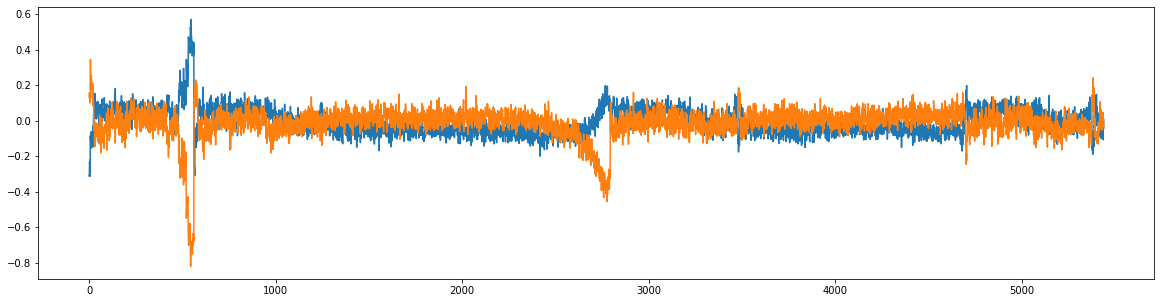

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.plot(m1)
plt.plot(m2)
plt.show()